In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/invframe/frame_*.tif'.format(picL))
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/invframe/frame_*.tif'.format(picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./FrameL_sum.tif')
v0R = imread('./FrameR_sum.tif')
bk0L = imread('./FrameL0.tif')
bk0R = imread('./FrameR0.tif')

IOError: No files were found matching that path.

In [2]:
###################################
#Locate Features; single frame test
###################################
#init_index = 100
#f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
#plt.figure(figsize=[12,12])  # make a new figure
#tp.annotate(f, FrameL[init_index]);

In [3]:
#Show 'mass' distribution
#fig, ax = plt.subplots()
#ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');
#plt.show()

In [4]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Right frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fR = tp.batch(FrameR, 3, minmass=5);
tR = pred.link_df(fR, 3, memory=11,  diagnostics=True)
tR.to_csv('trackR_frameless_inv.csv')
#tR.head()

Frame 4743: 11 trajectories present


In [5]:
#tR = pd.read_csv('../../Data/frameless/trackR_frameless.csv')
tR.head()

diag_remembered diag_search_range diag_subnet diag_subnet_iterations  \
0             NaN               NaN         NaN                    NaN   
1             NaN               NaN         NaN                    NaN   
2             NaN               NaN         NaN                    NaN   
3             NaN               NaN         NaN                    NaN   
4             NaN               NaN         NaN                    NaN   

  diag_subnet_size       ecc   ep  frame        mass  particle  raw_mass  \
0              NaN  0.419492  0.0      0   96.057346       0.0     254.0   
1              NaN  0.306931  0.0      0   40.430107       1.0      95.0   
2              NaN  0.337349  0.0      0   33.835125       2.0      80.0   
3              NaN  0.411498  0.0      0  262.652325       3.0     668.0   
4              NaN  0.421875  0.0      0   26.093190       4.0      50.0   

      signal      size           x          y  
0  28.387096  0.839332   64.922388   9.922388  
1  11.469534  0.846352  152.000000  50.865248  
2  10.035842  0.838683  168.000000  53.110169  
3  73.118278  0.849480   98.824236  58.971616  
4   7.741935  0.838628   34.000000  78.000000

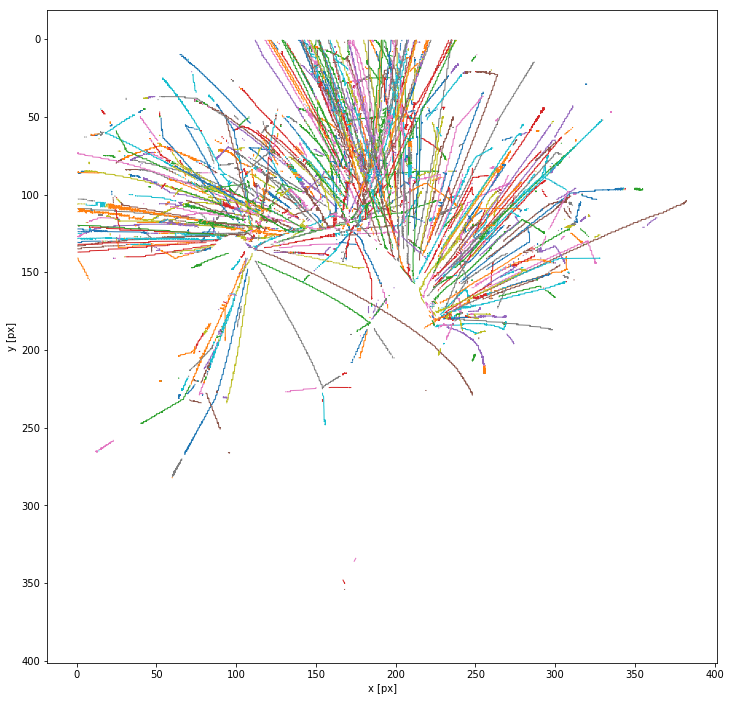

In [6]:
plt.figure(figsize=[12,12])
tp.plot_traj(tR);

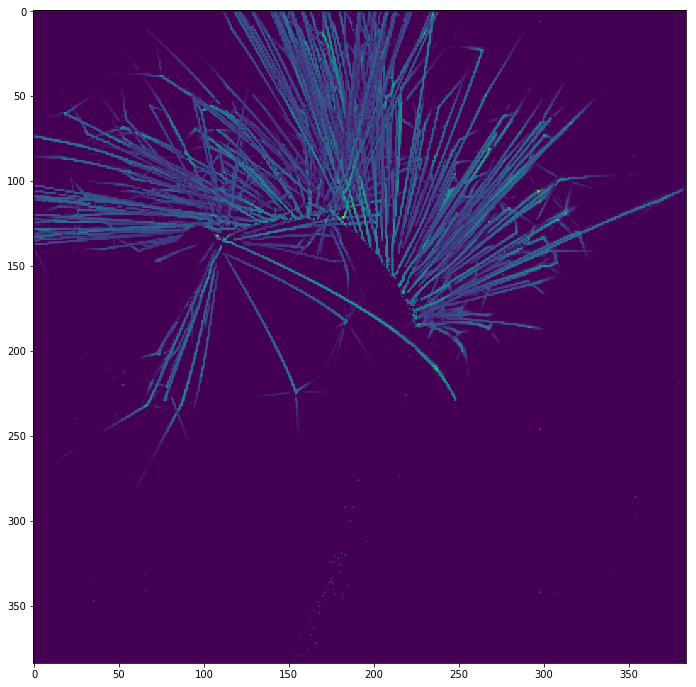

In [7]:
plt.figure(figsize=[12,12])
plt.imshow(v0R)
#plt.scatter(tL['x'],tL['y'],s=0.3,c='g')
plt.scatter(tR['x'],tR['y'],s=0.3,c=tR['mass'])
plt.show()

In [1]:
tR1 = tp.filter_stubs(tR,200)
plt.figure(figsize=[12,12])
tp.plot_traj(tR1);

NameError: name 'tp' is not defined

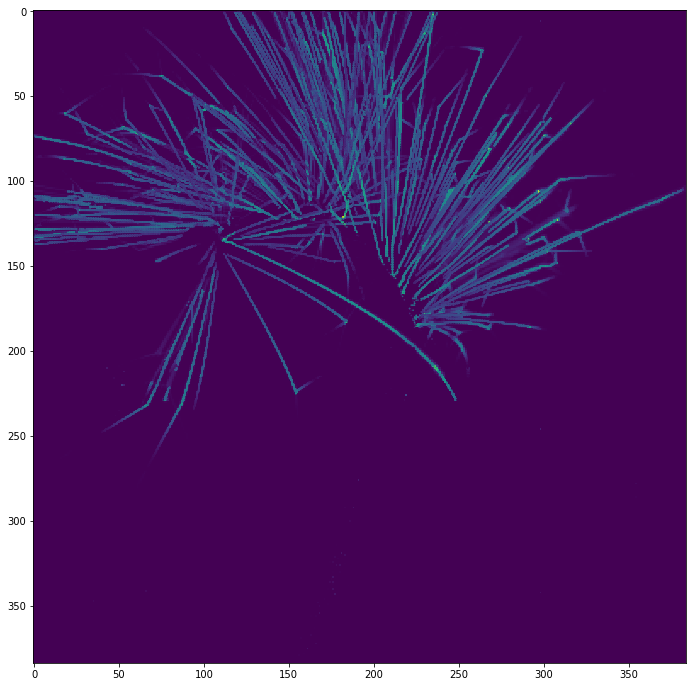

In [9]:
plt.figure(figsize=[12,12])
plt.imshow(v0R)
plt.scatter(tR1['x'],tR1['y'],s=0.3,c=tR1['mass'])
#plt.scatter(tR1['x'],tL1['y'],s=0.3,c='r')
plt.show()

In [10]:
tR2 = tR1
range_limit = 10
Range = {}
for ii in tR2['particle'].unique():
    Track = tR2[tR2['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    ra = math.sqrt((xmax-xmin)*(xmax-xmin)+(ymax-ymin)*(ymax-ymin))
    Range[ii] = ra
#Range

In [11]:
RANGE = []
for ii in range(len(tR2)):
    RANGE.append(Range[tR2['particle'].iloc[ii]])
    #print(ii,Range[tR2['particle'].iloc[ii]])

In [12]:
tR2['range'] = RANGE

In [13]:
tR2.head()

diag_remembered diag_search_range diag_subnet diag_subnet_iterations  \
frame                                                                        
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   
0                 NaN               NaN         NaN                    NaN   

      diag_subnet_size       ecc   ep  frame        mass  particle  raw_mass  \
frame                                                                          
0                  NaN  0.419492  0.0      0   96.057346       0.0     254.0   
0                  NaN  0.306931  0.0      0   40.430107       1.0      95.0   
0                  NaN  0.337349  0.0      0   33.835125       2.0      80.0   
0                  NaN  0.411498  0.0      0  262.652325       3.0     668.0   
0                  NaN  0.421875  0.0      0   26.093190       4.0      50.0   

          signal      size           x          y       range  
frame                                                          
0      28.387096  0.839332   64.922388   9.922388   62.373923  
0      11.469534  0.846352  152.000000  50.865248   37.988652  
0      10.035842  0.838683  168.000000  53.110169  117.007934  
0      73.118278  0.849480   98.824236  58.971616   35.538575  
0       7.741935  0.838628   34.000000  78.000000   14.906889

In [14]:
tR3 = tR2[tR2['range']>20]

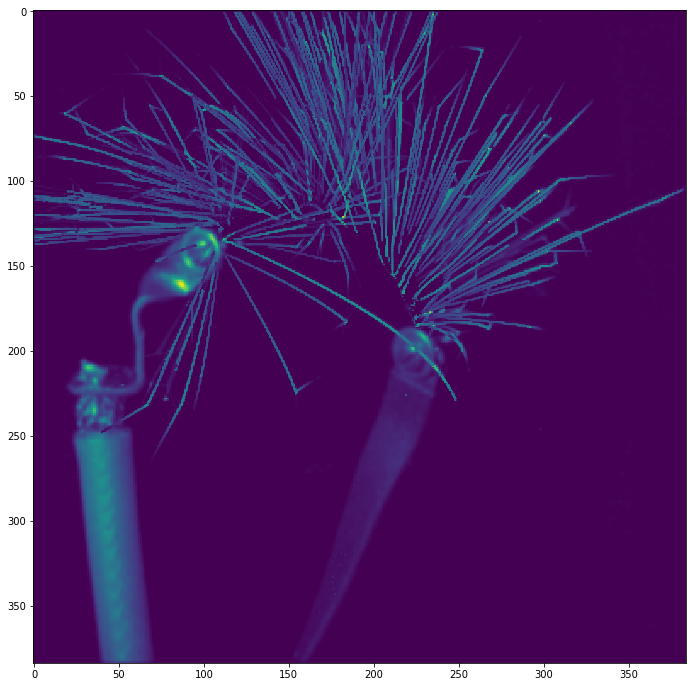

In [15]:
plt.figure(figsize=[12,12])
plt.imshow(v0R+bk0R)
plt.scatter(tR3['x'],tR3['y'],s=0.3,c=tR3['mass'])
#plt.scatter(tR3['x'],tR3['y'],s=0.3,c='r')
plt.savefig('sumTrackR.tif')
plt.show()

In [16]:
for ii in tR3['particle'].unique():
#for ii in range(3,4):  
    #print(ii)
    Track = tR3[tR3['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    plt.figure(figsize=[12,12])
    plt.imshow(v0R)
    plt.scatter(Track['x'],Track['y'],s=0.7,c=Track['mass'])
    plt.ylim(ymin-10,ymax+10)
    plt.xlim(xmin-10,xmax+10)
    plt.savefig("./trackR_framebk_{}.tif".format(int(ii)))

/Users/pinghanchu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


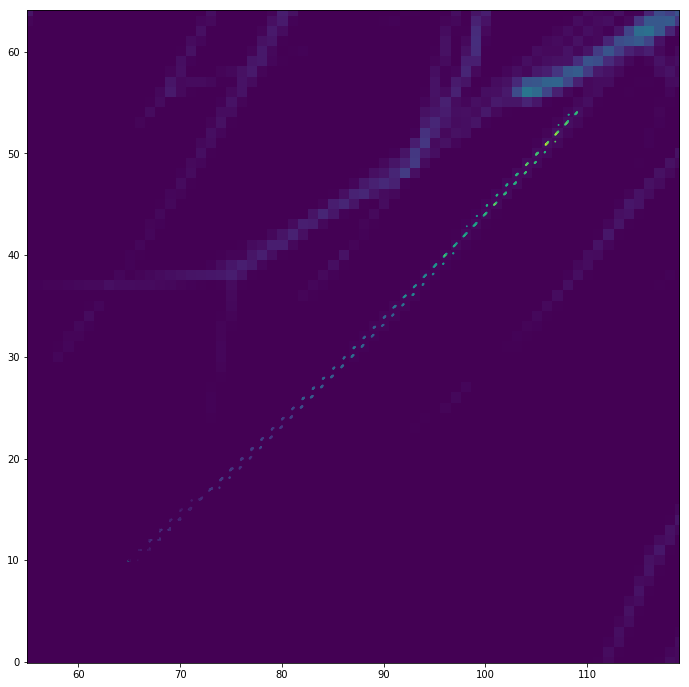

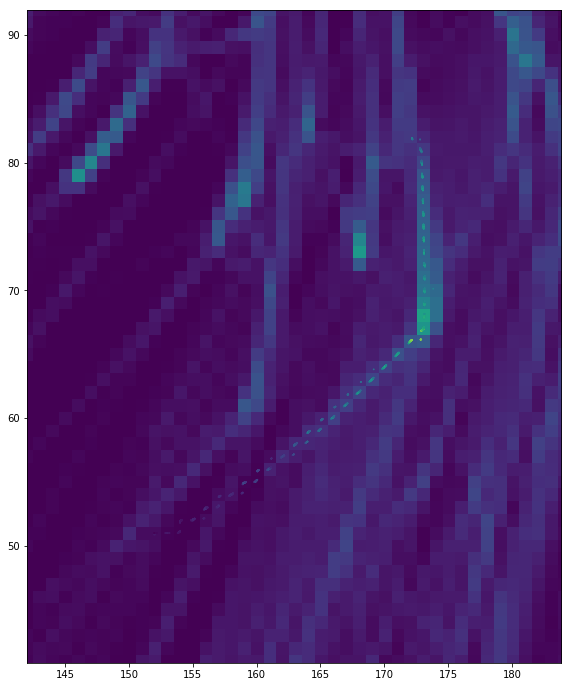

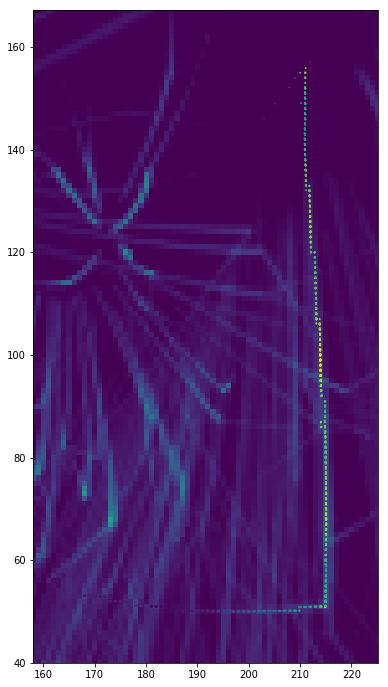

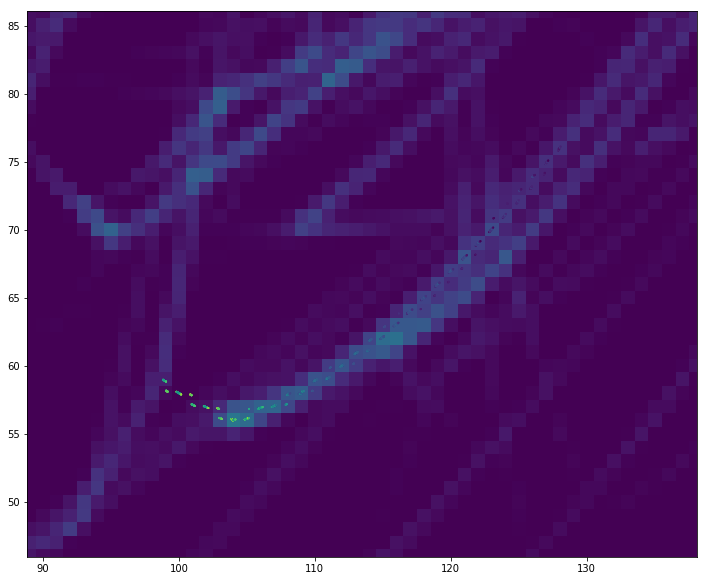

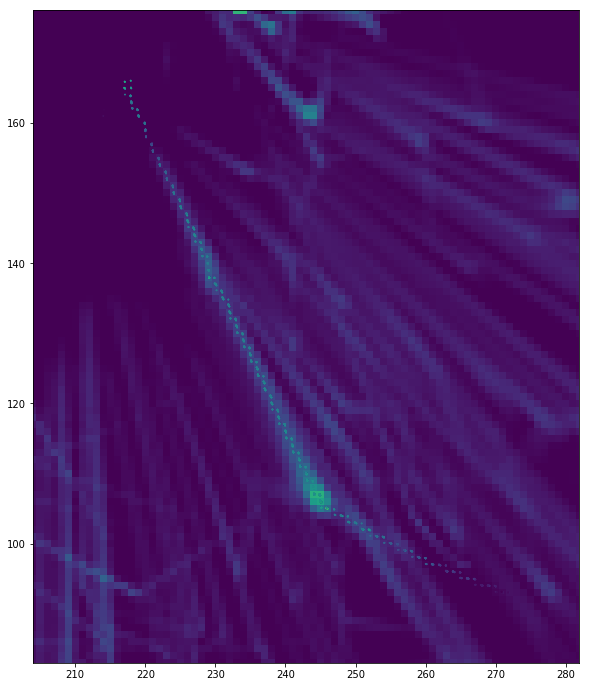

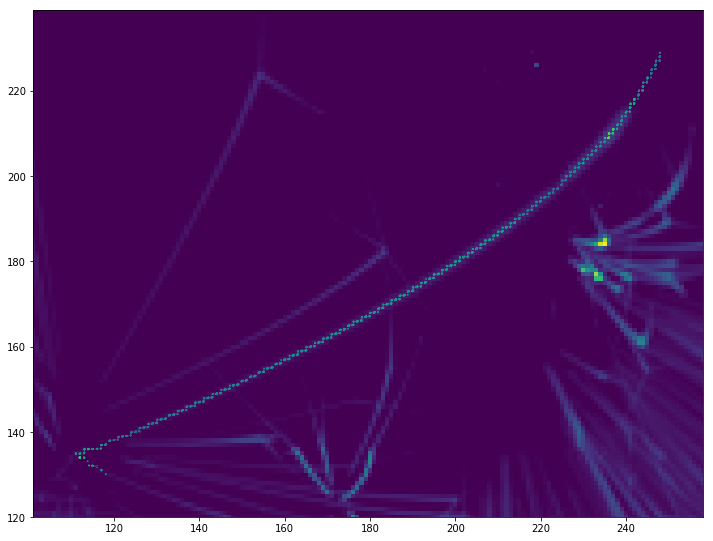

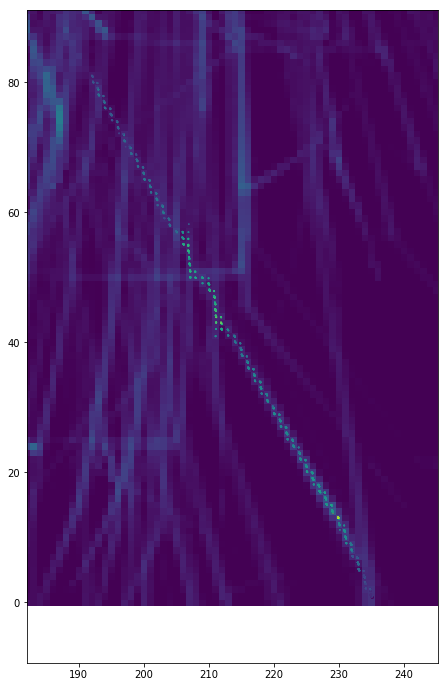

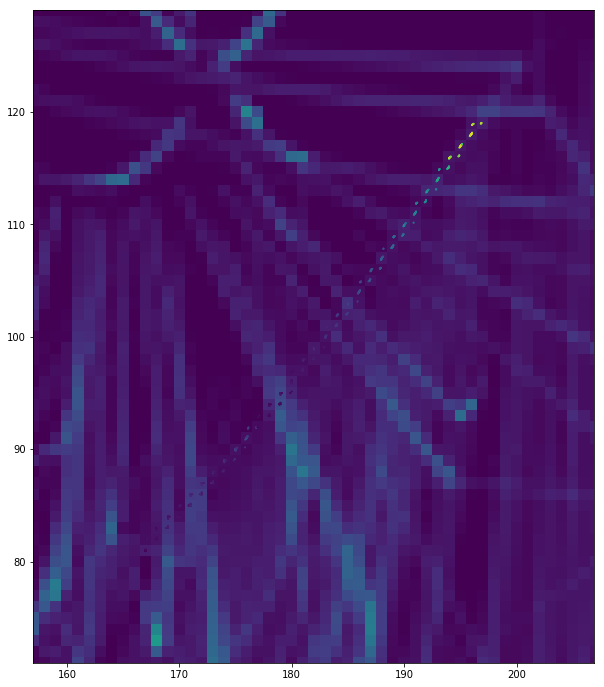

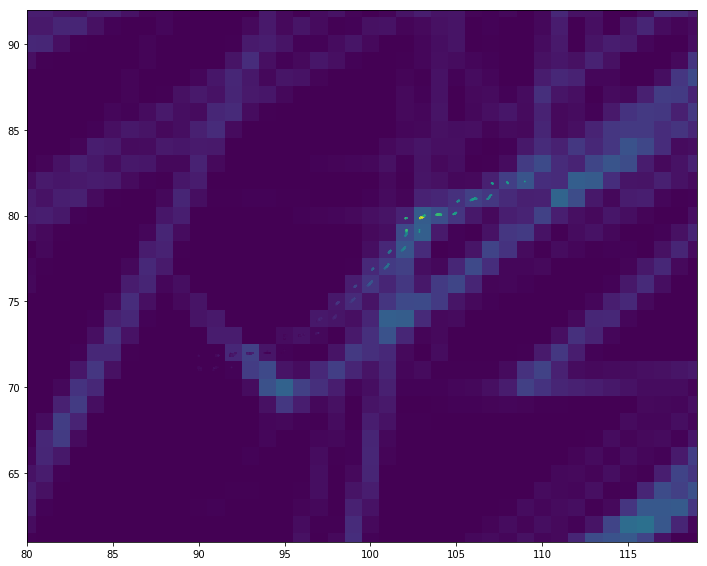

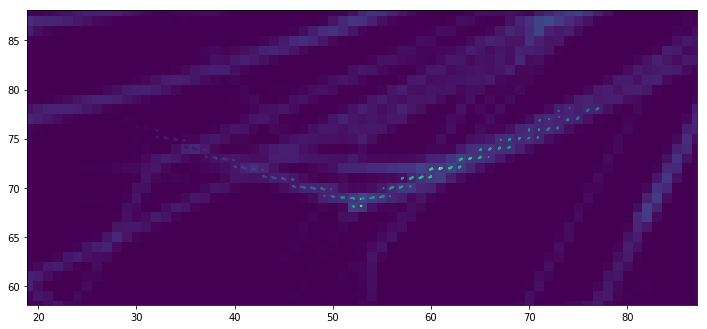

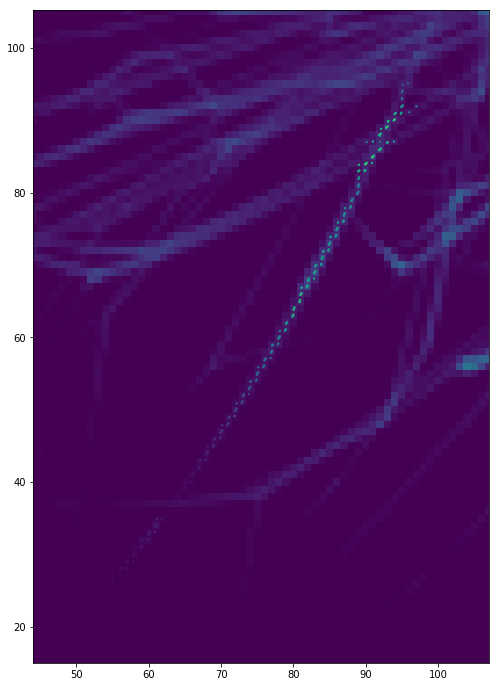

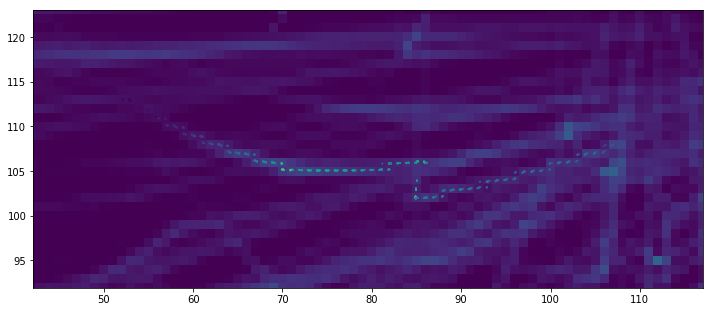

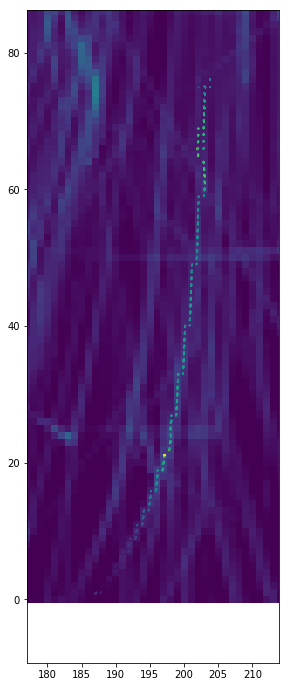

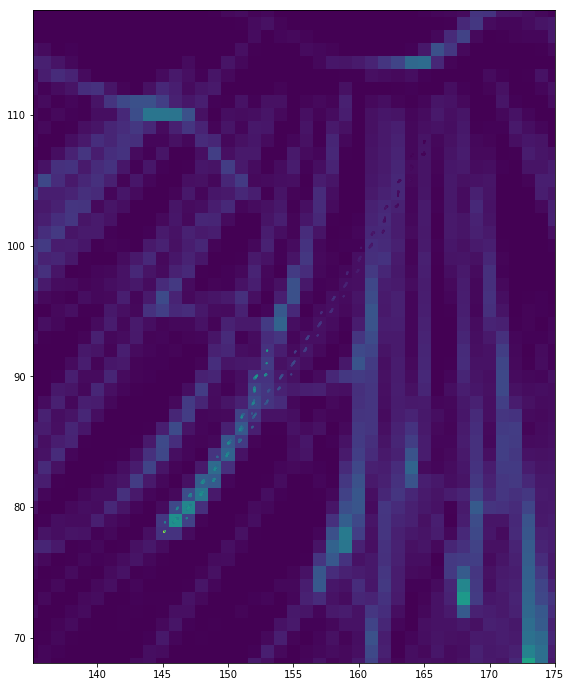

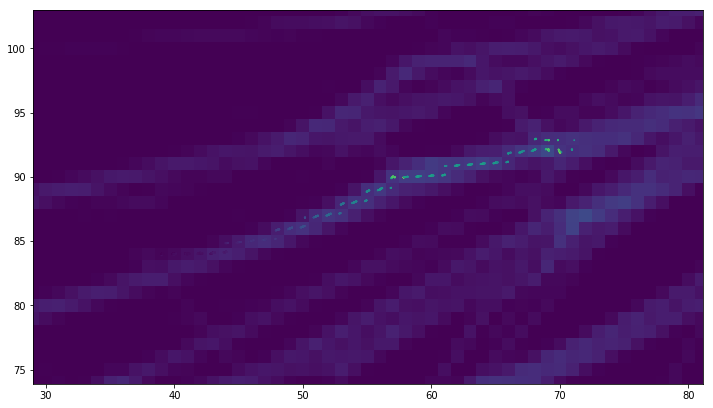

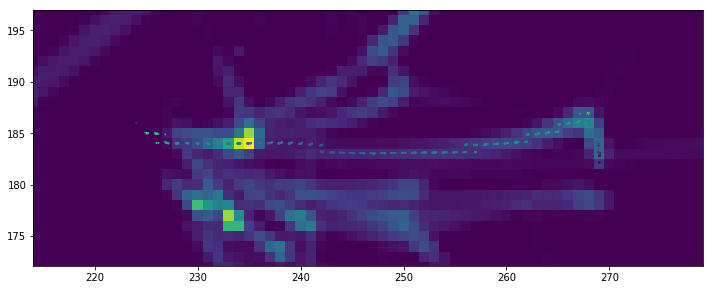

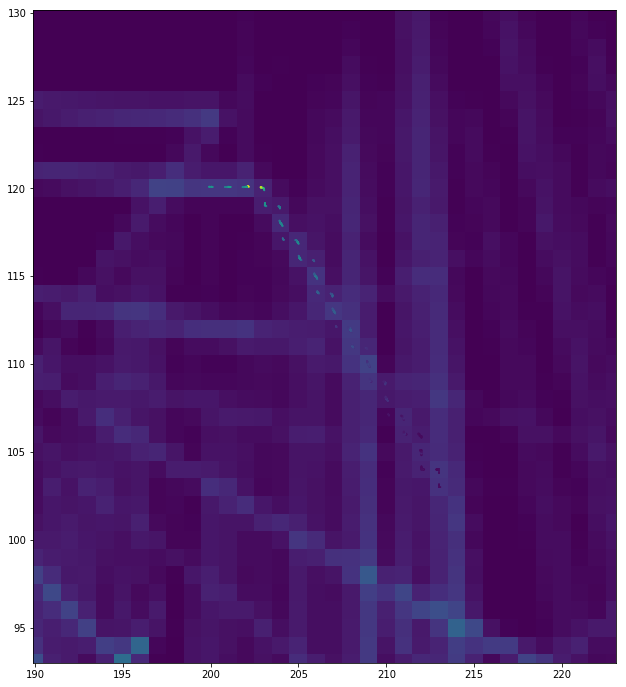

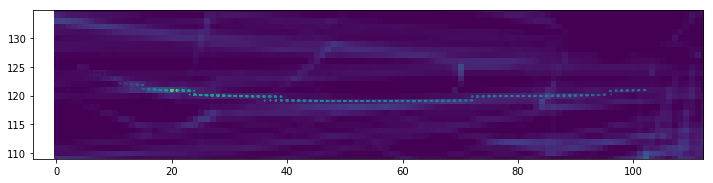

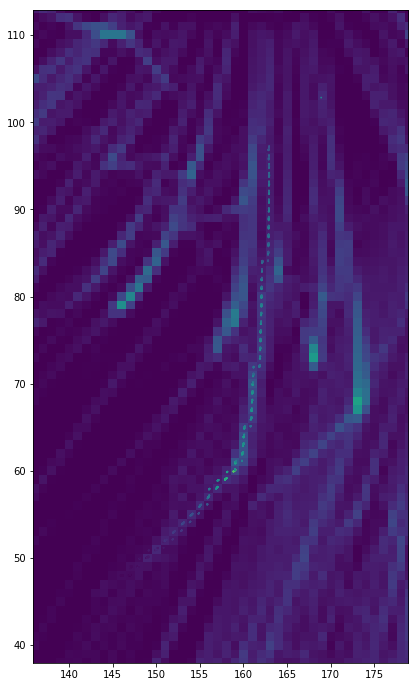

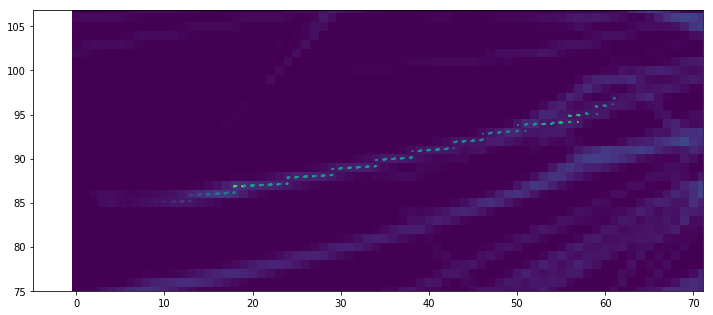

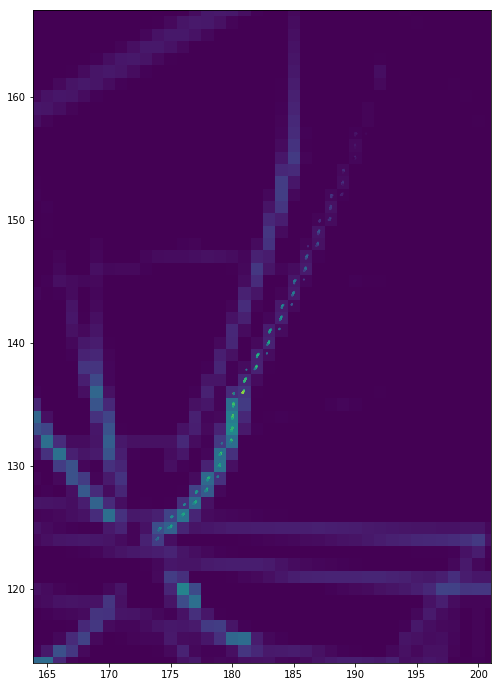

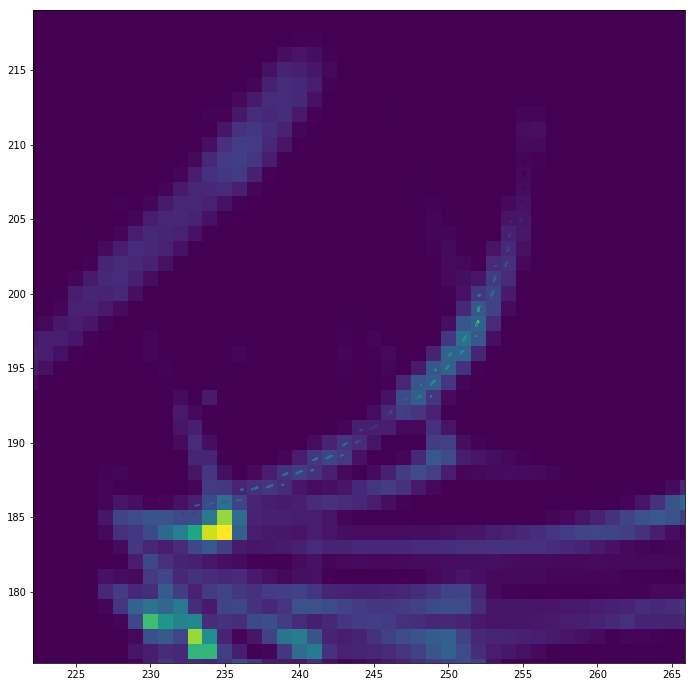

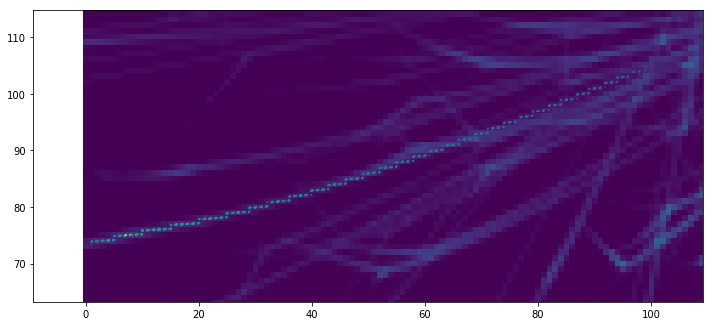

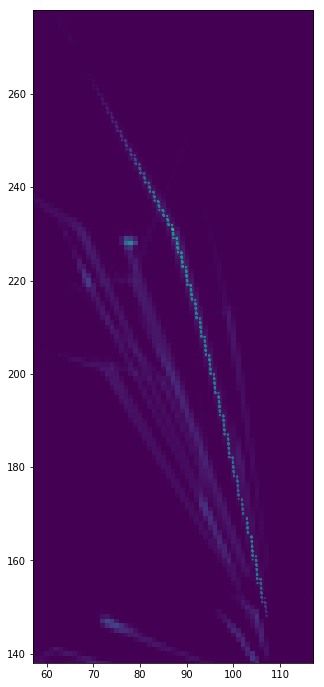

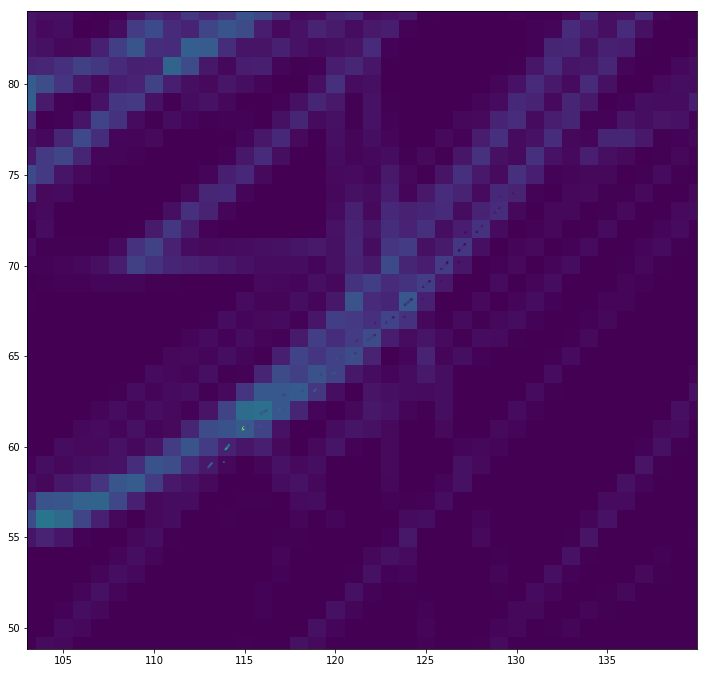

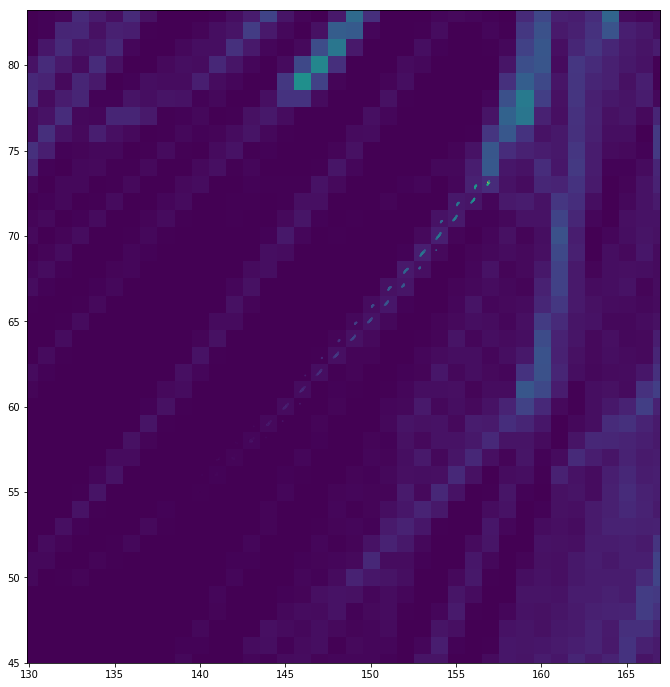

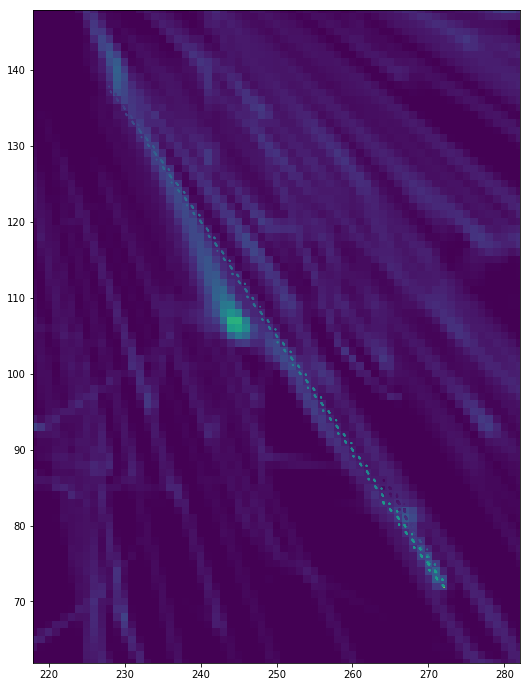

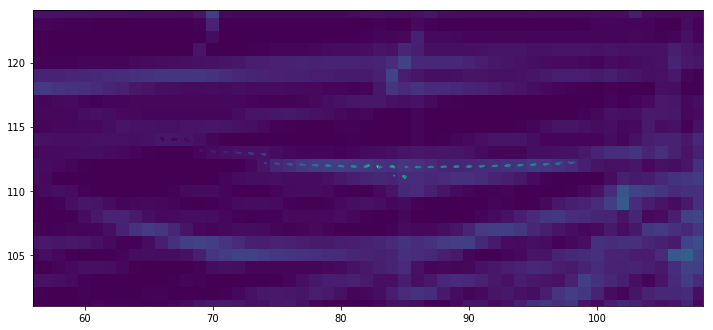

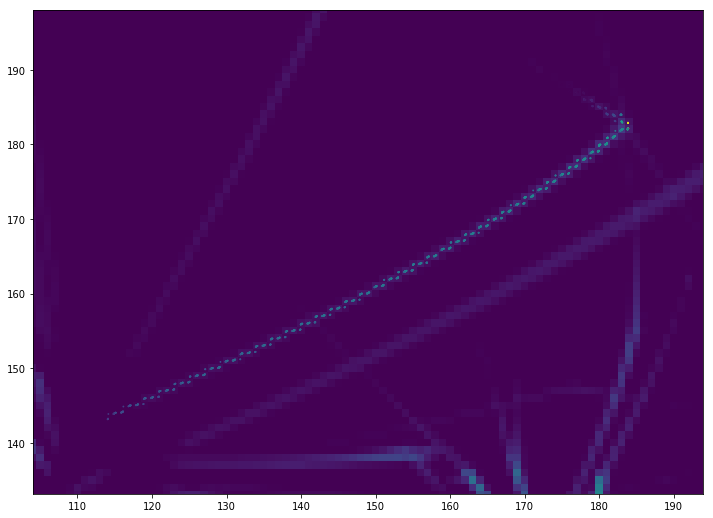

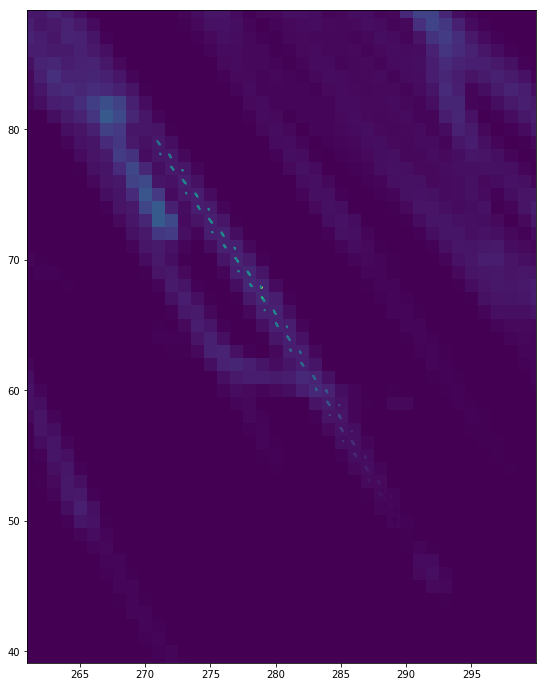

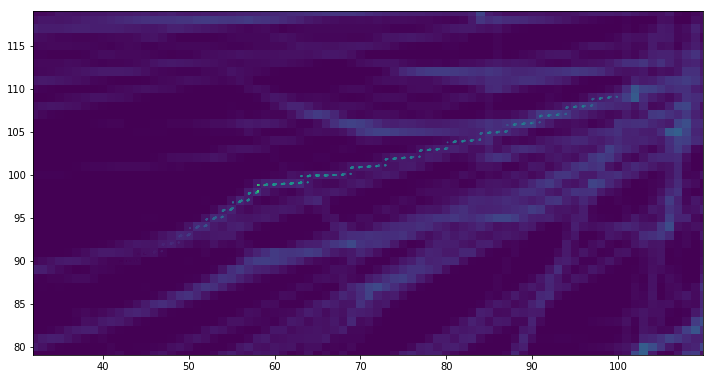

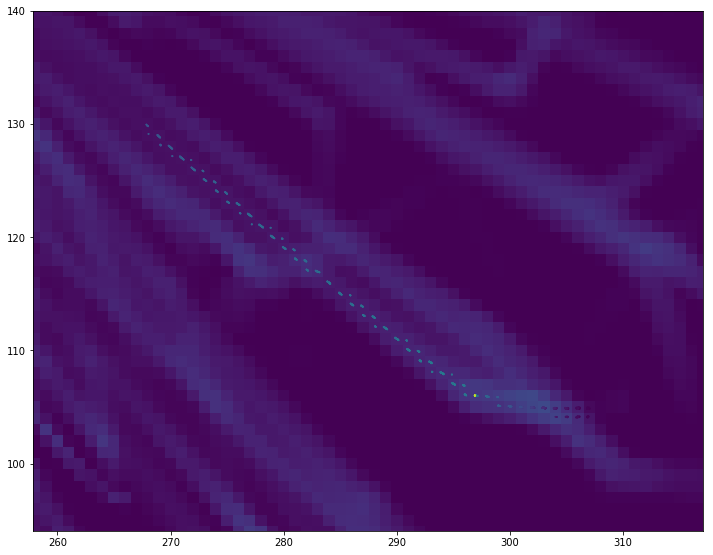

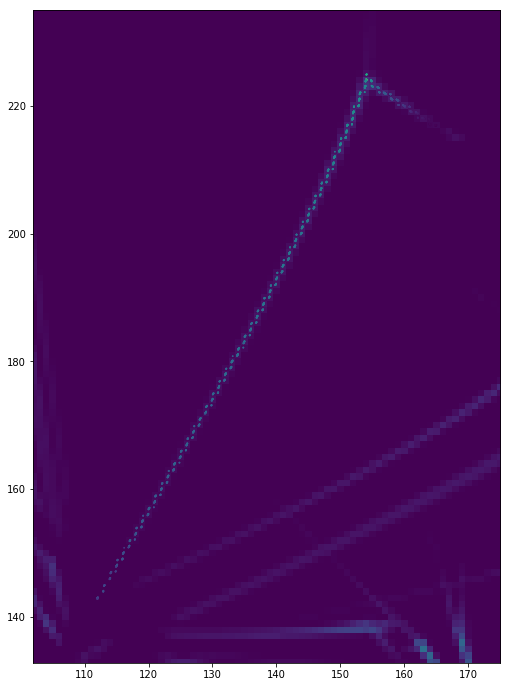

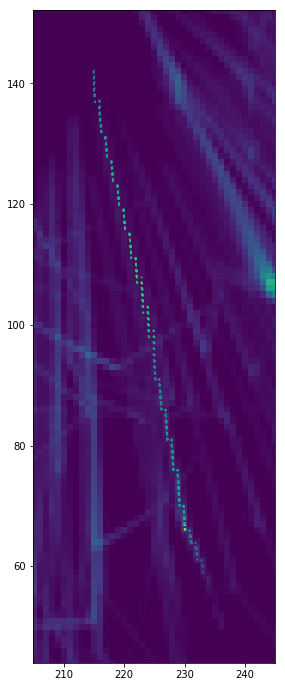

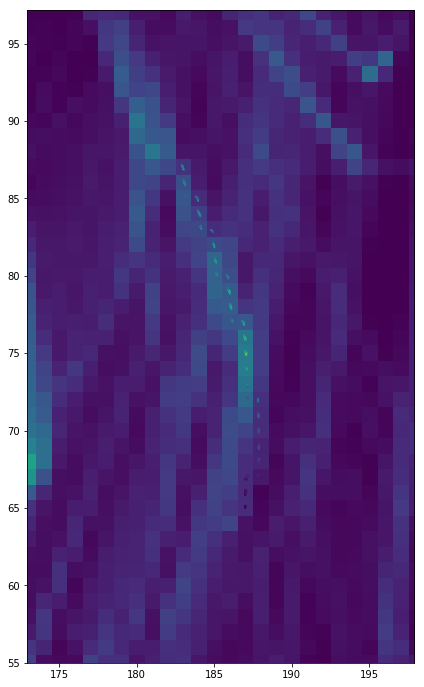

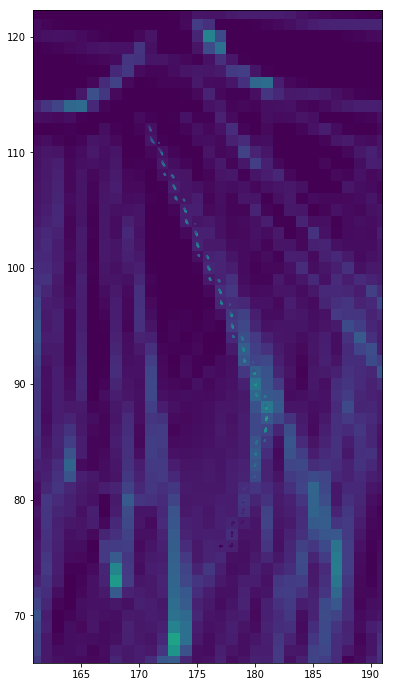

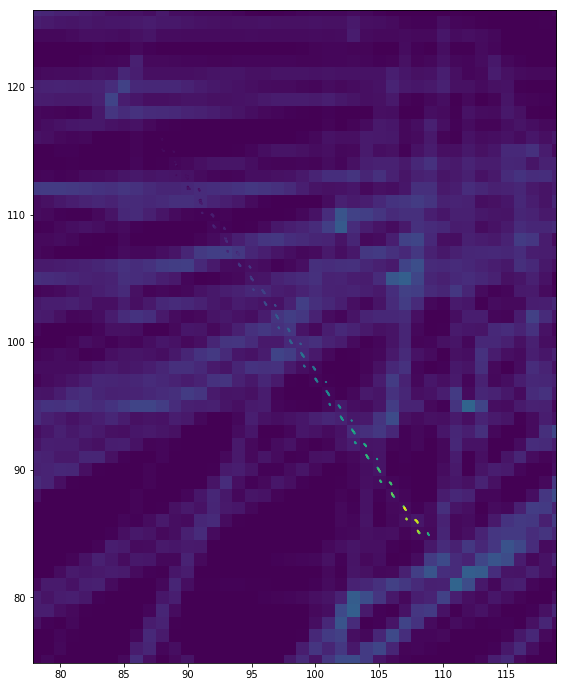

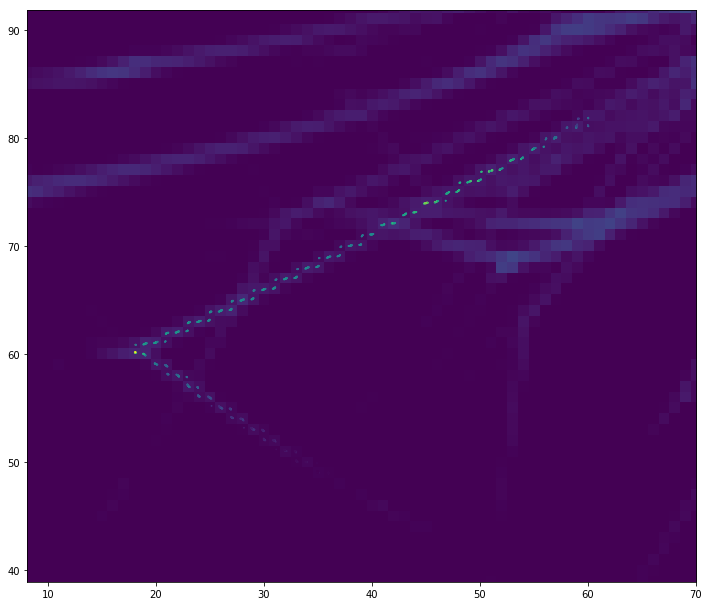

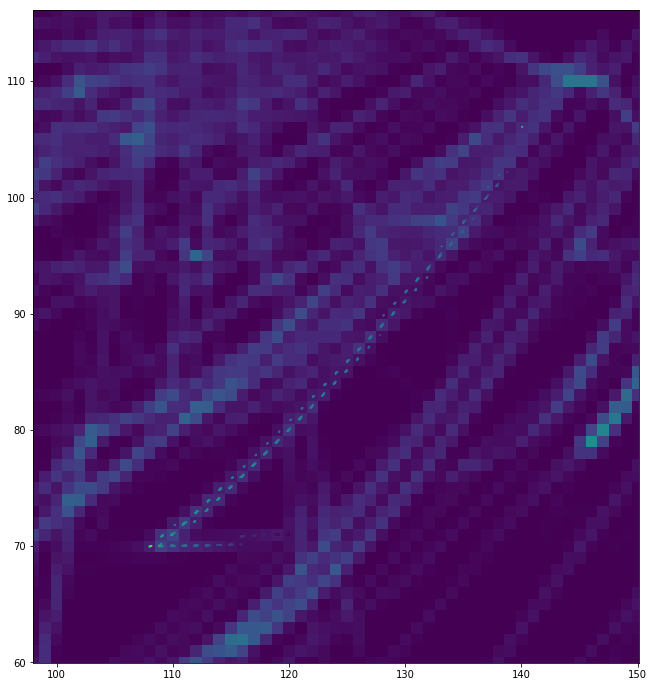

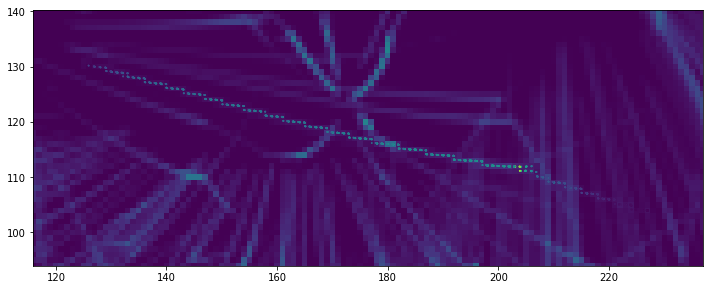

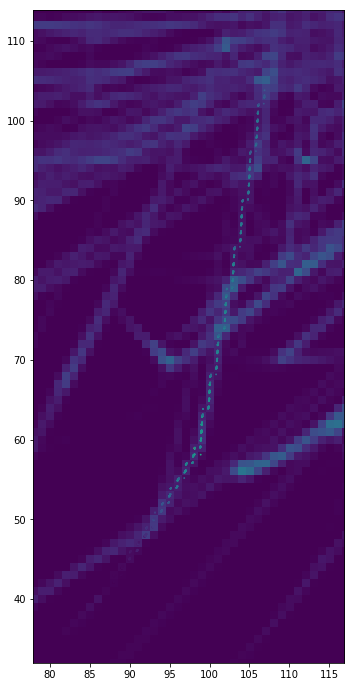

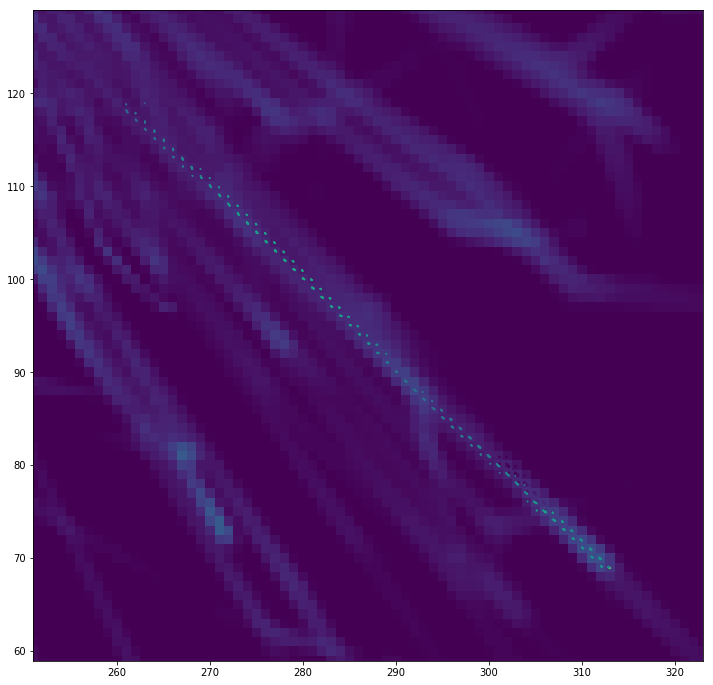

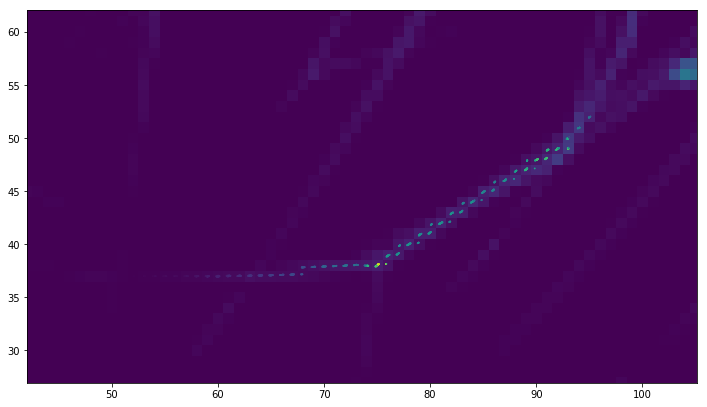

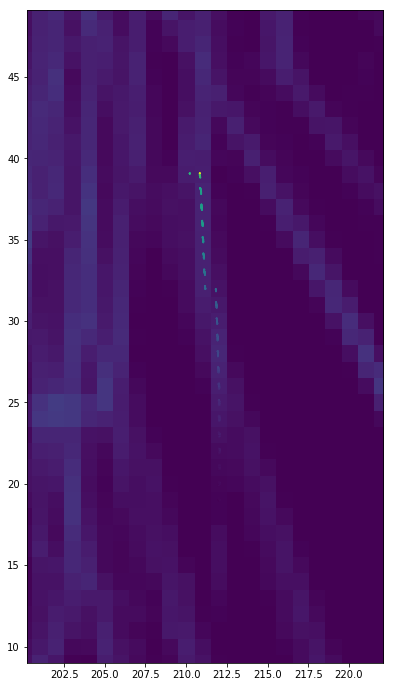

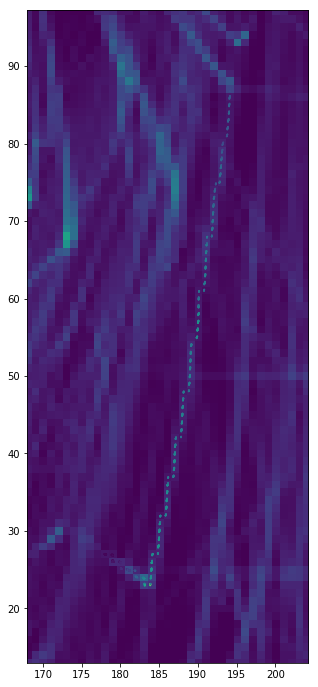

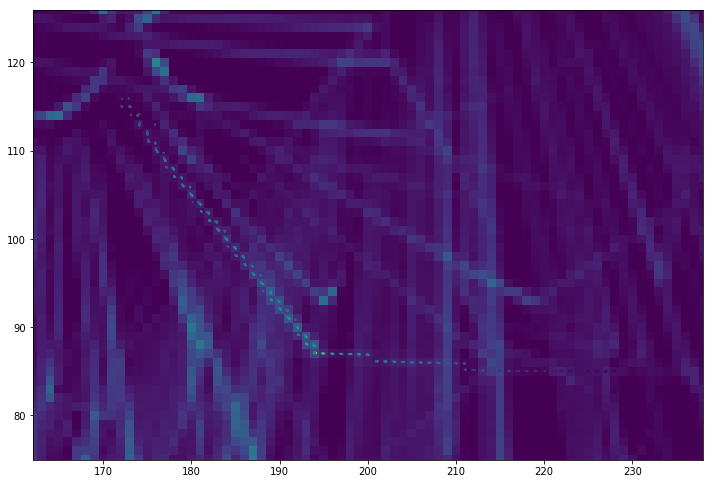

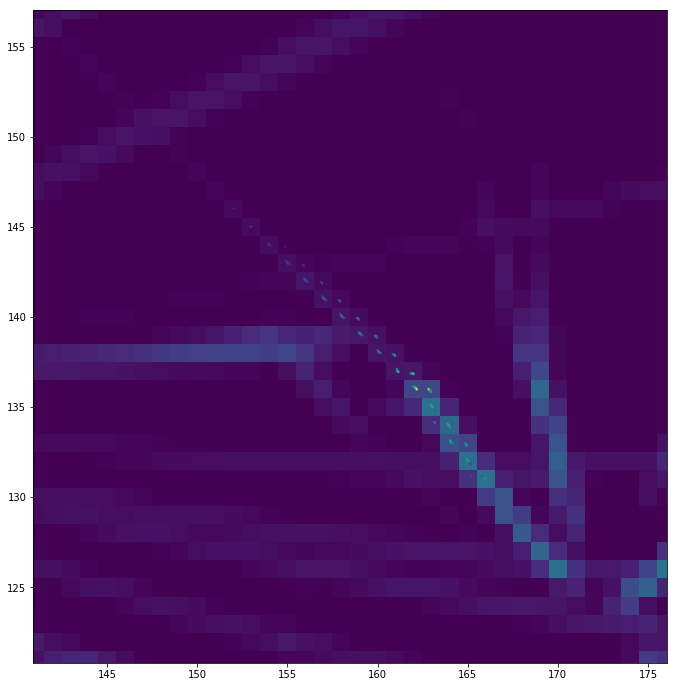

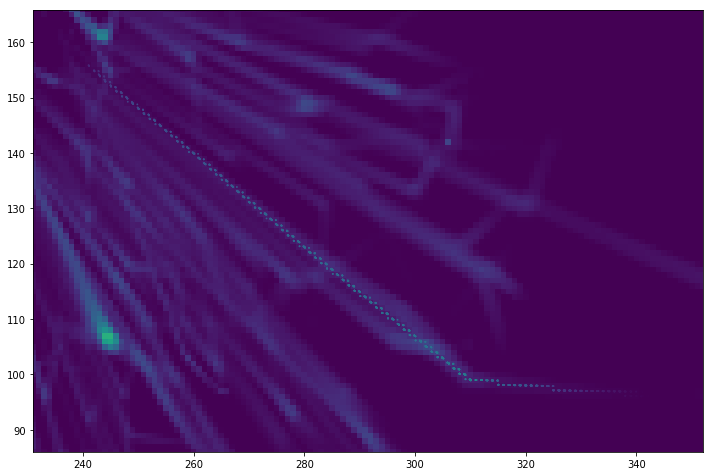

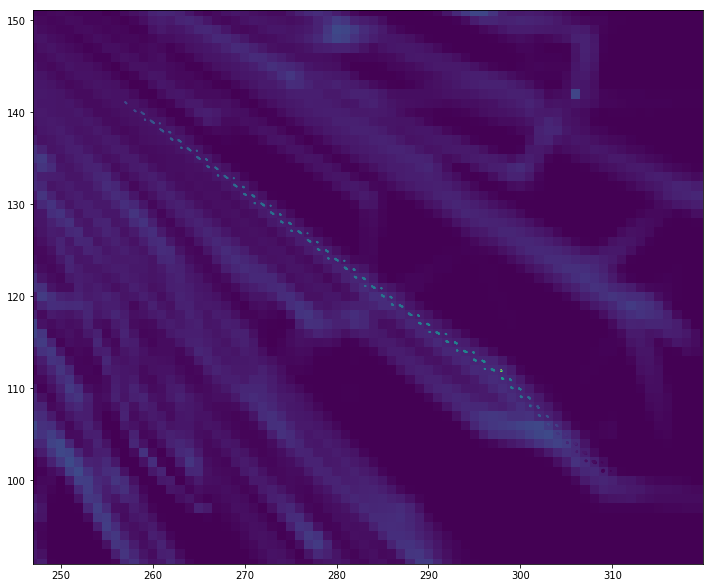

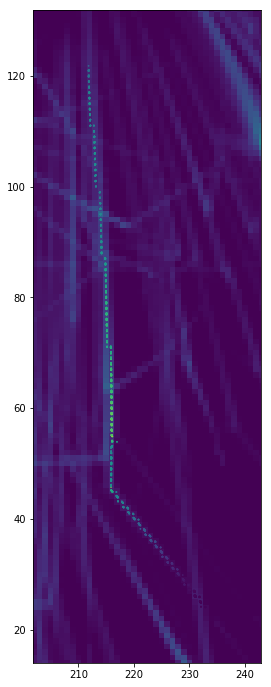

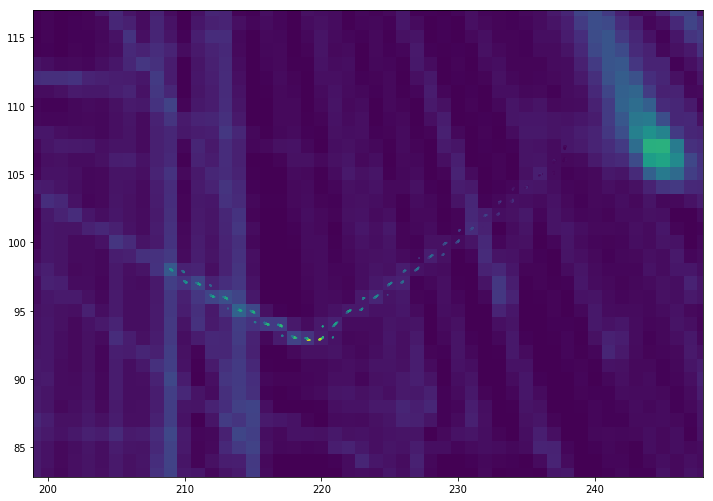

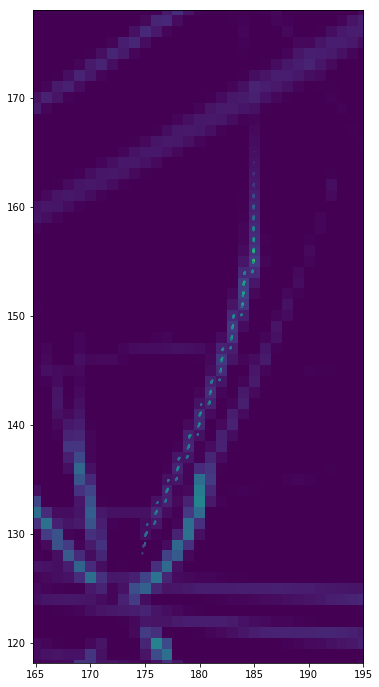

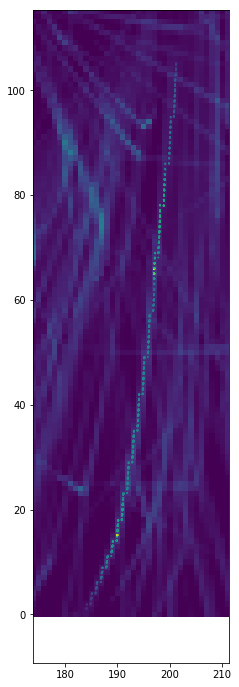

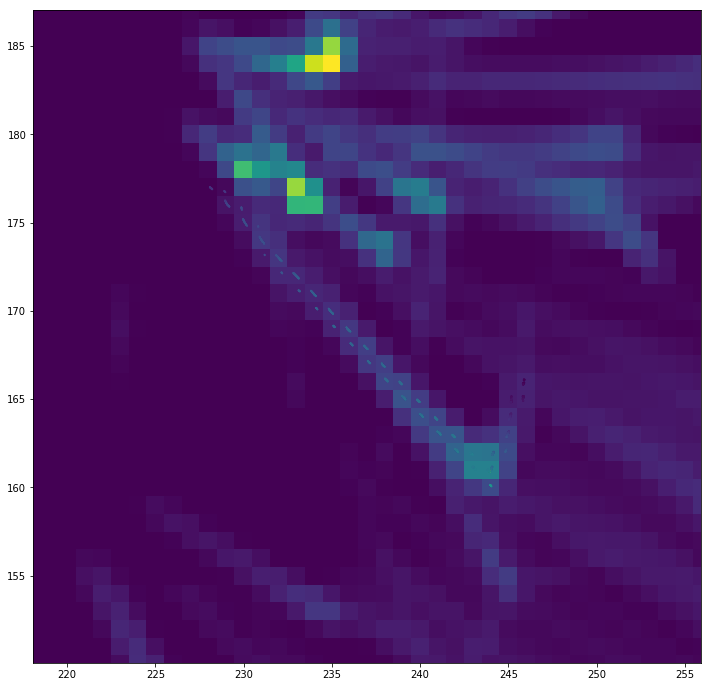

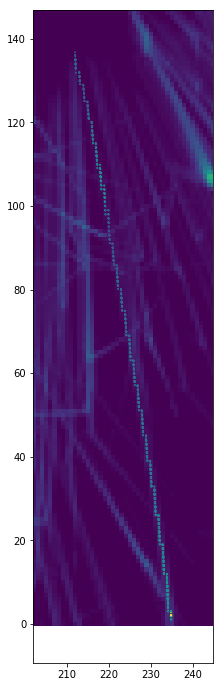

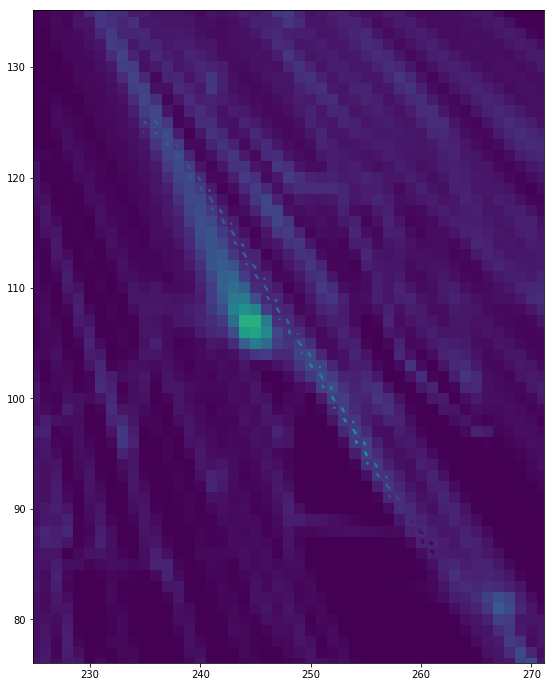

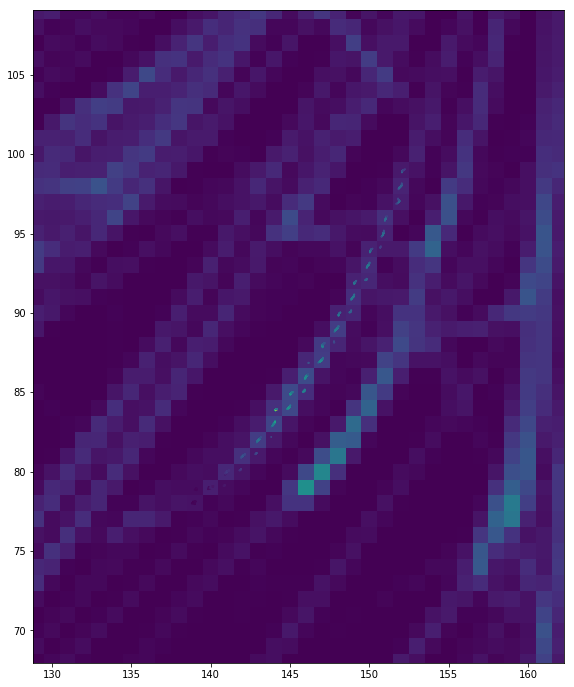

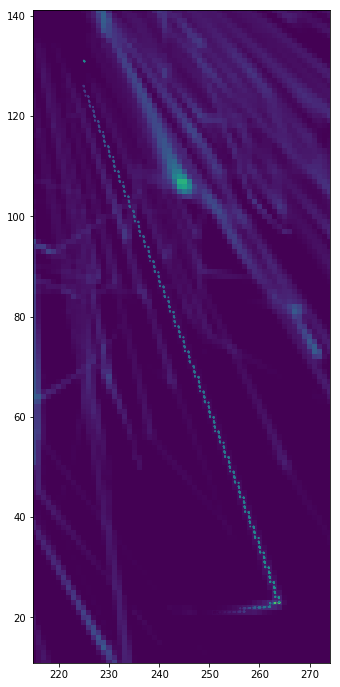

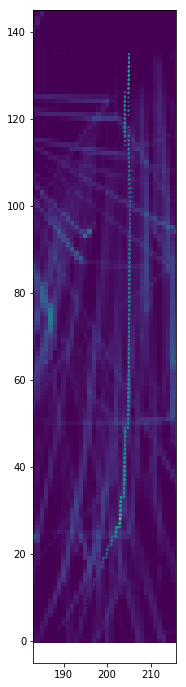

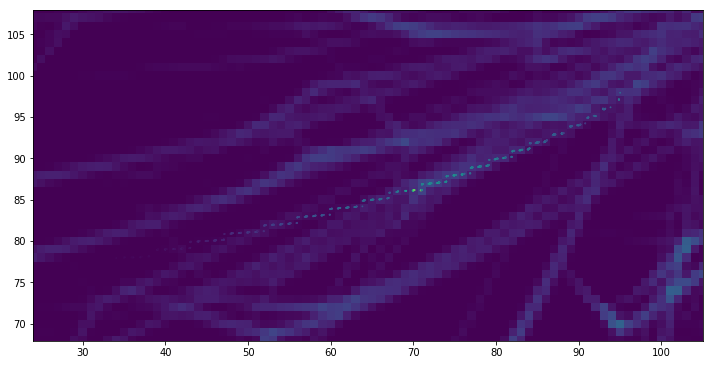

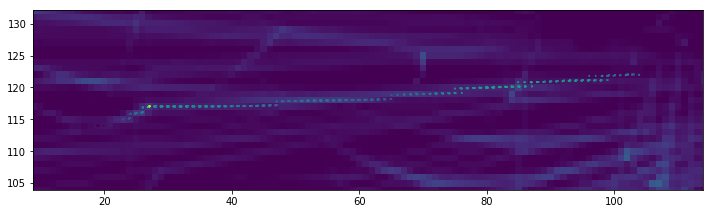

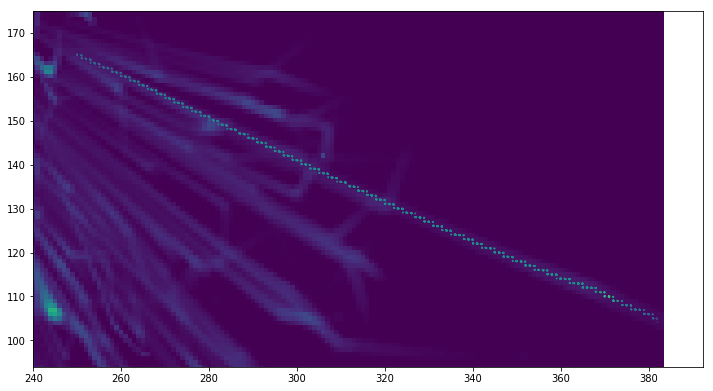

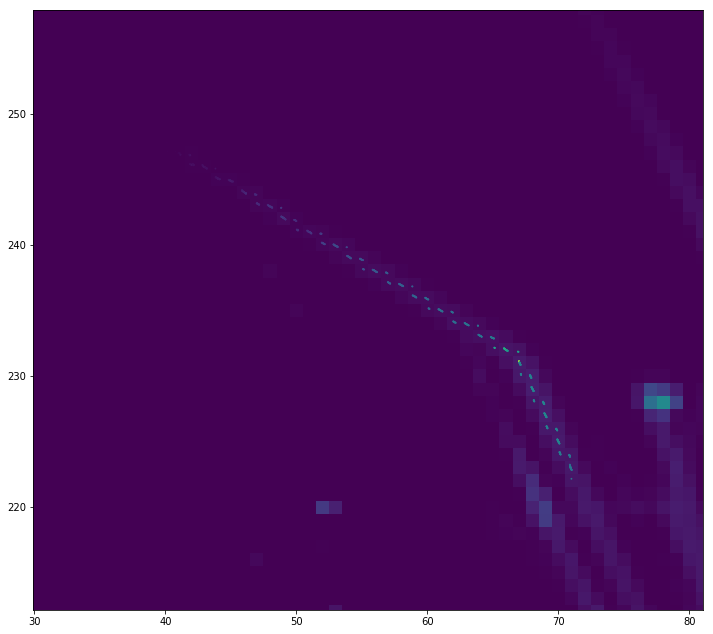

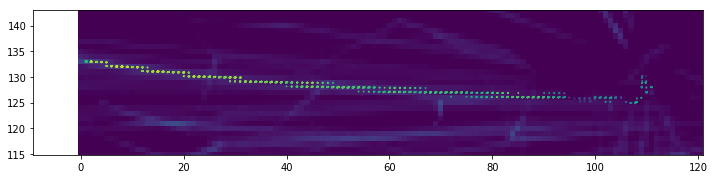

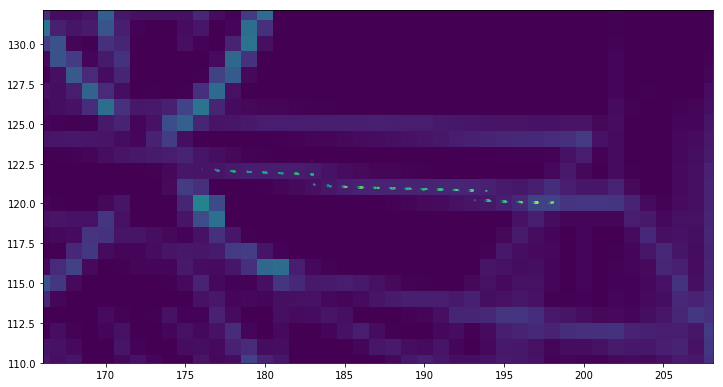

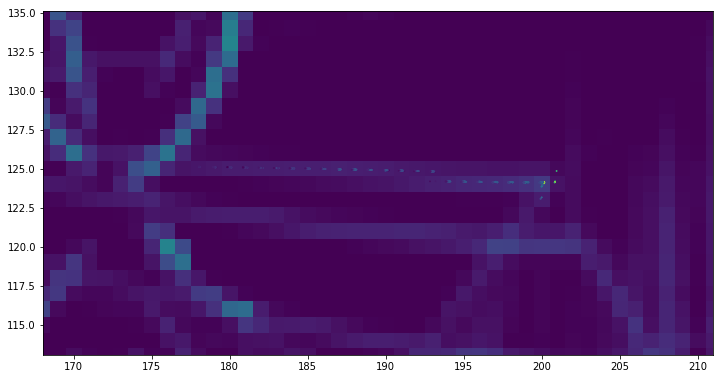

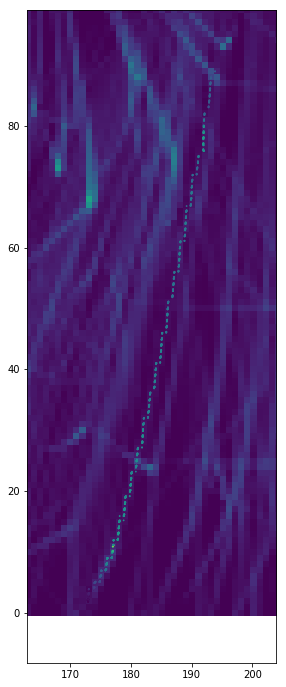

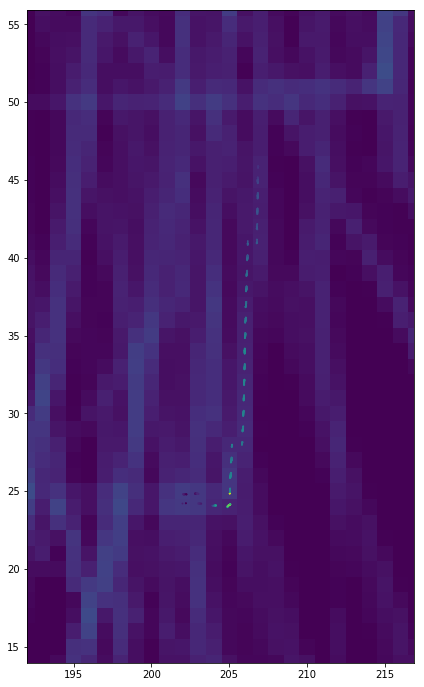

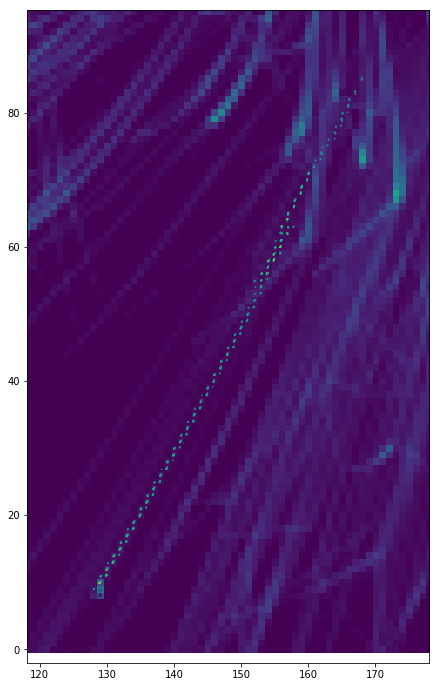

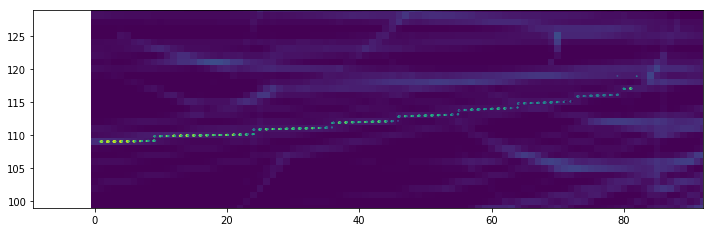

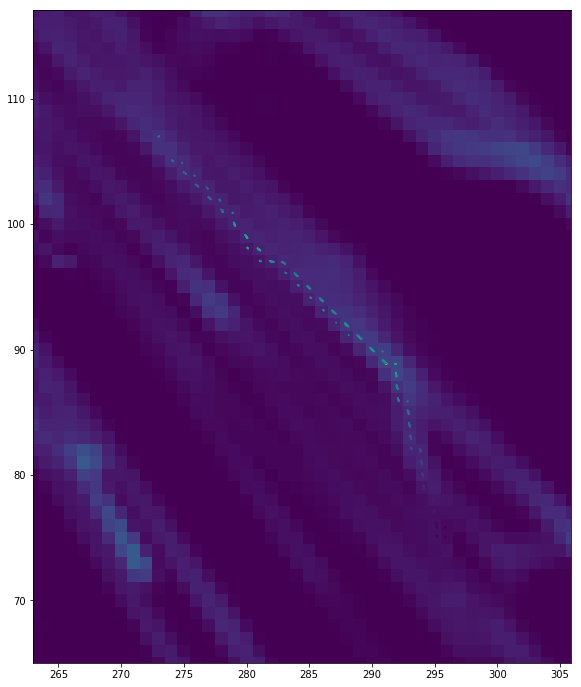

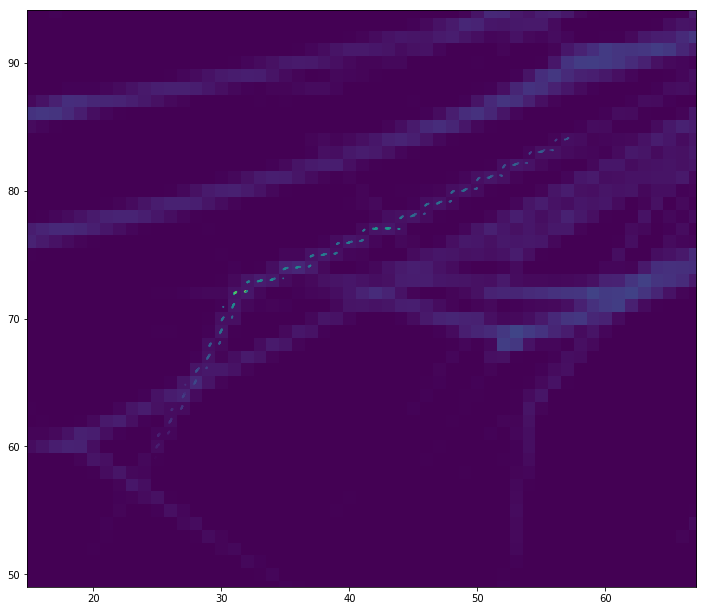

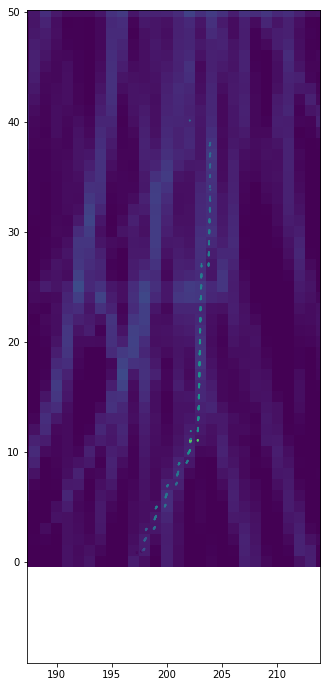

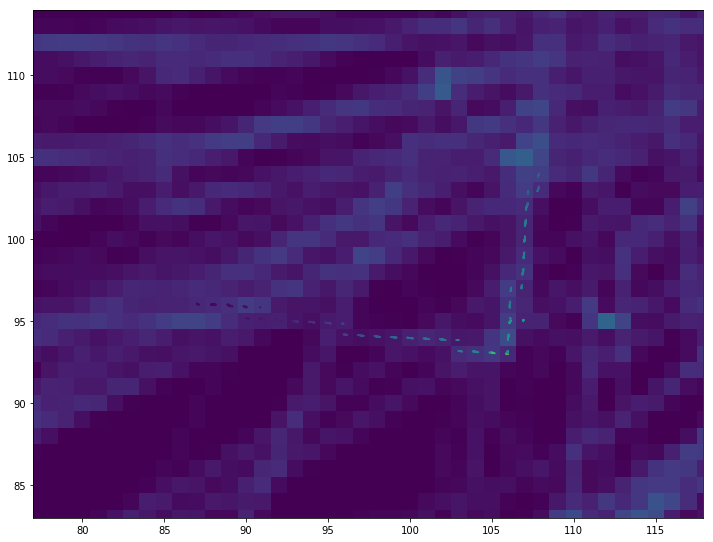

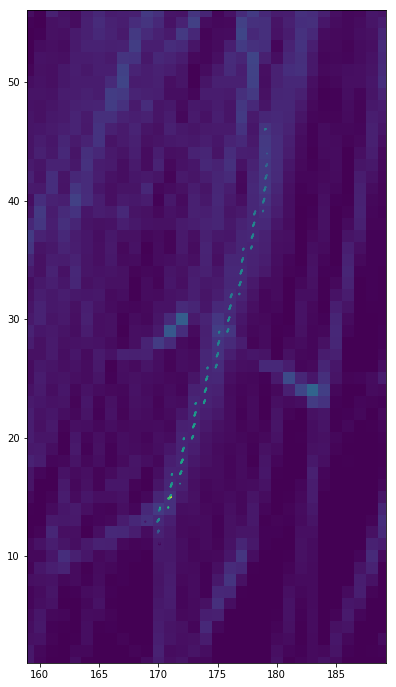

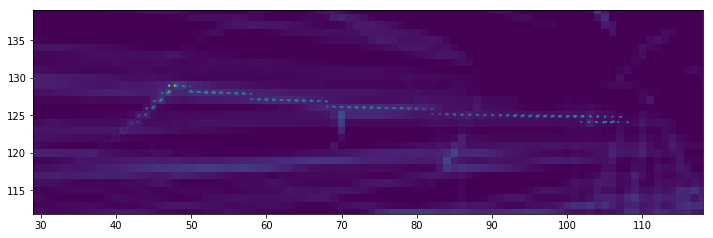

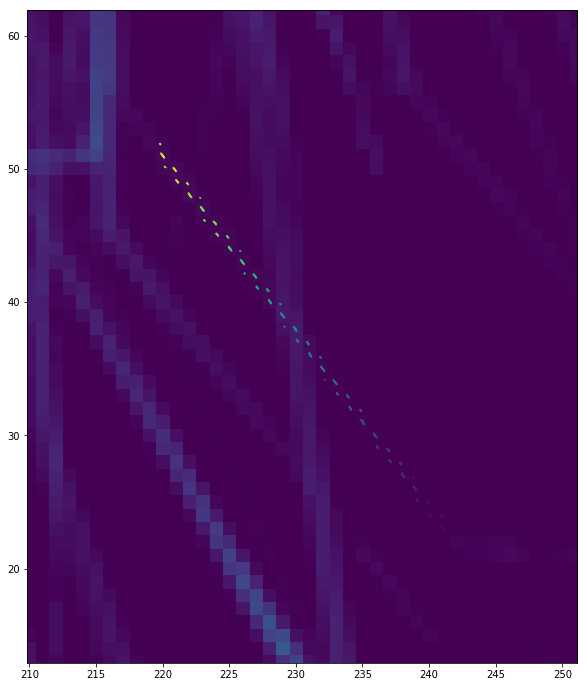

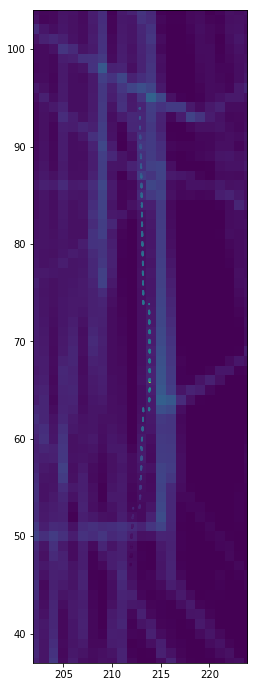

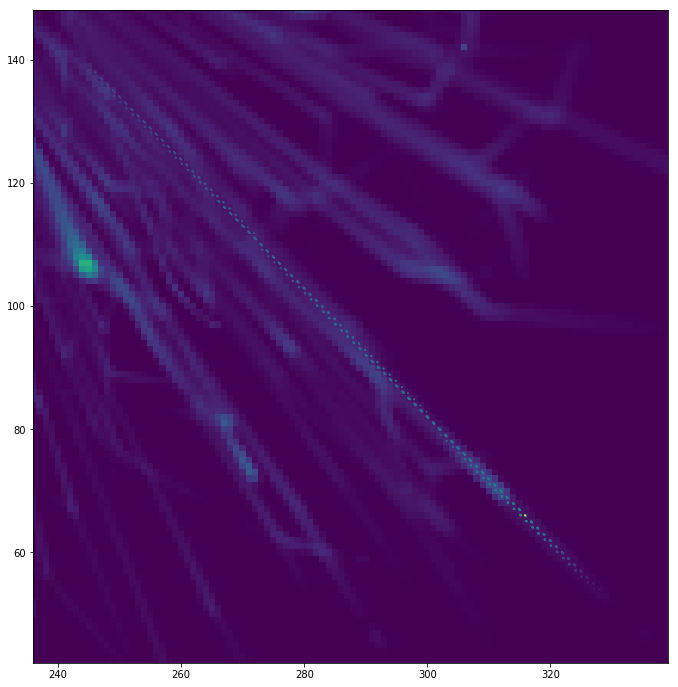

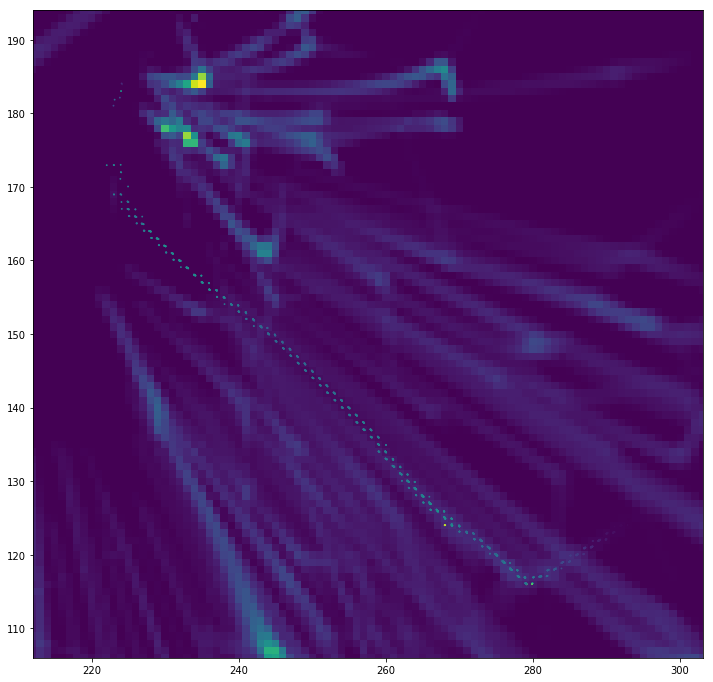

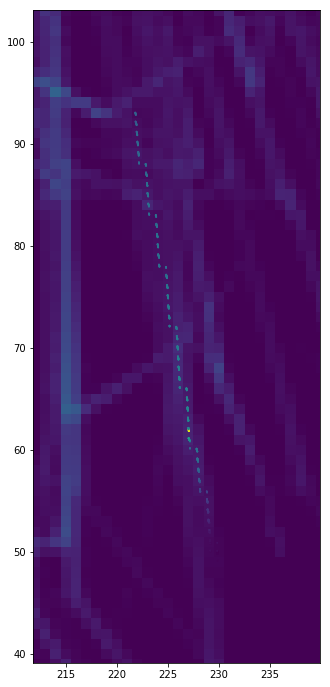

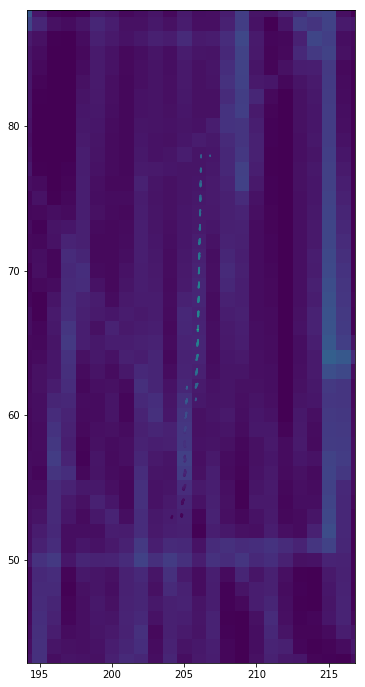

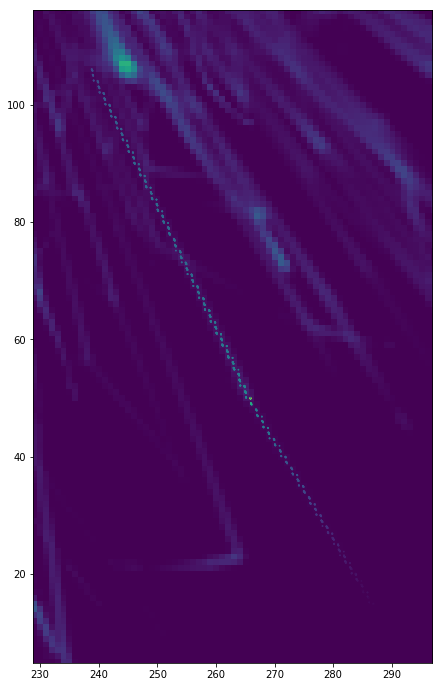

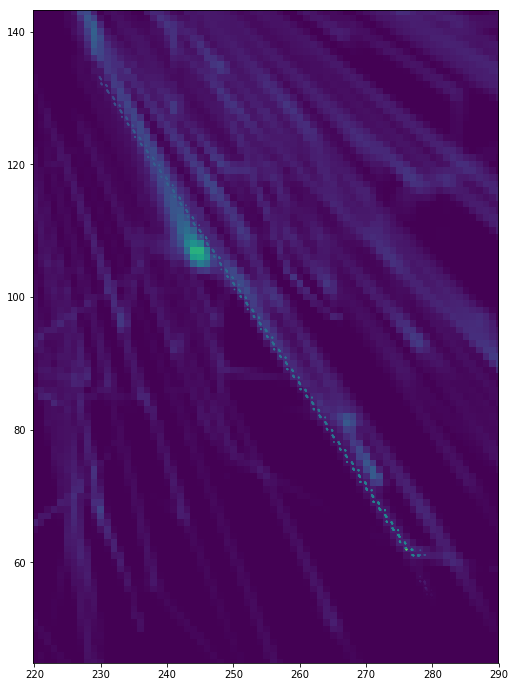

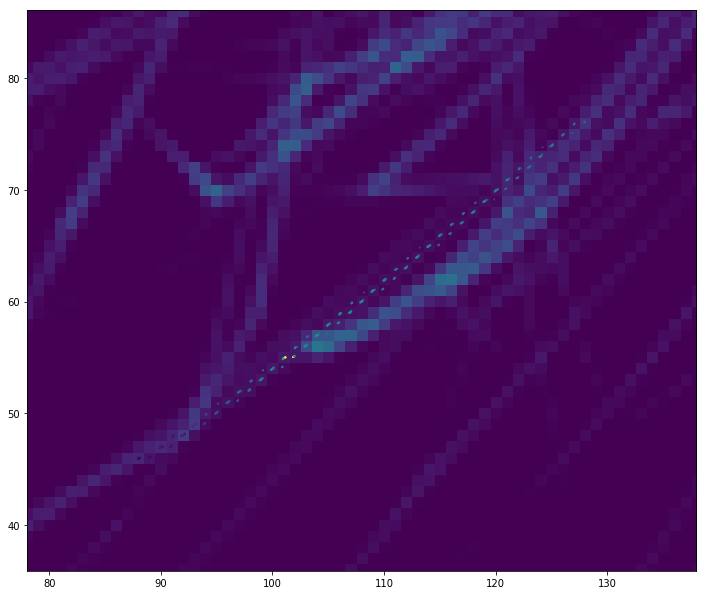

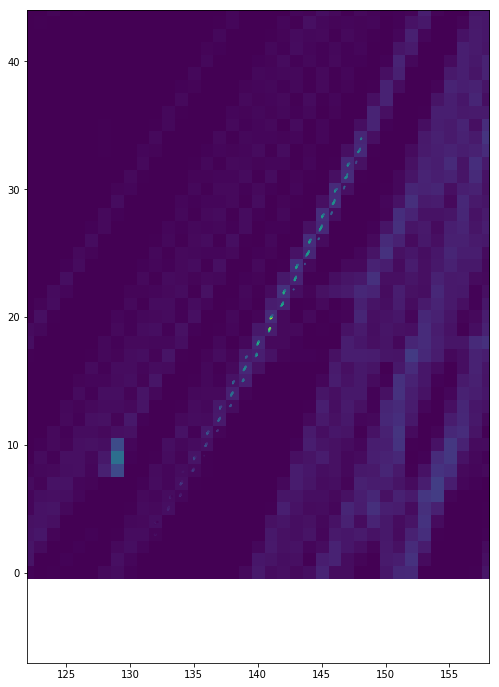

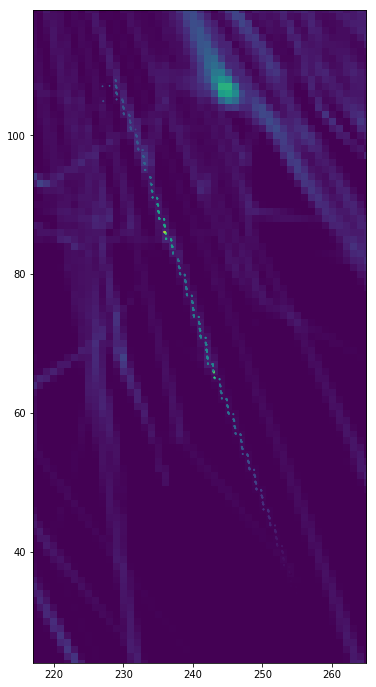

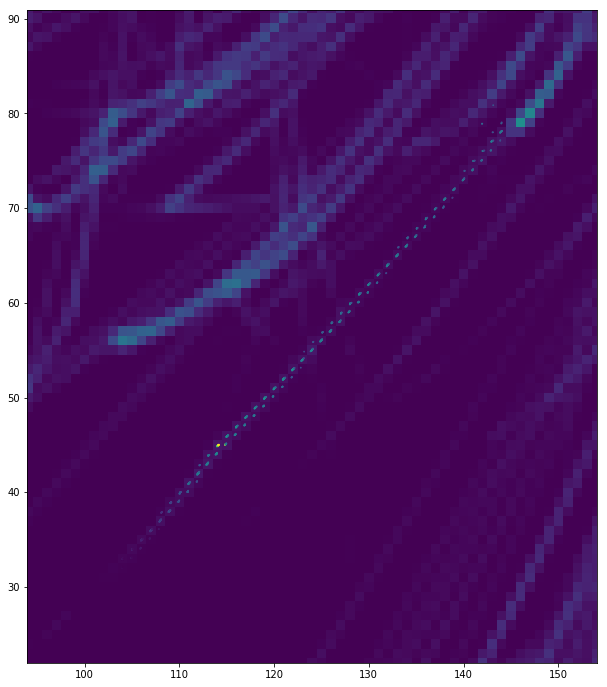

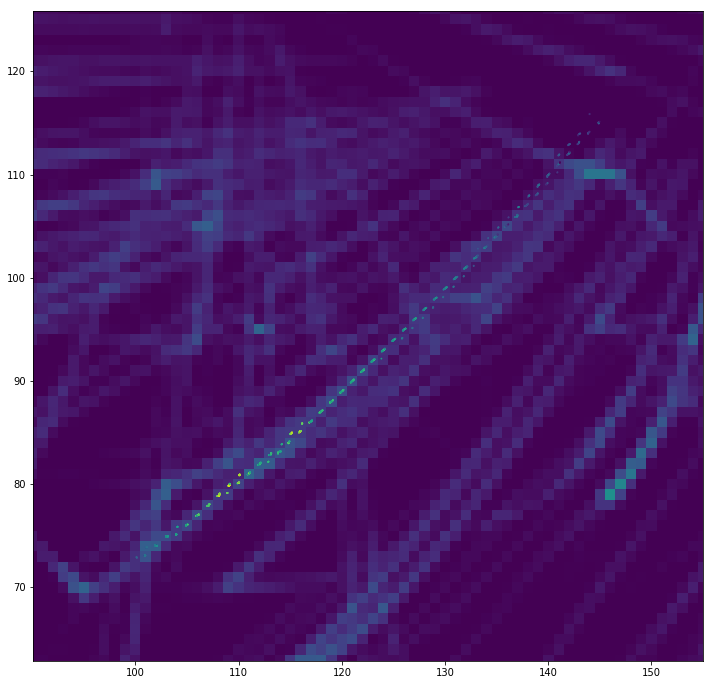

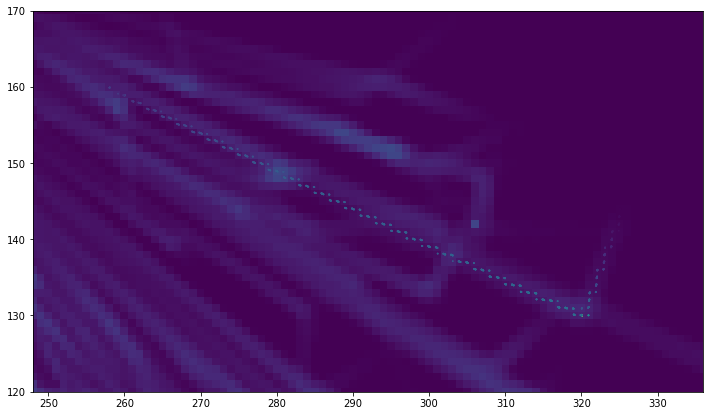

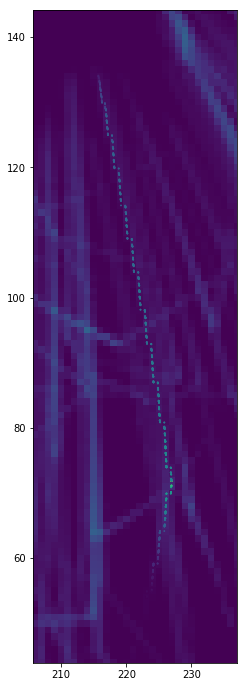

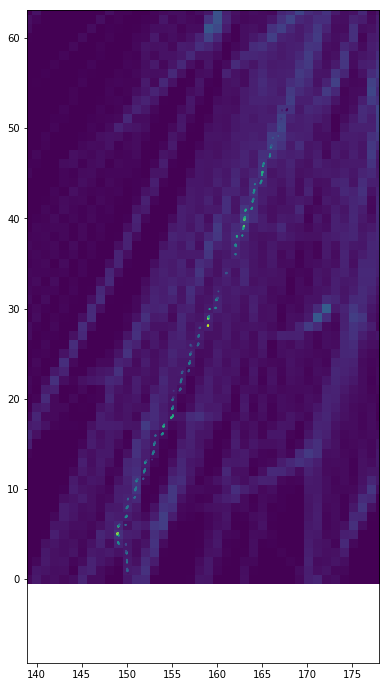

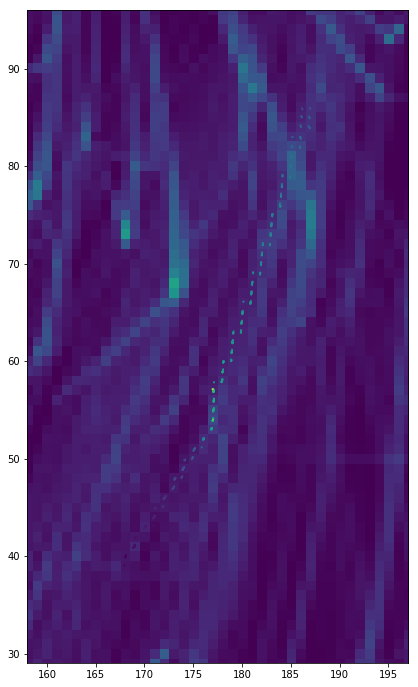

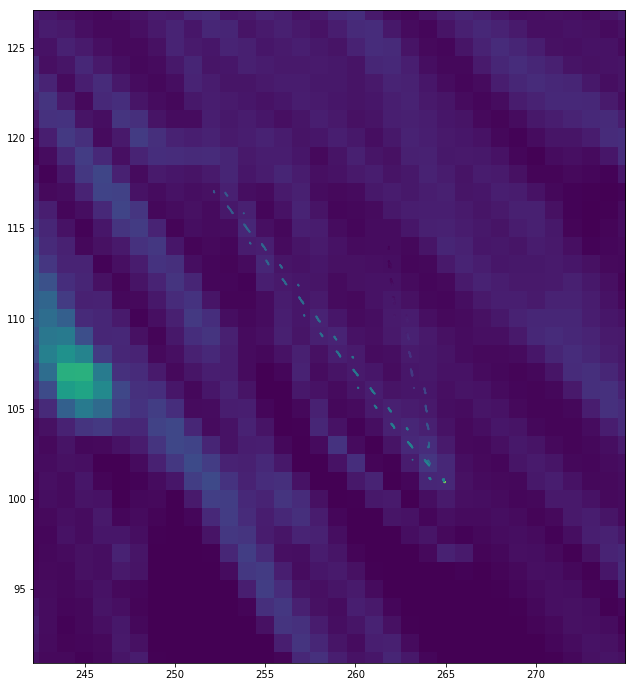

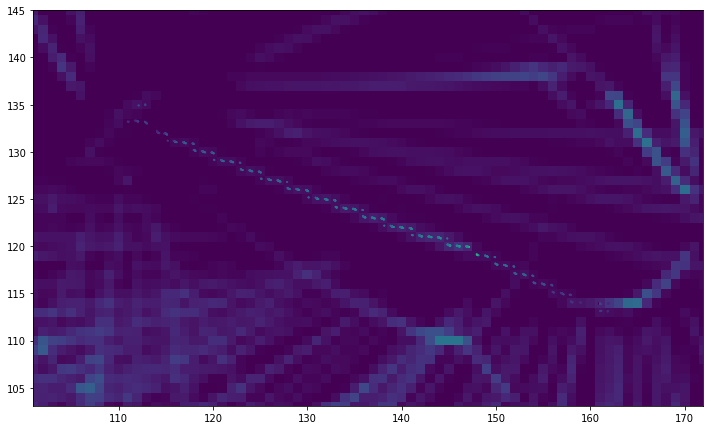

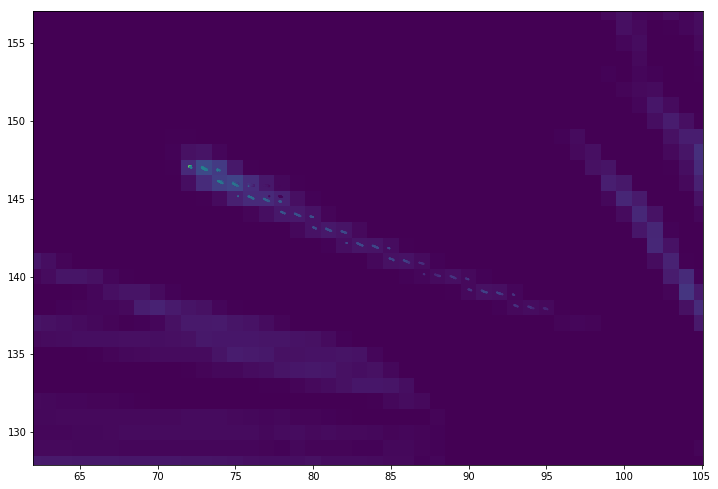

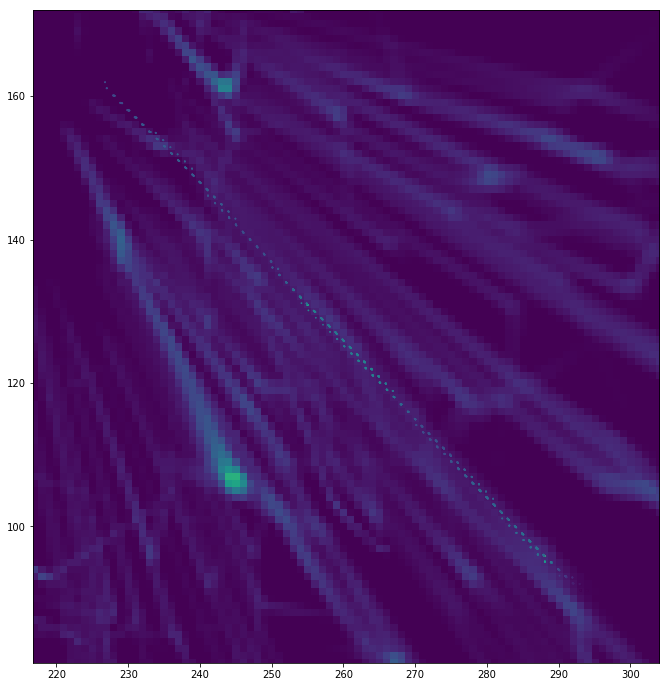

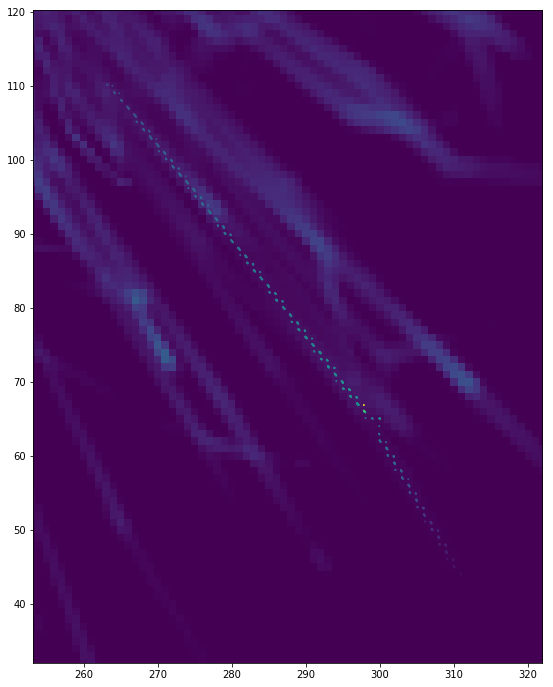

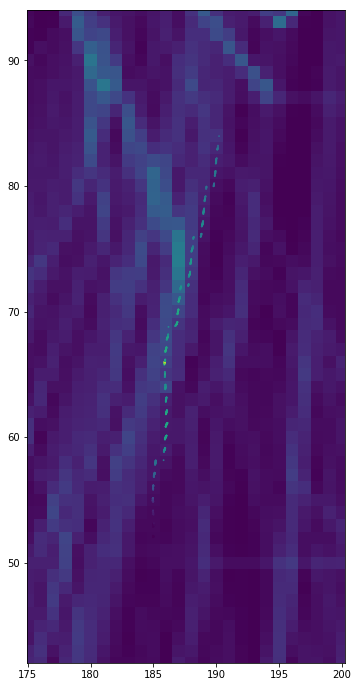

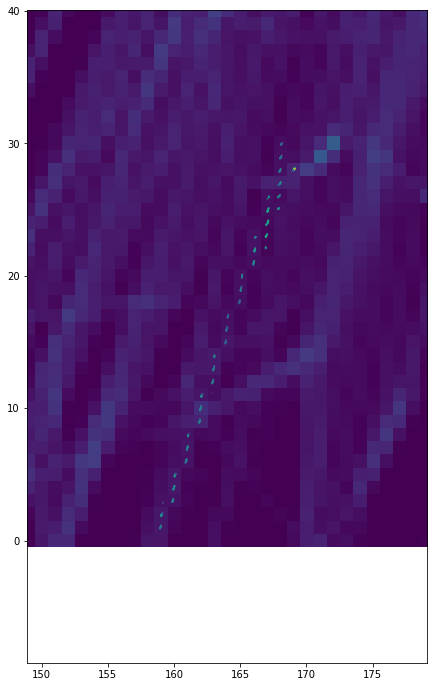

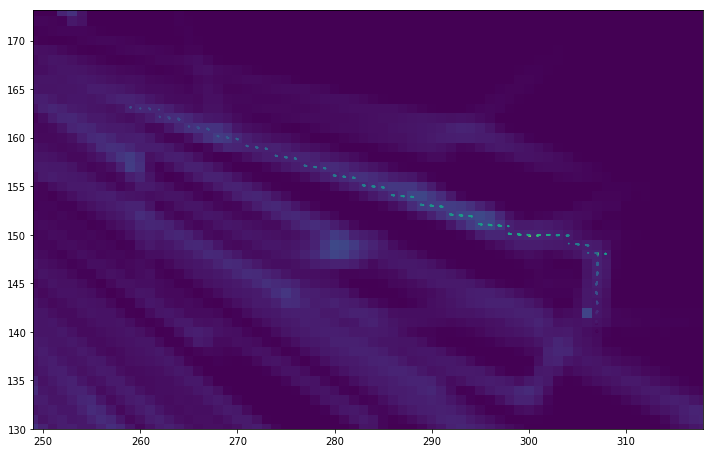

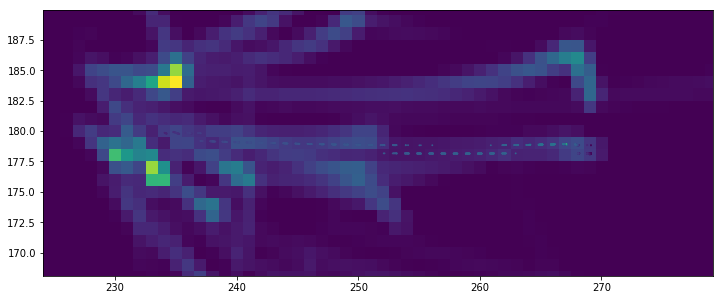

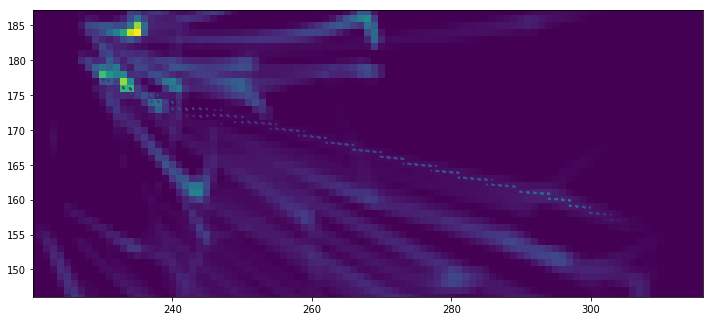

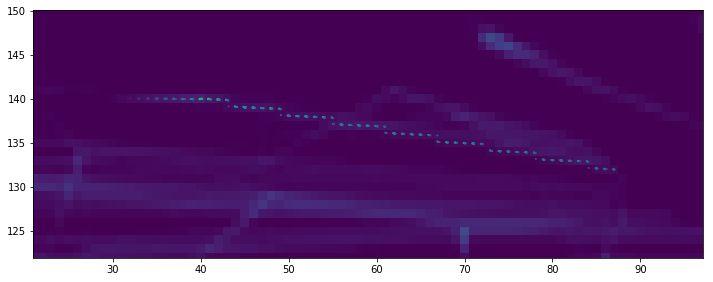

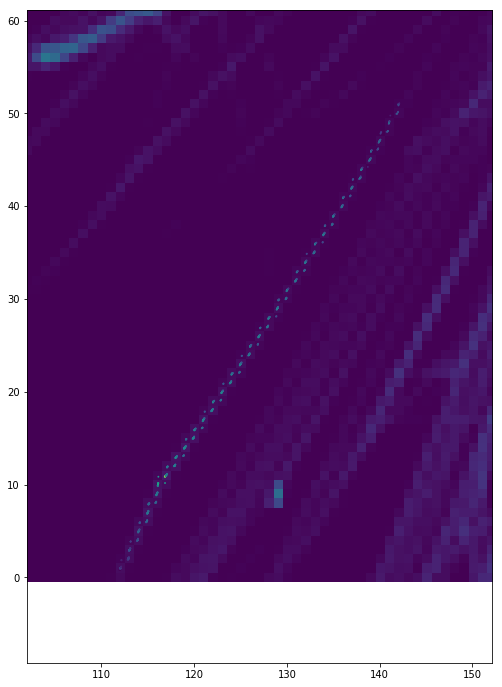

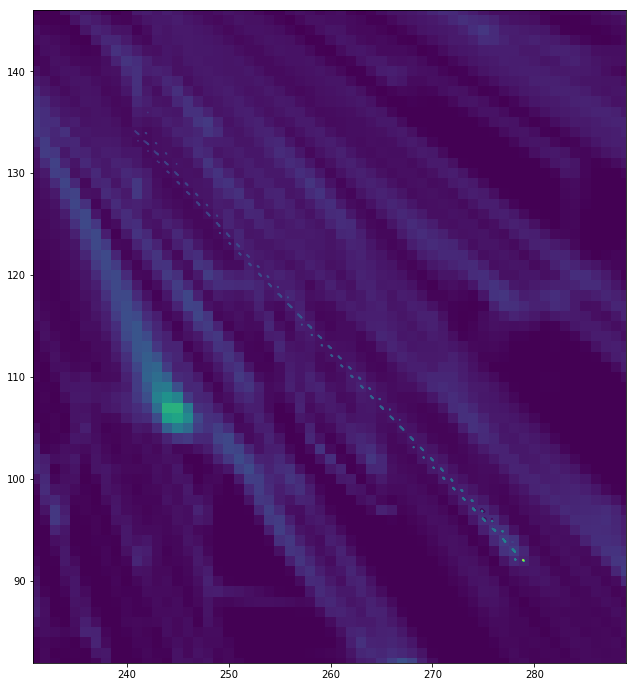

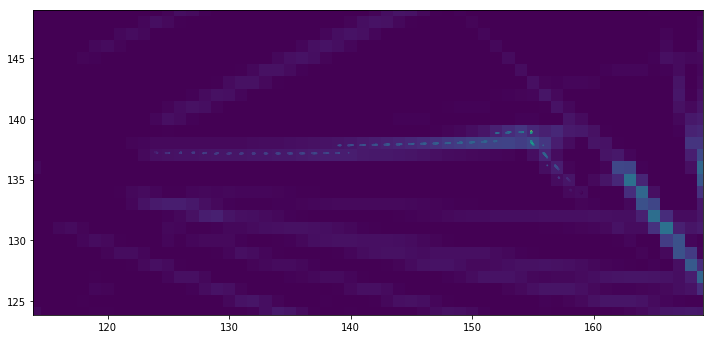

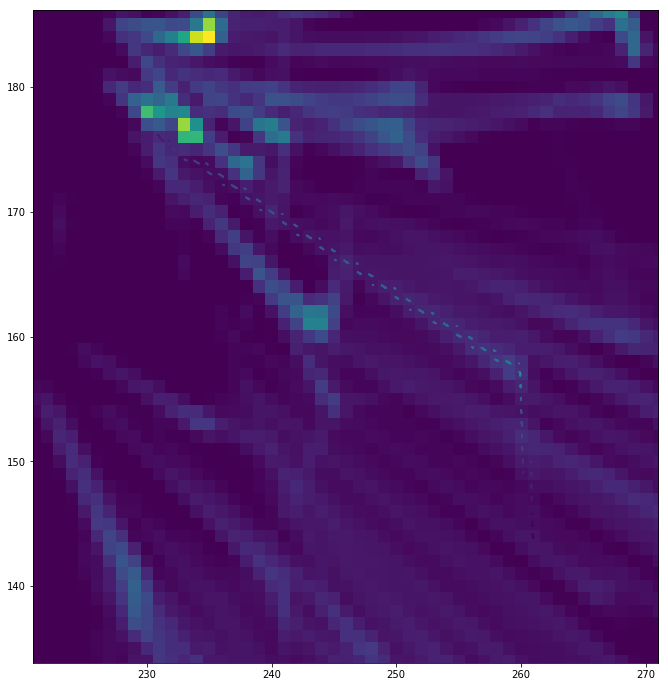

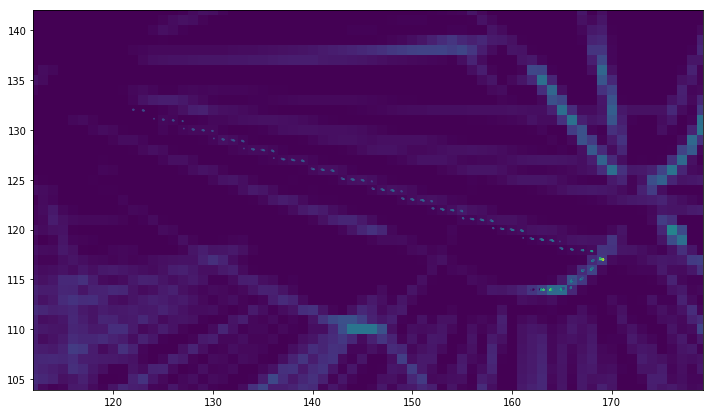

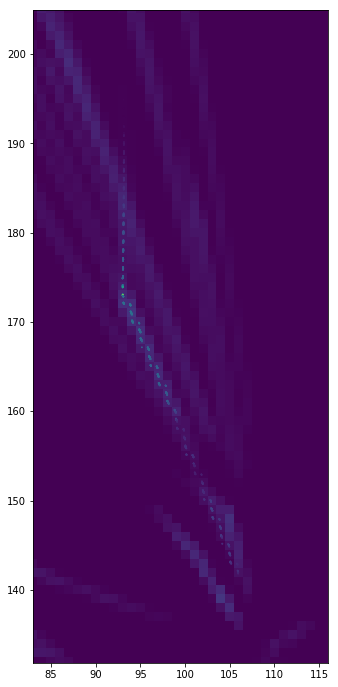

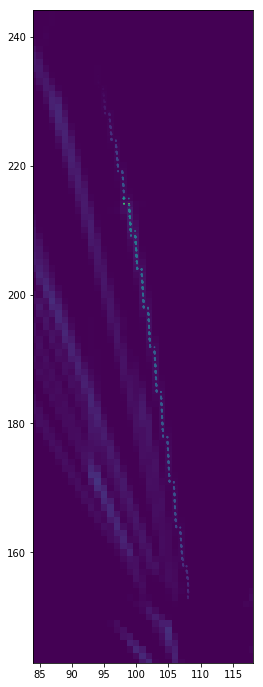

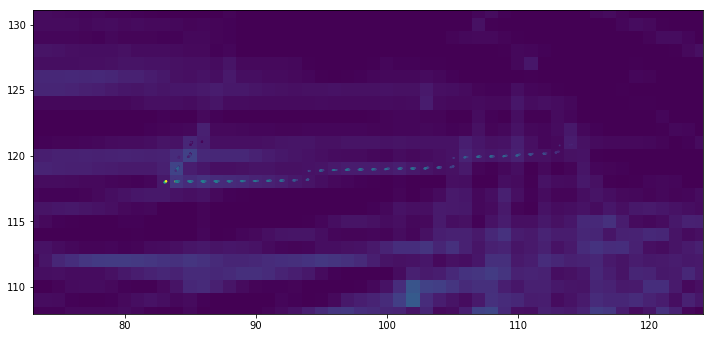

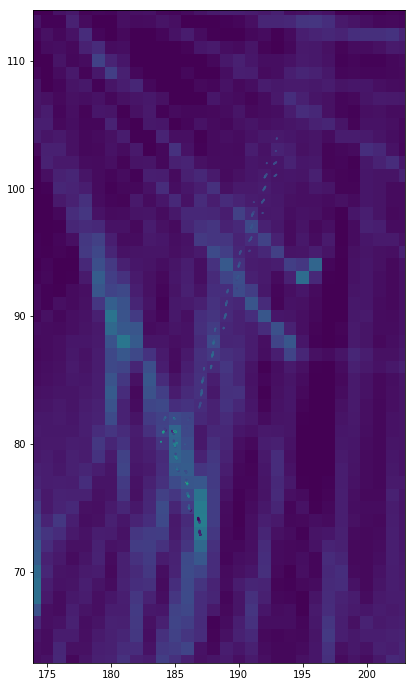

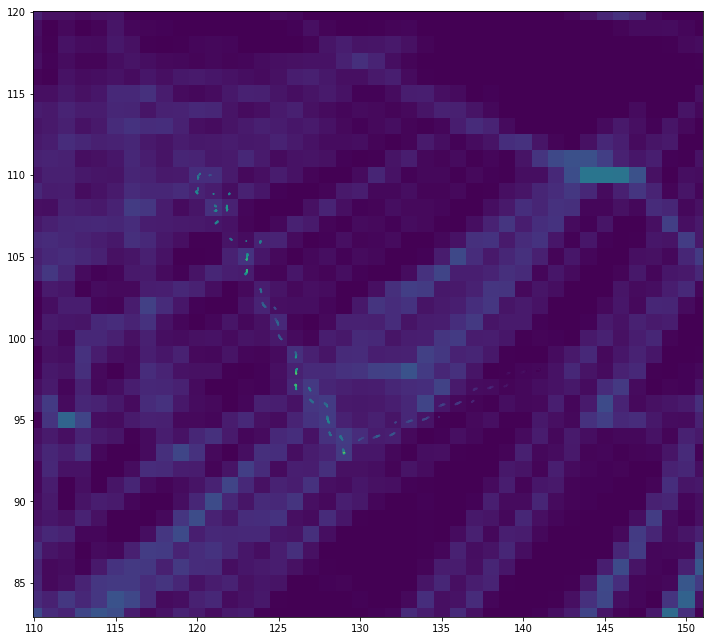

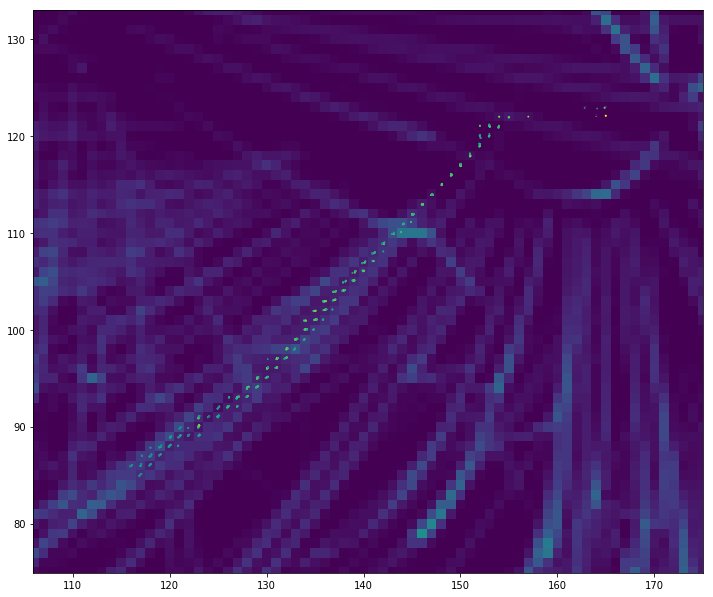

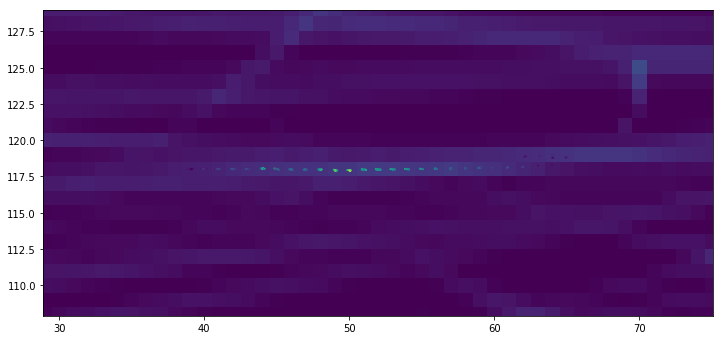

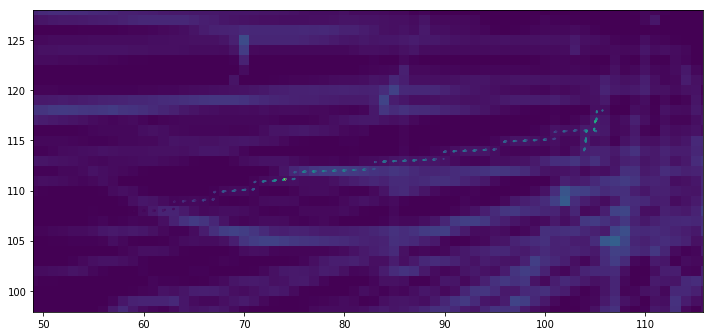

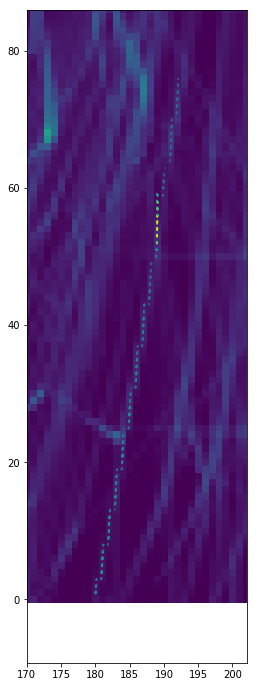

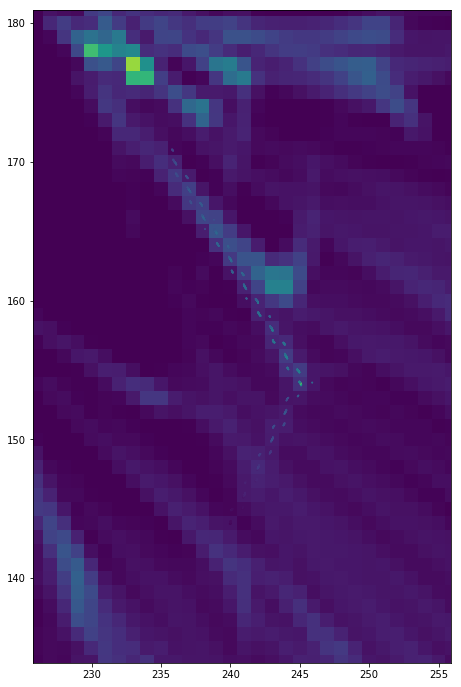

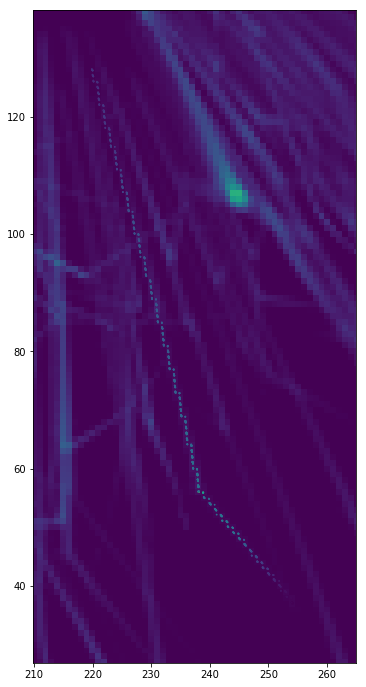

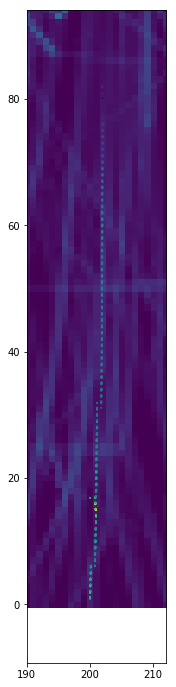

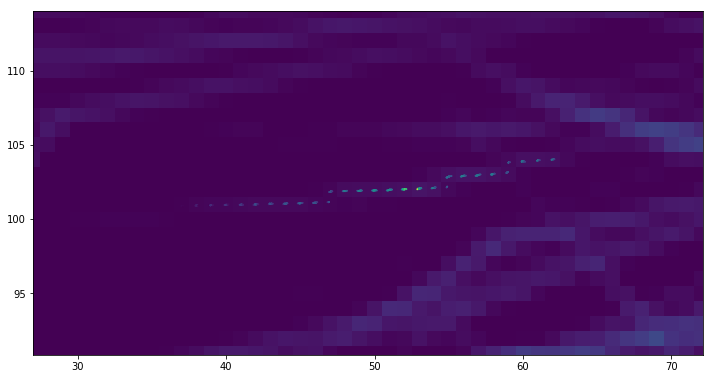

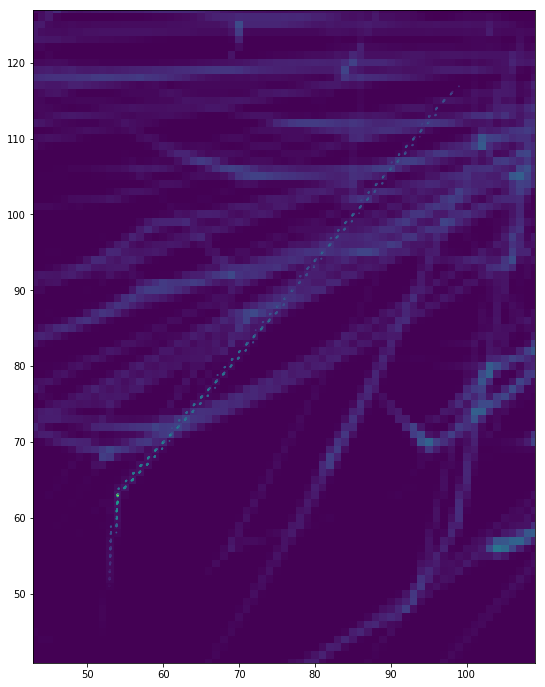

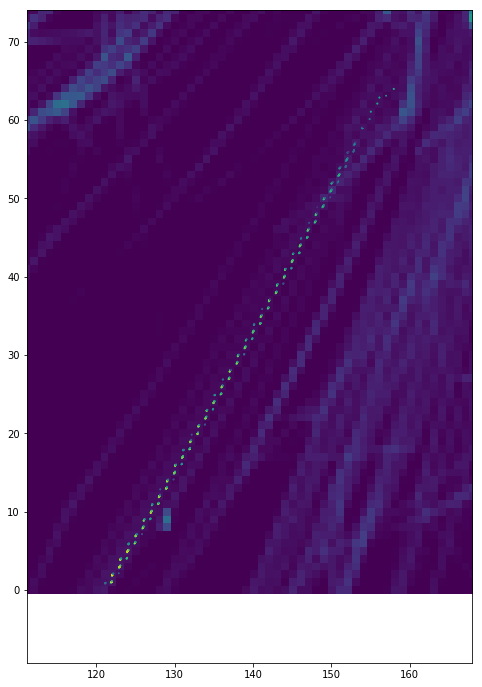

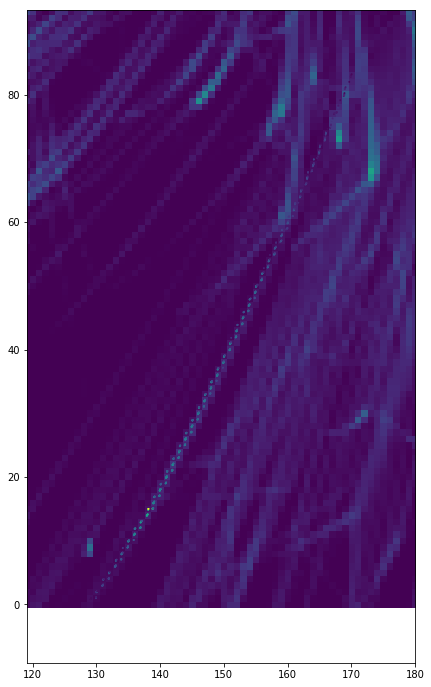

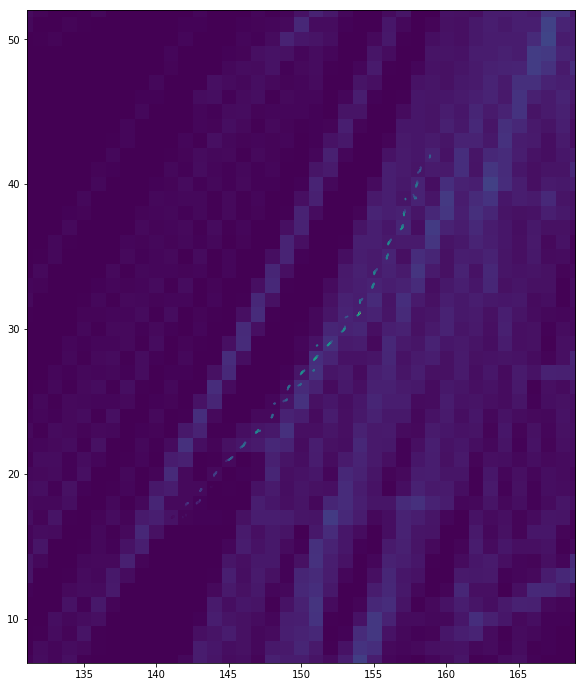

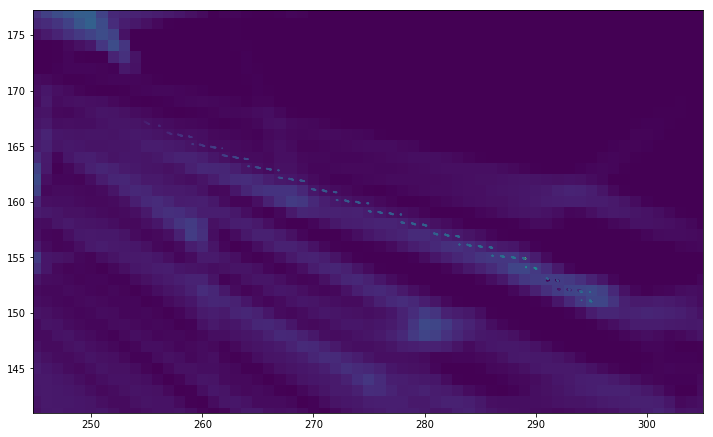

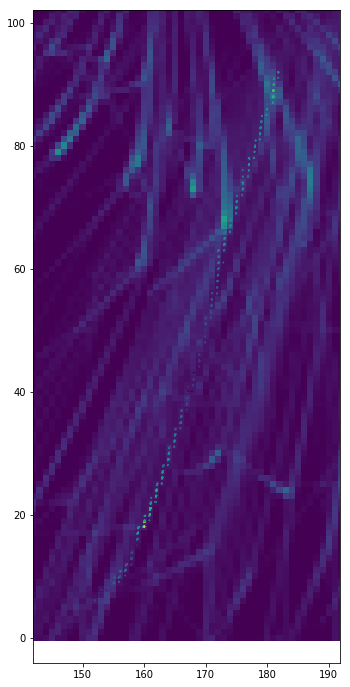

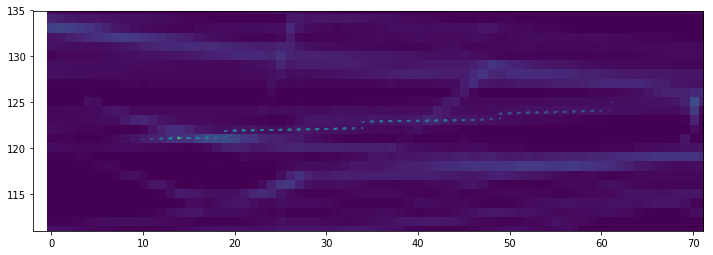

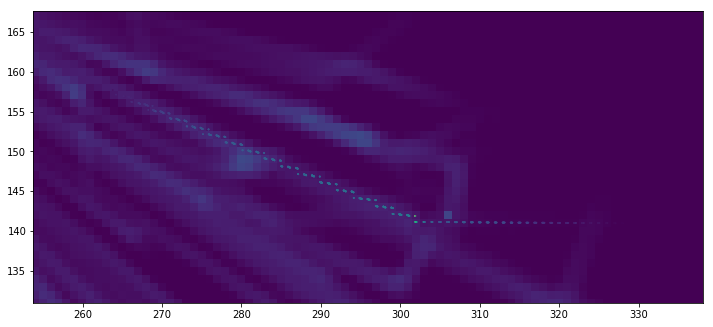

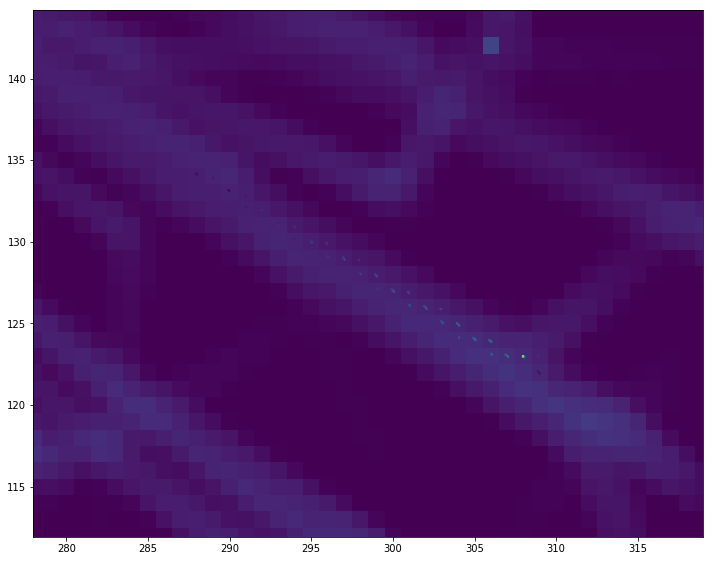

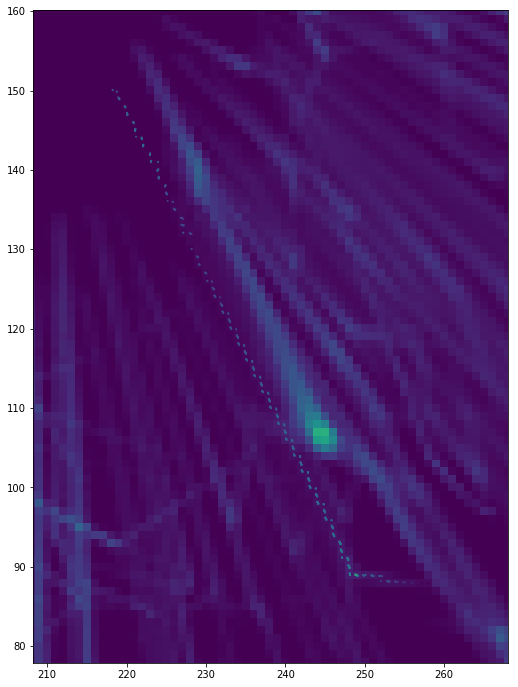

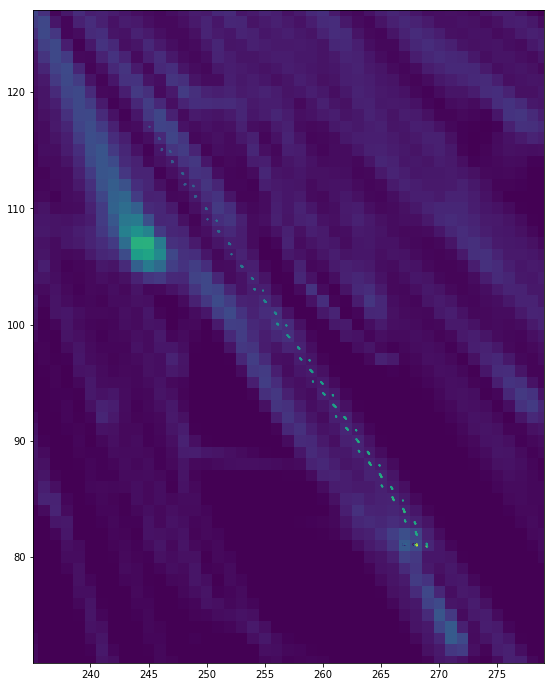

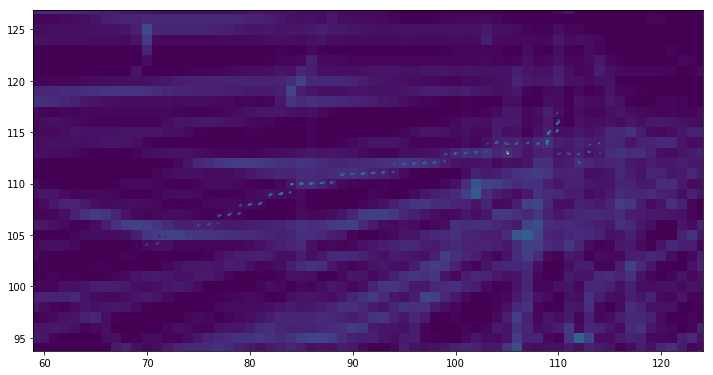

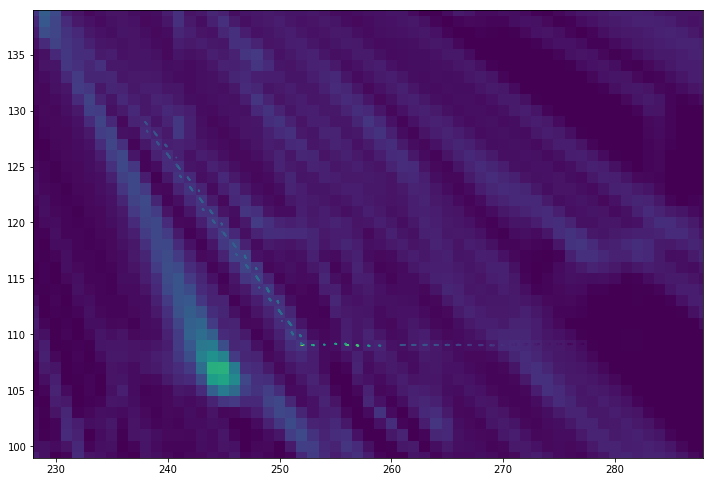

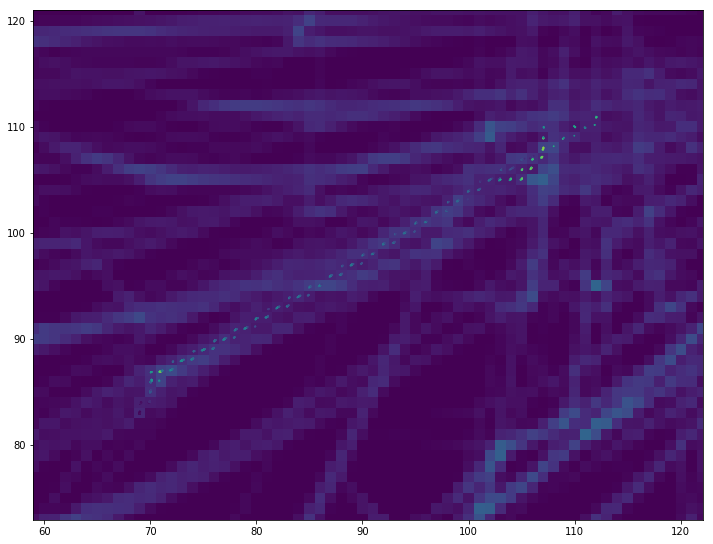

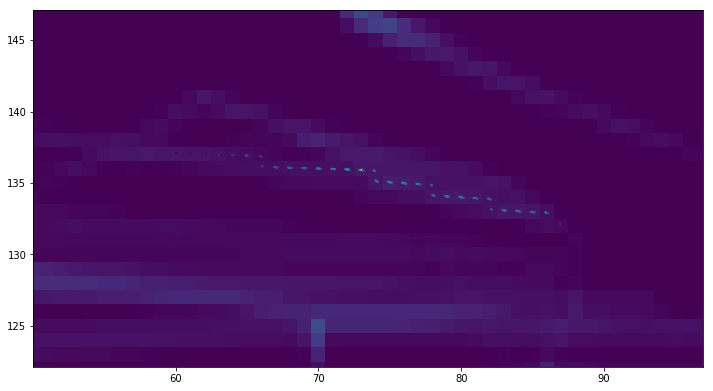

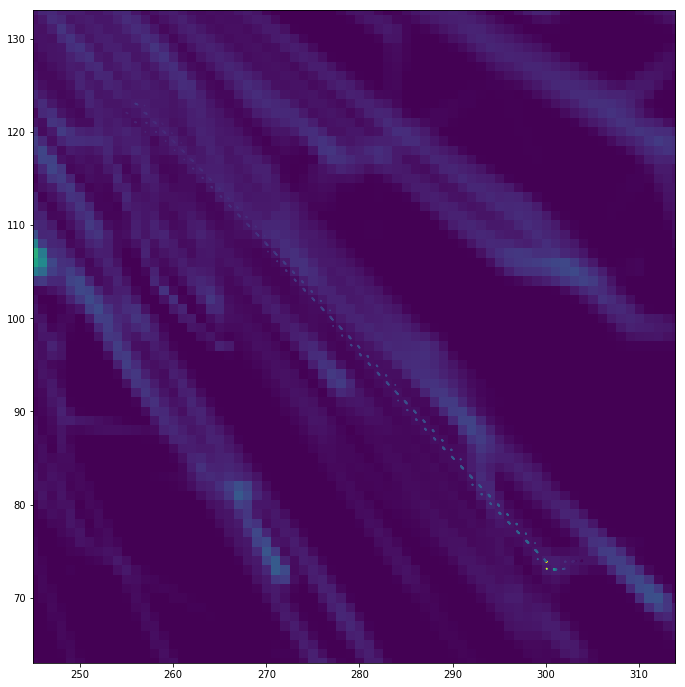

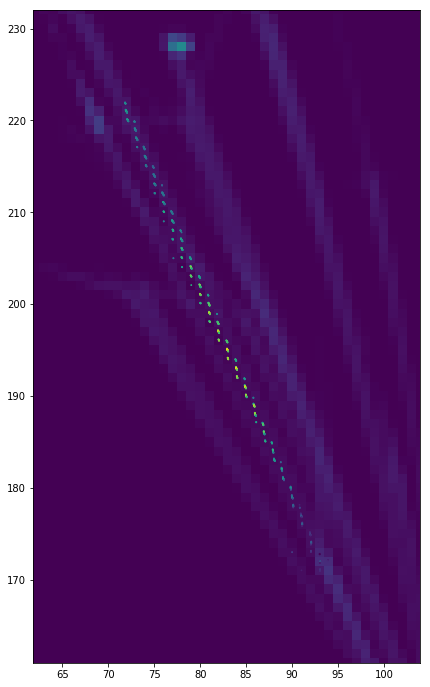

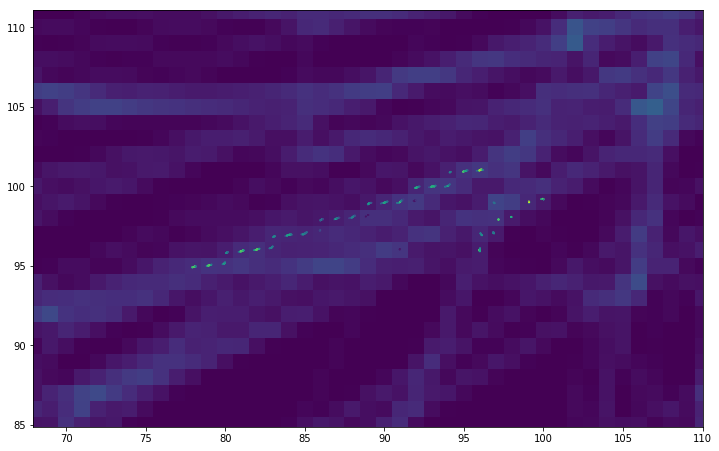

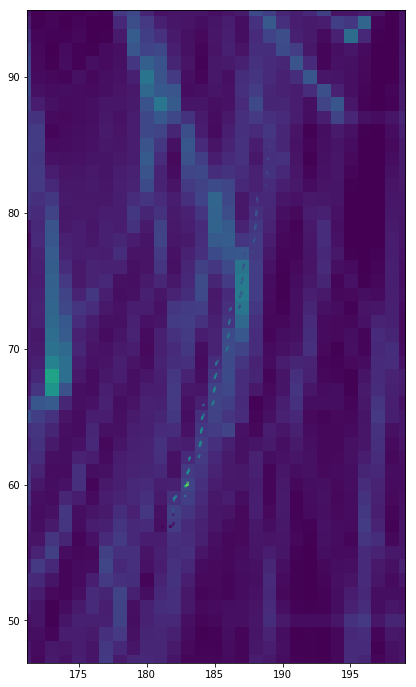

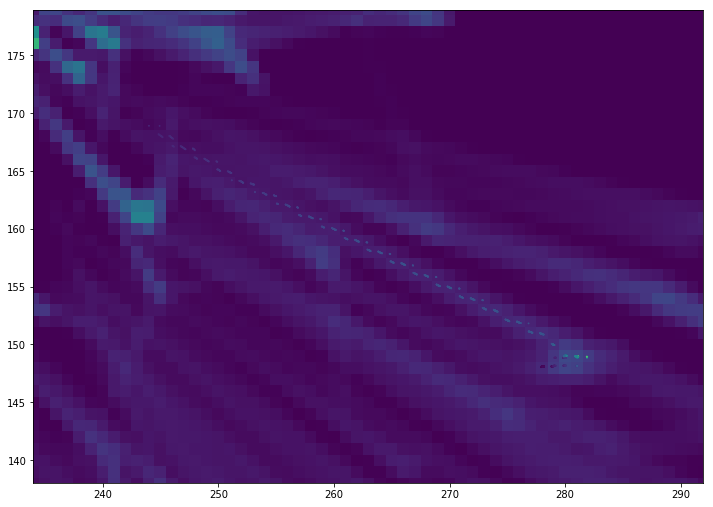

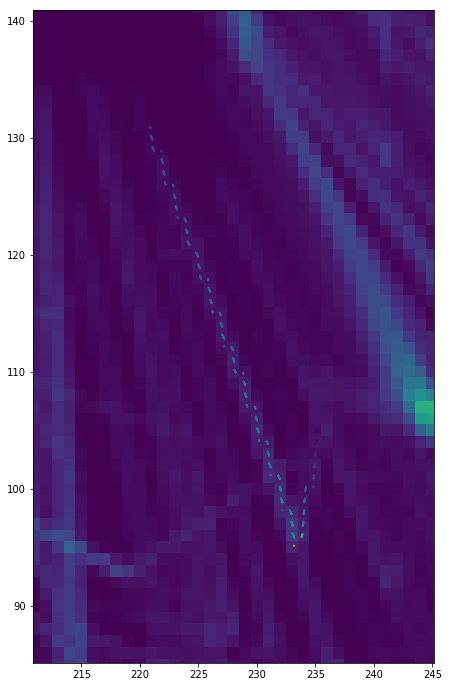

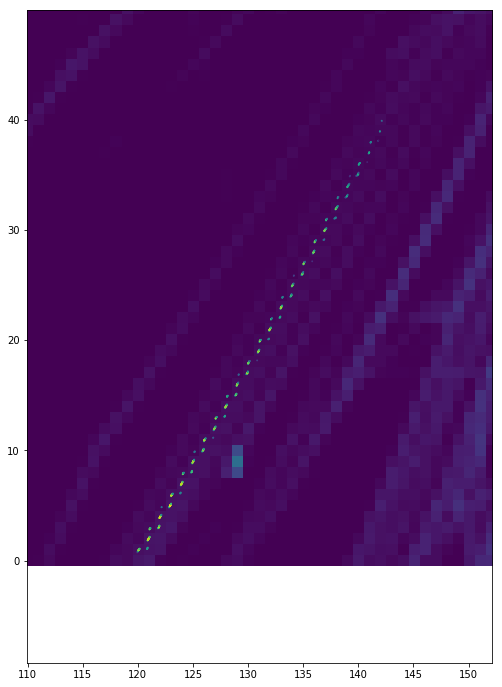

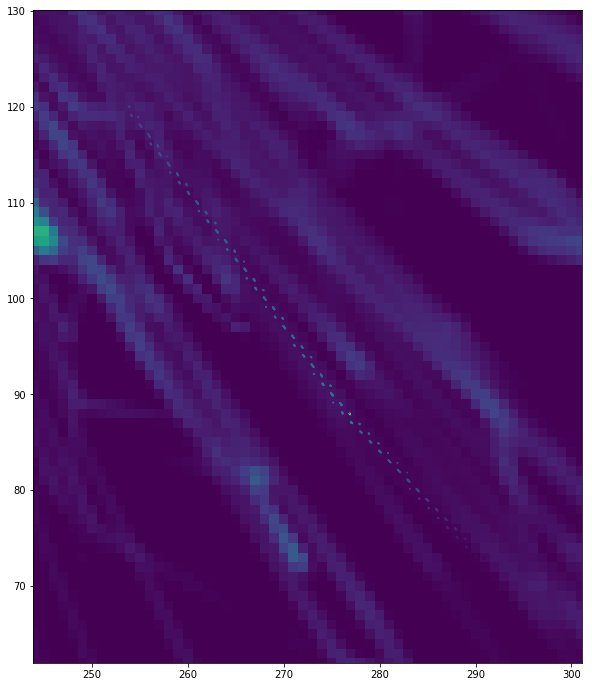

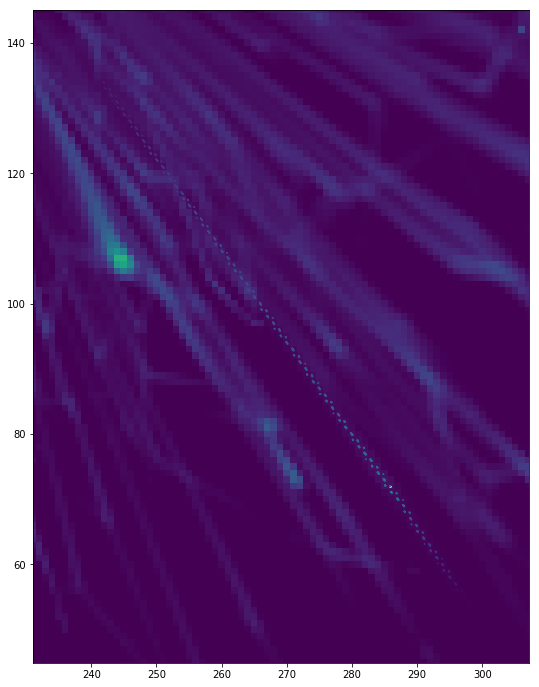

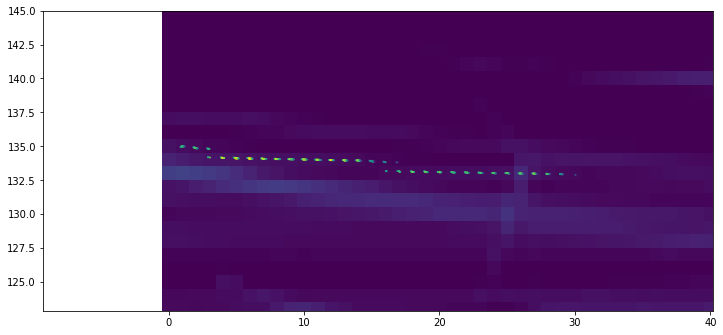

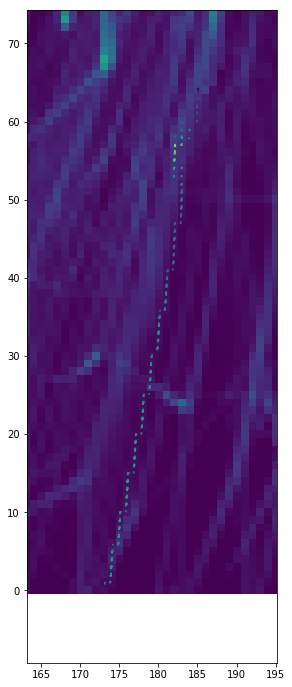

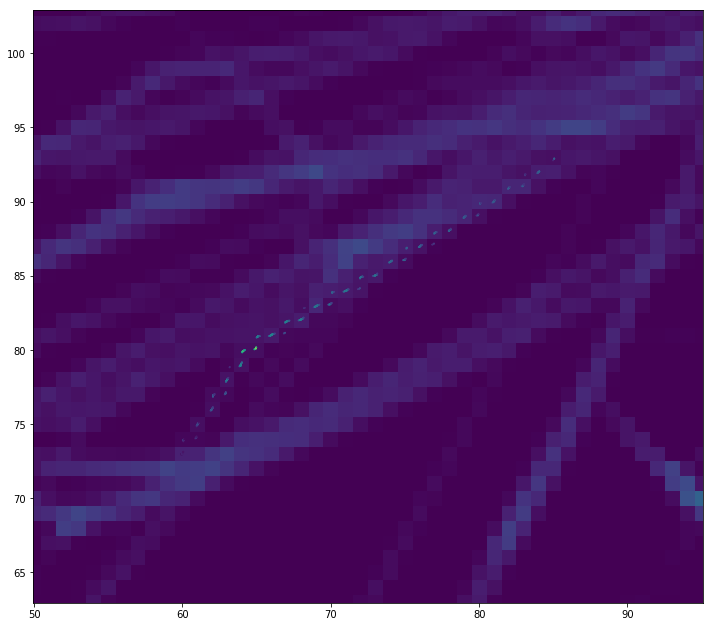

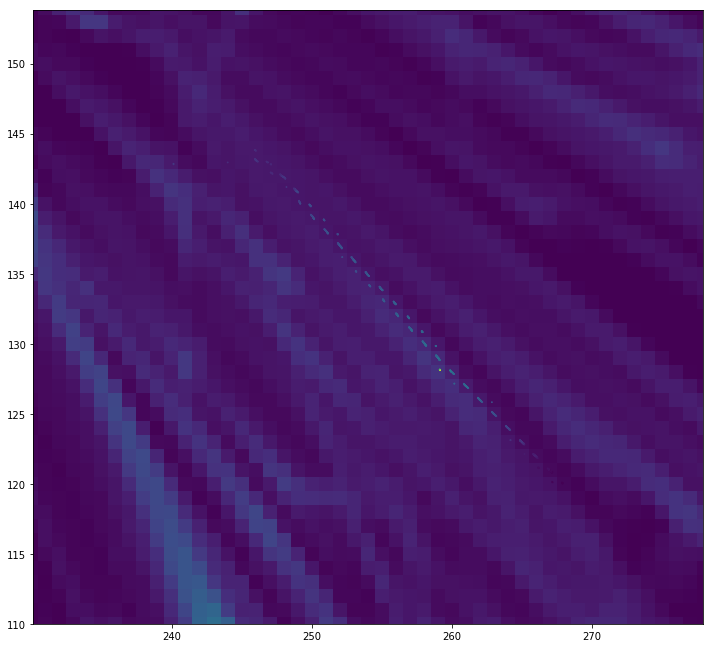

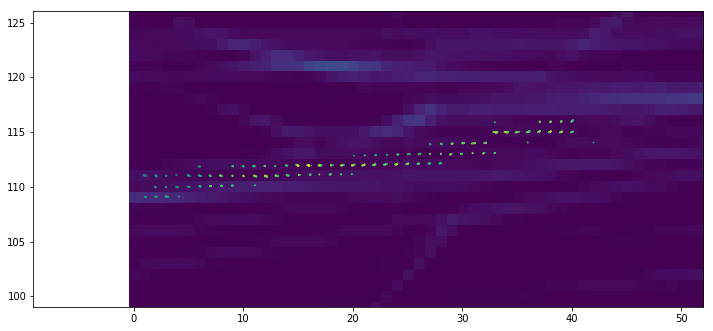

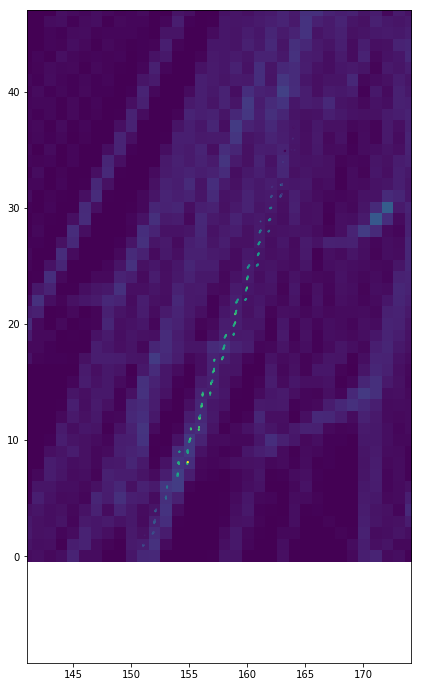

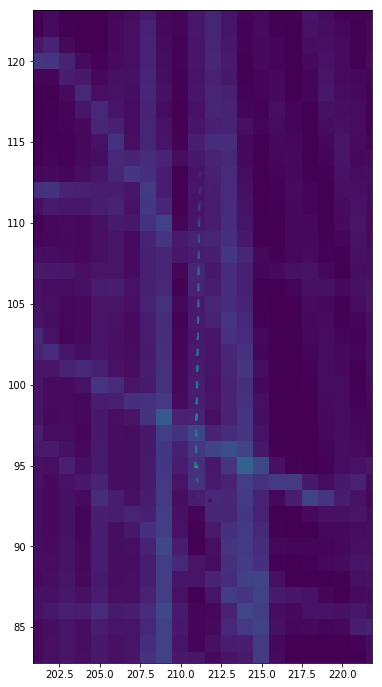

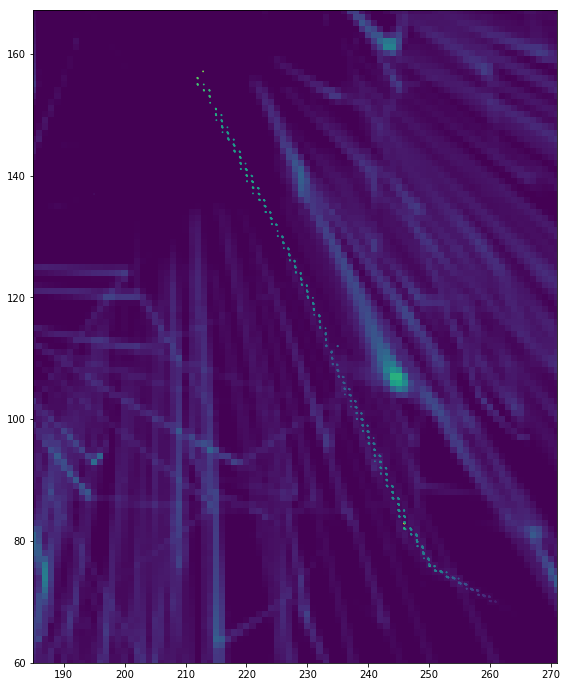

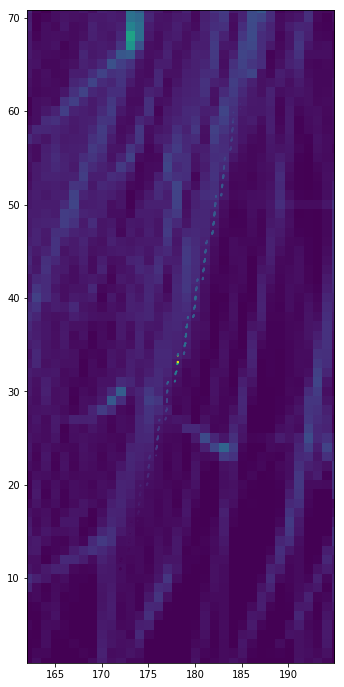

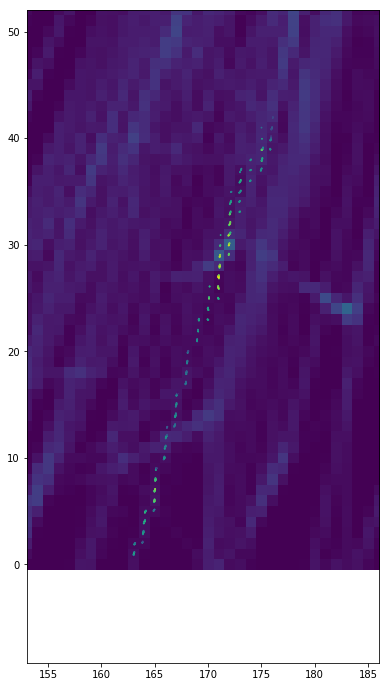

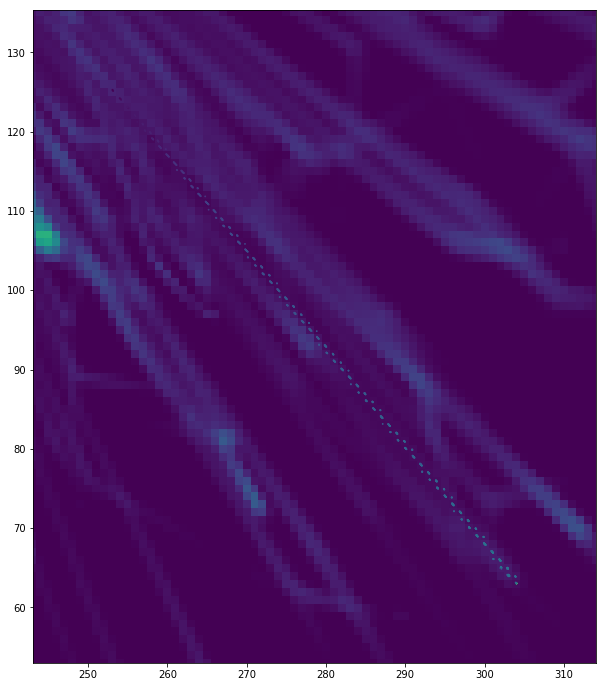

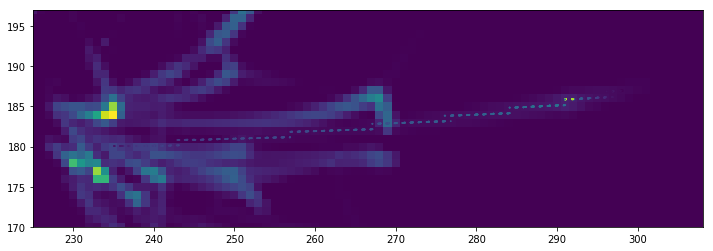

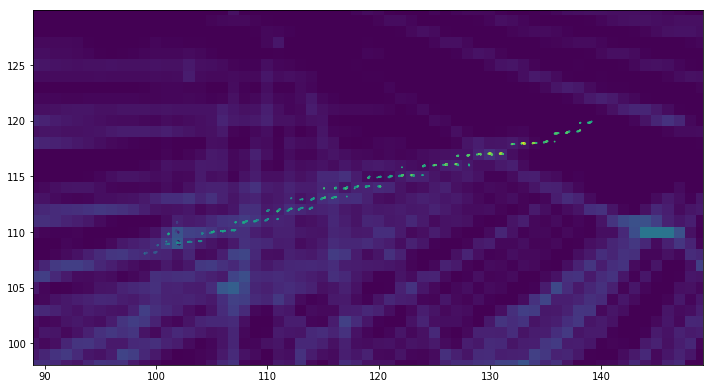

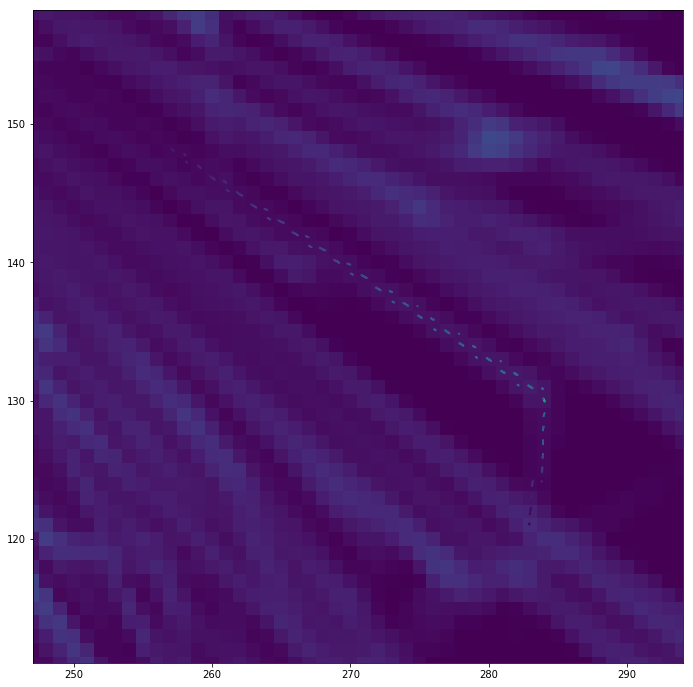

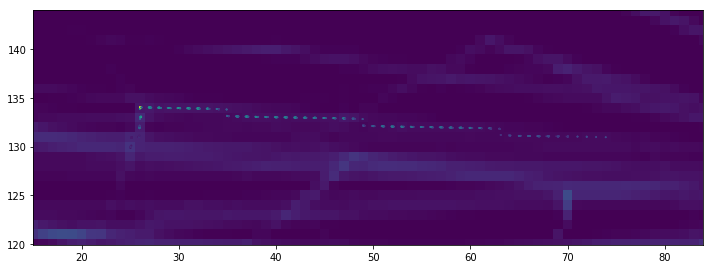

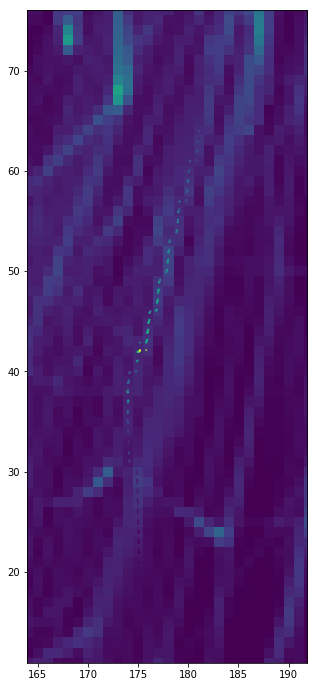

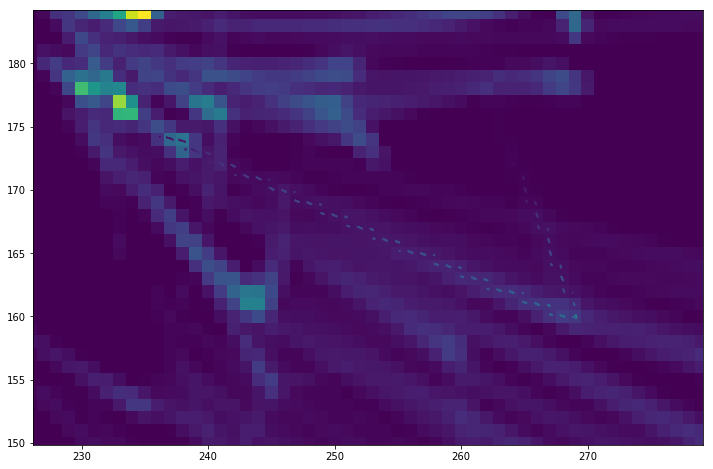

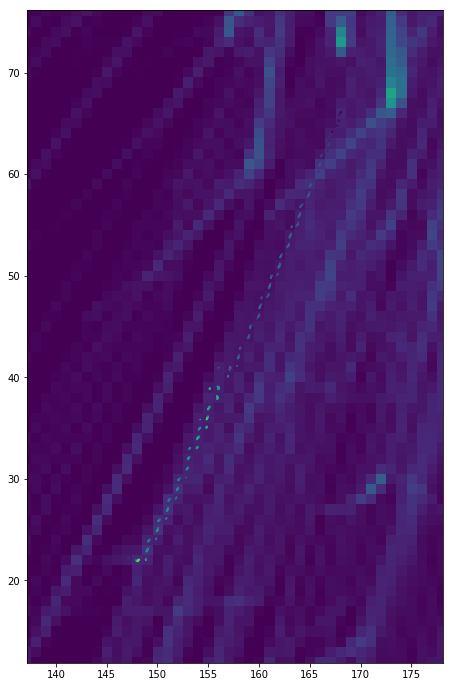

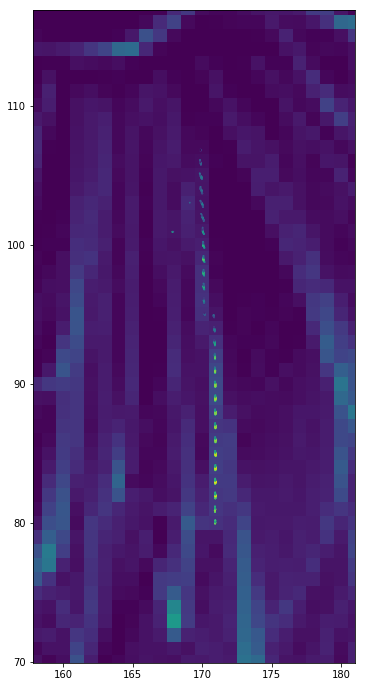

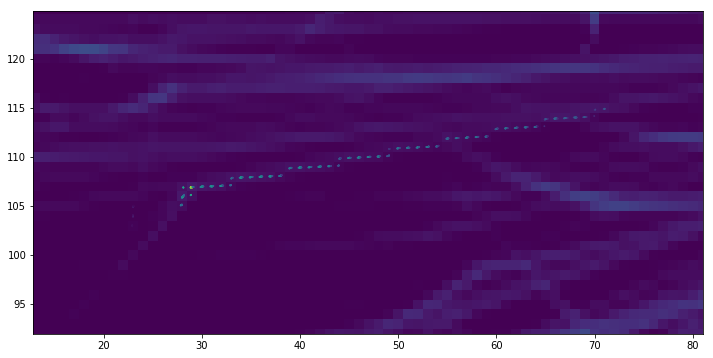

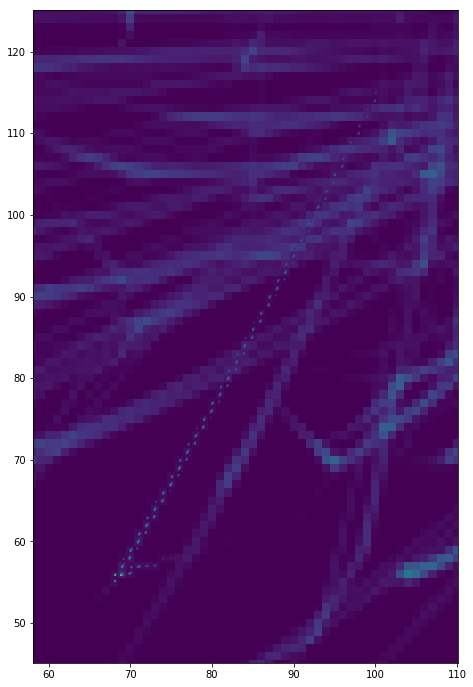

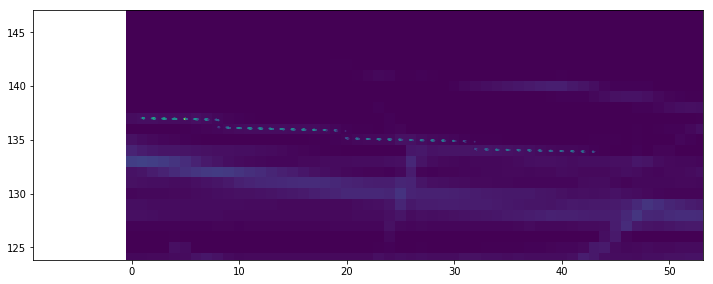

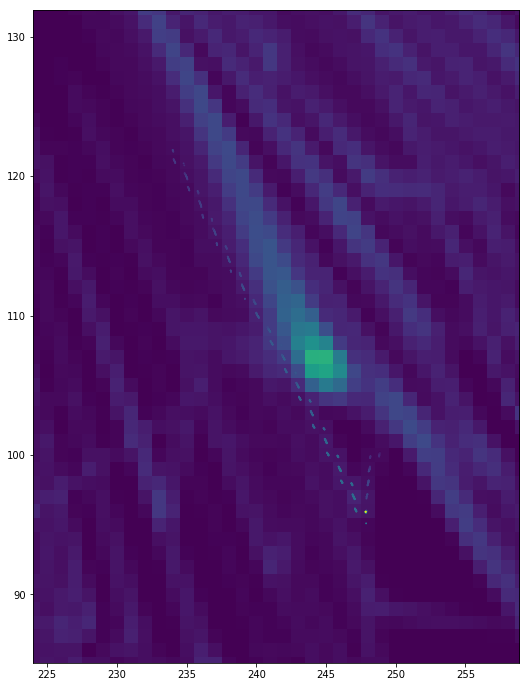

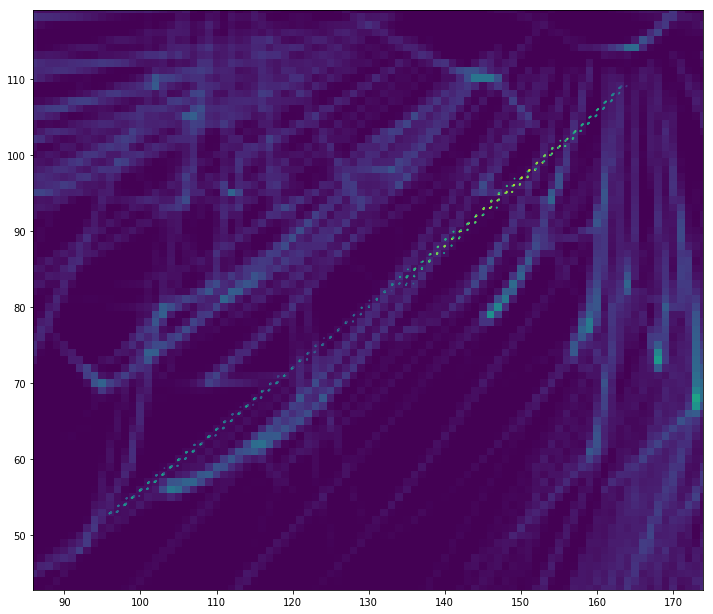

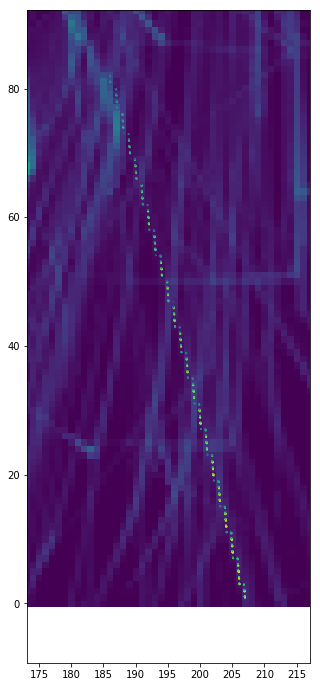

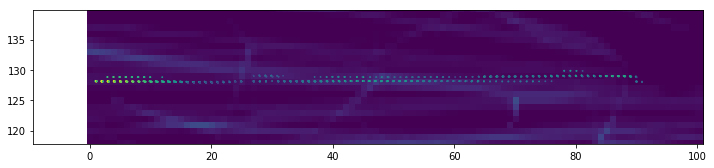

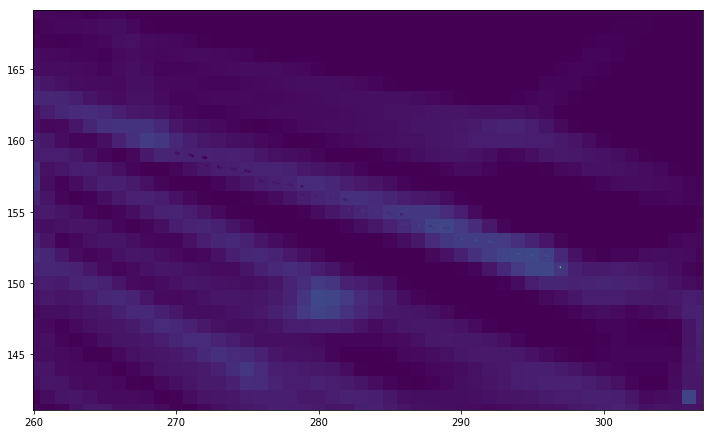

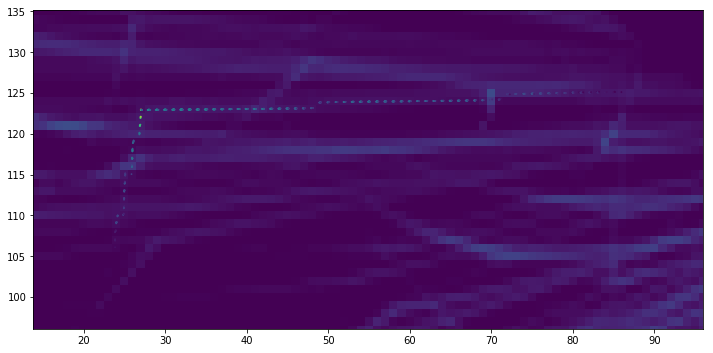

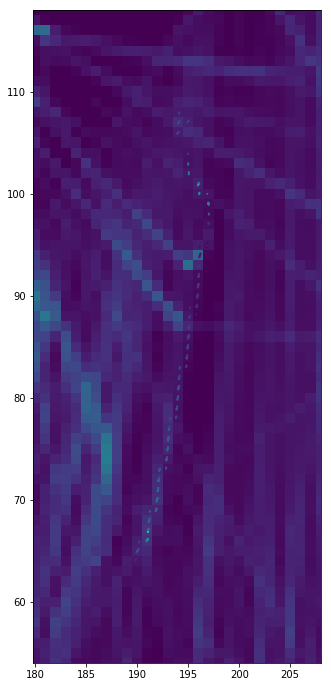

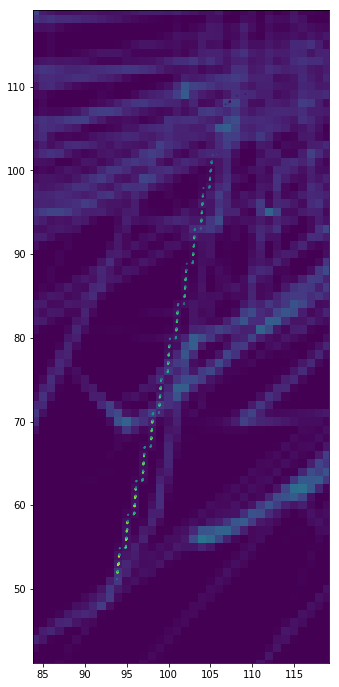

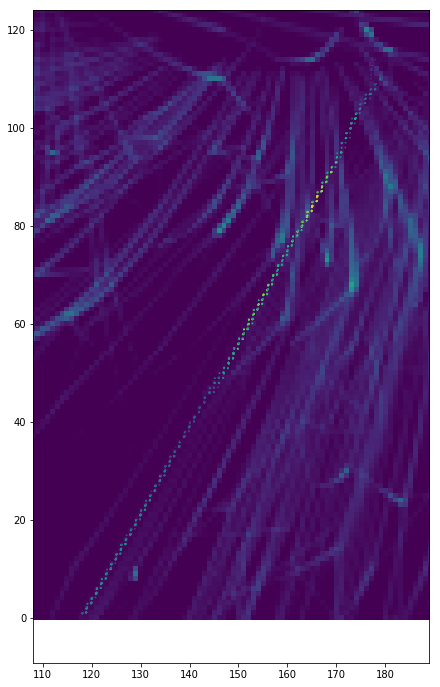

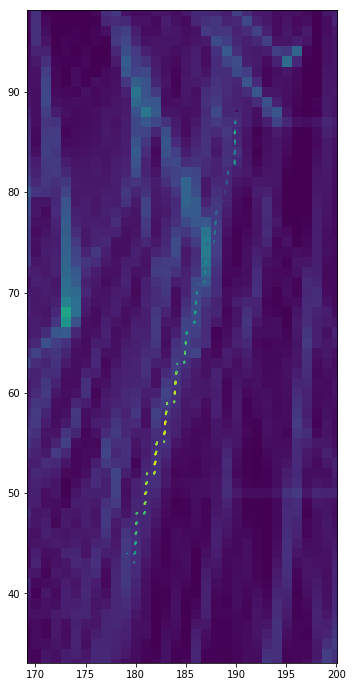

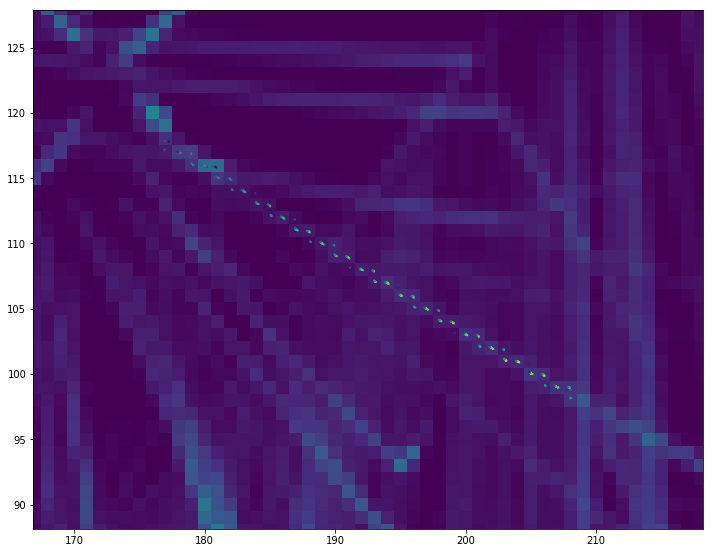

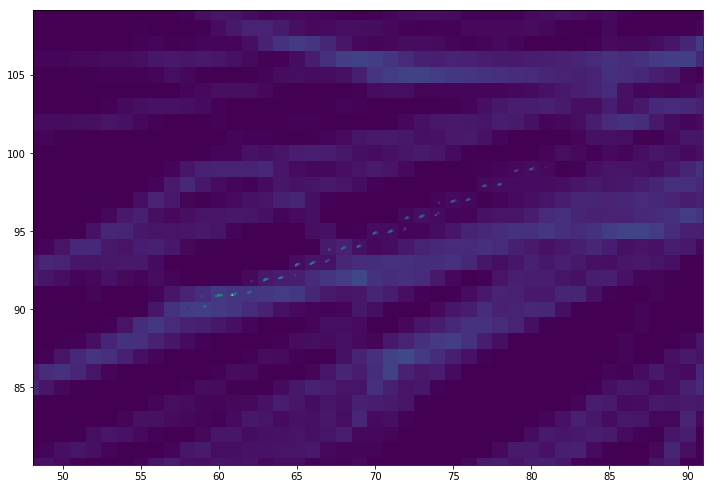

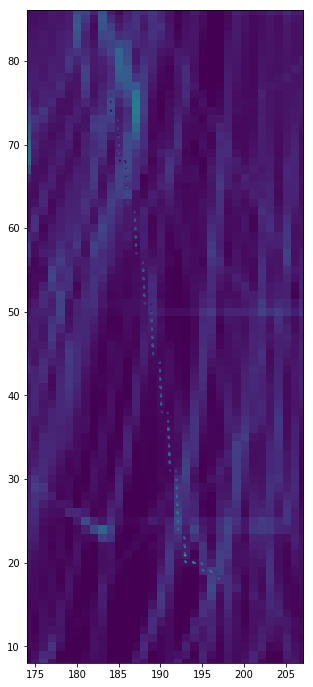

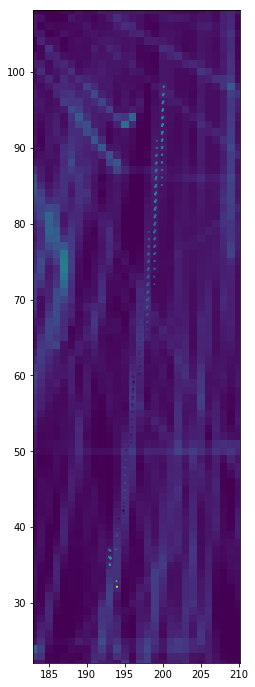

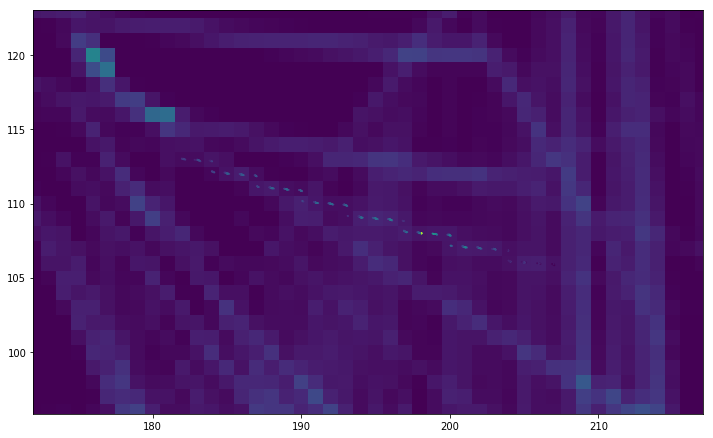

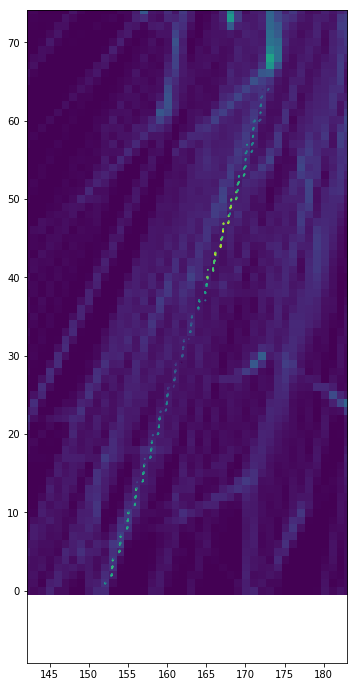

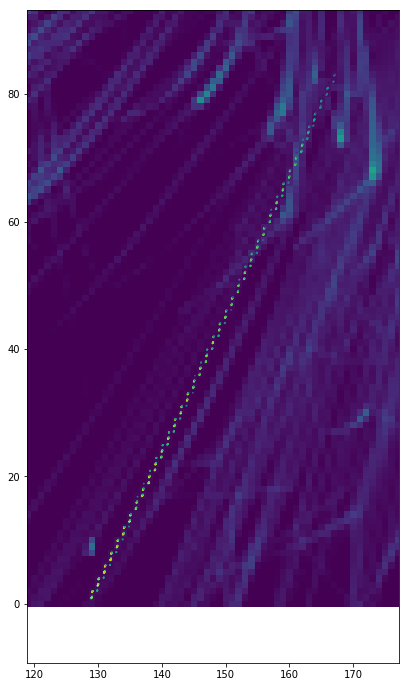

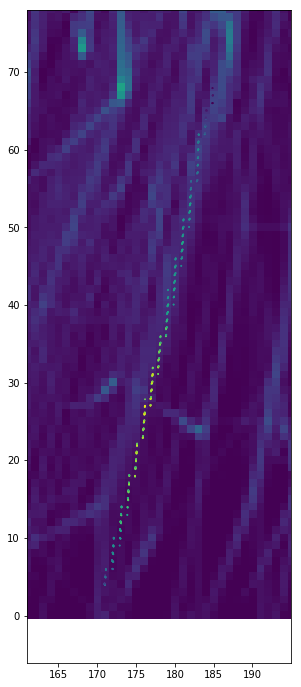

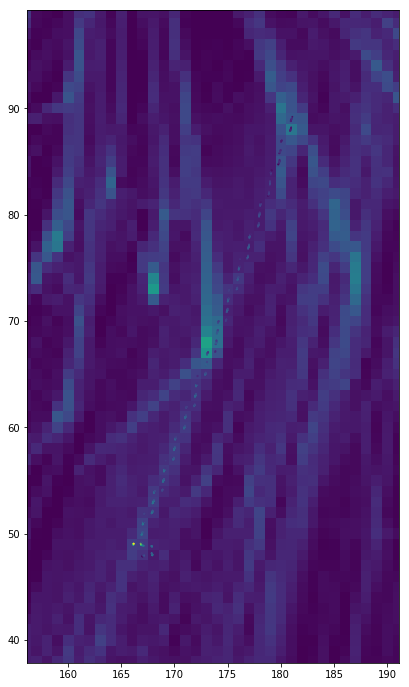

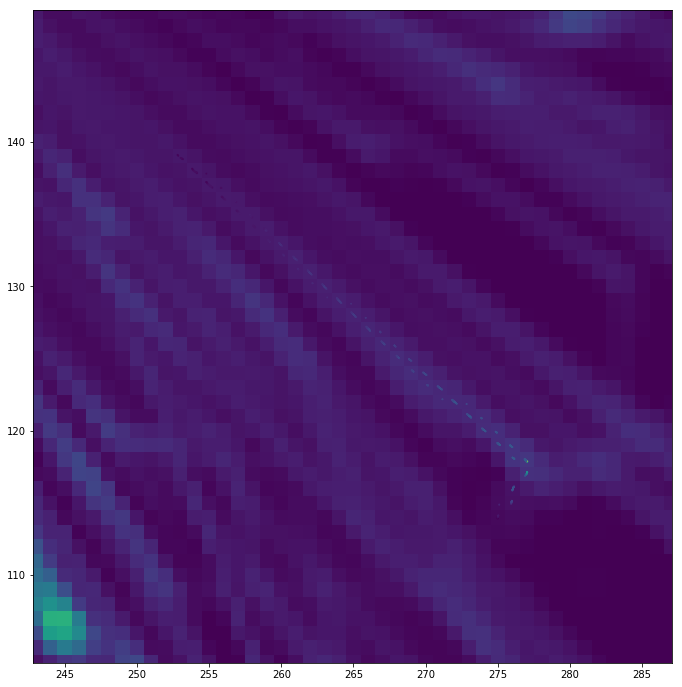

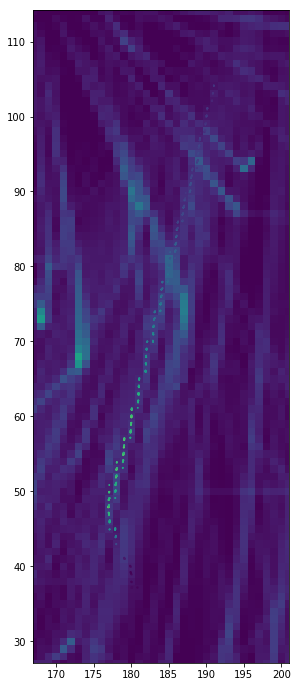

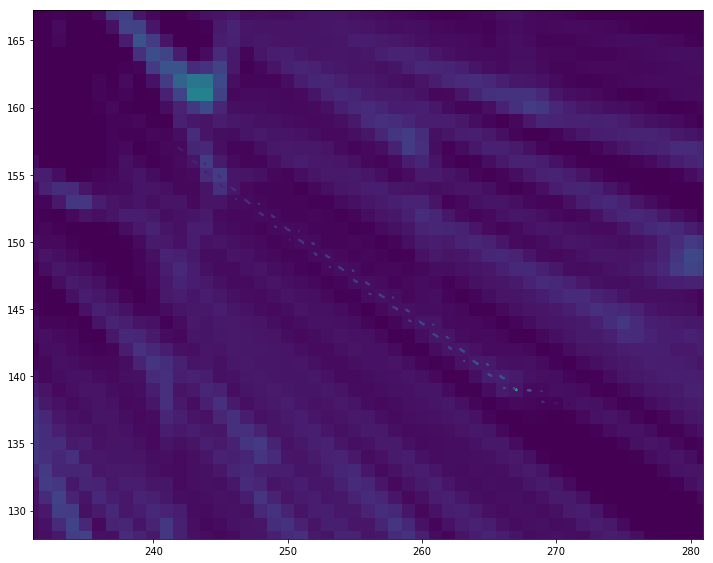

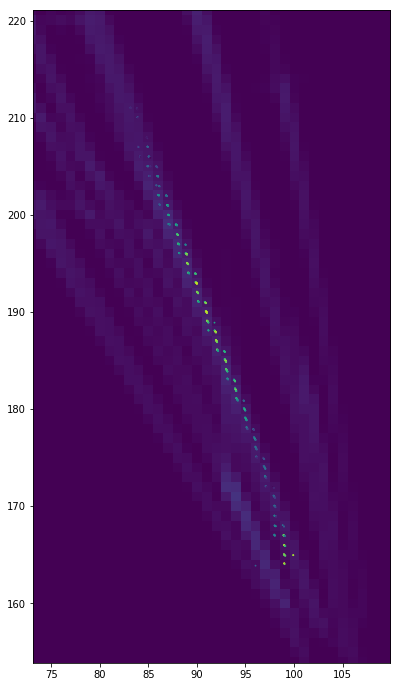

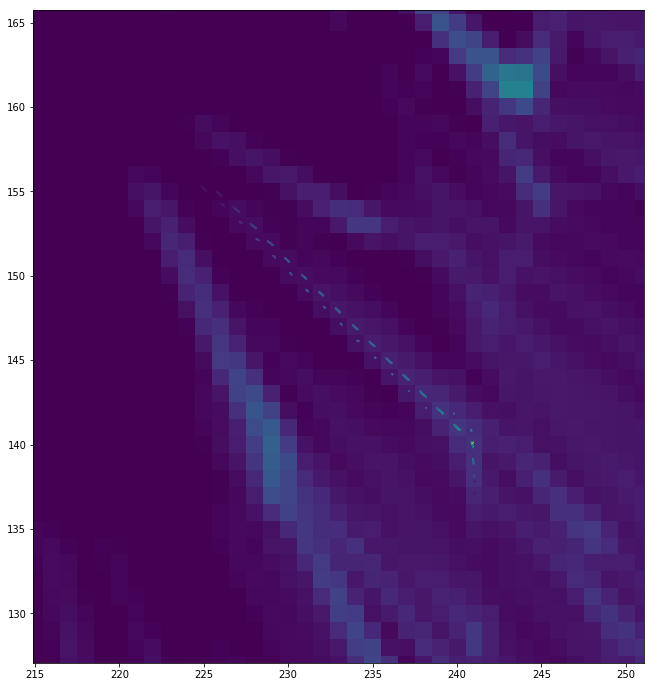

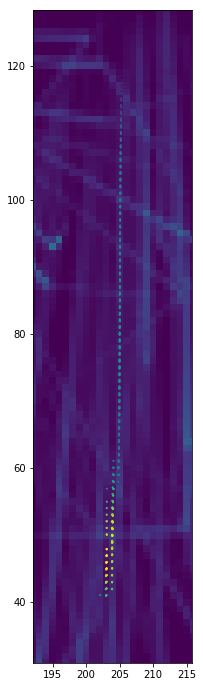

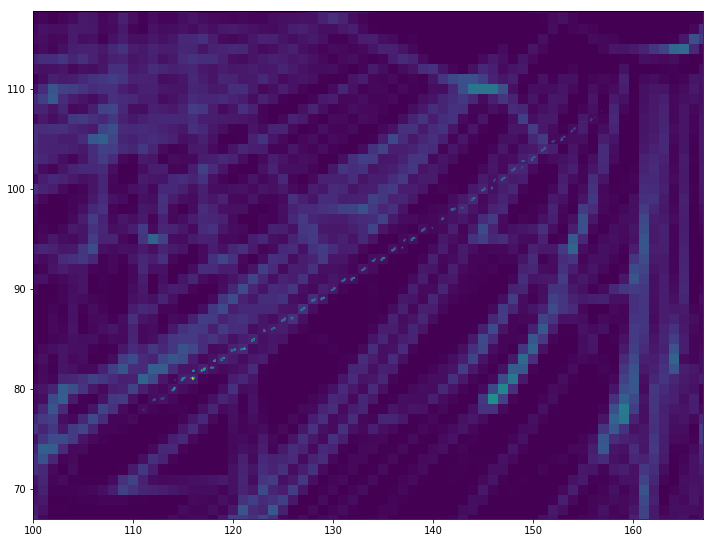

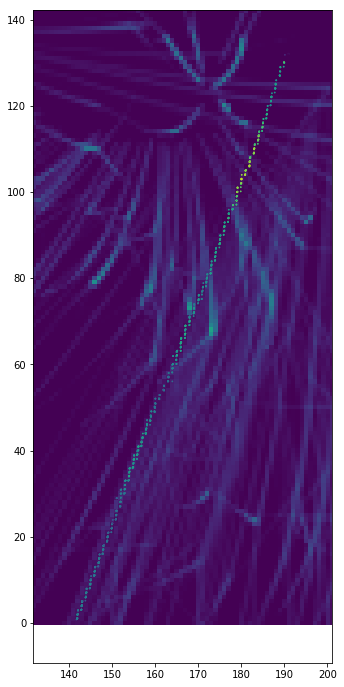

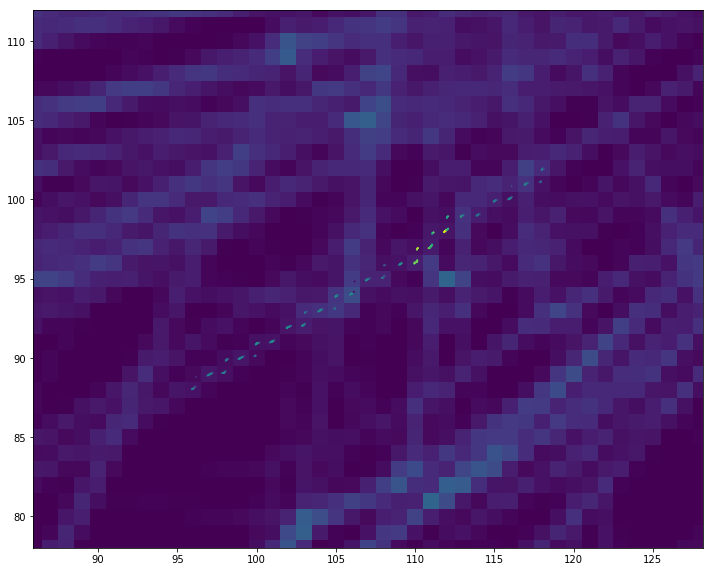

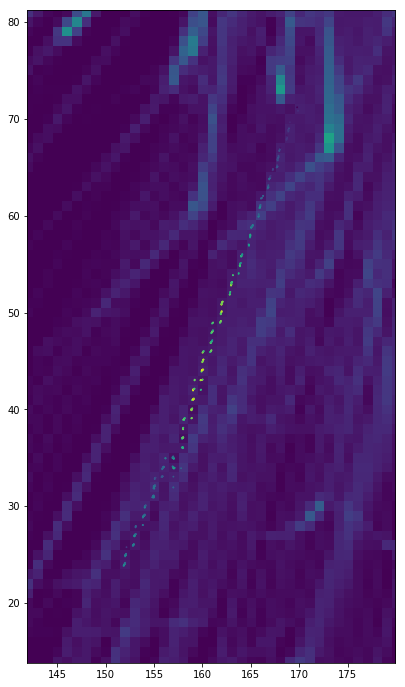

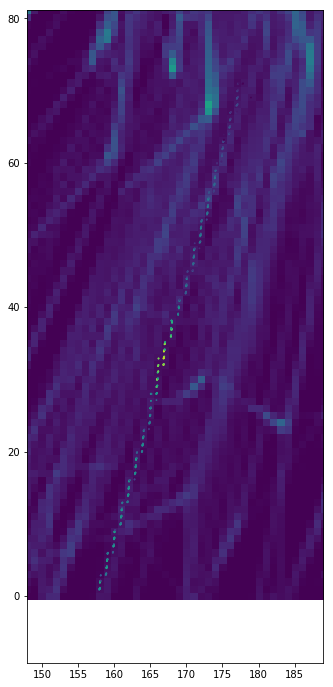

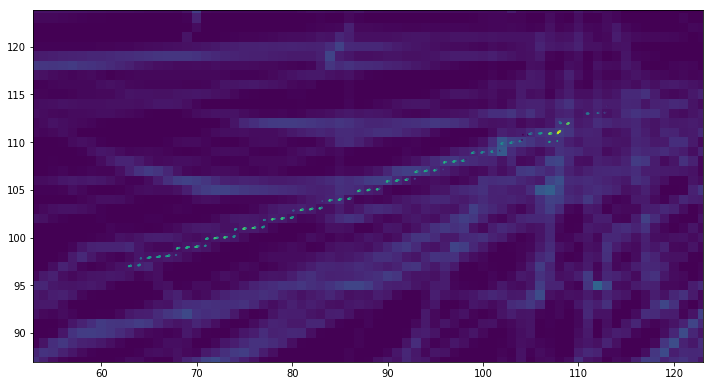

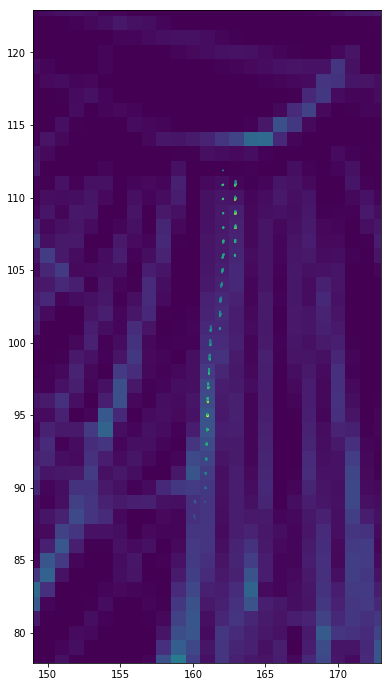

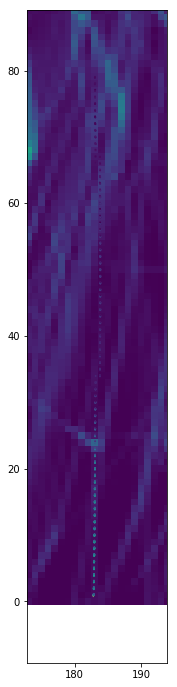

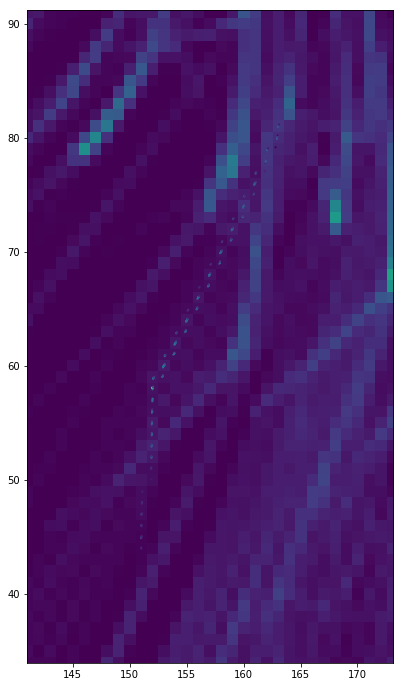

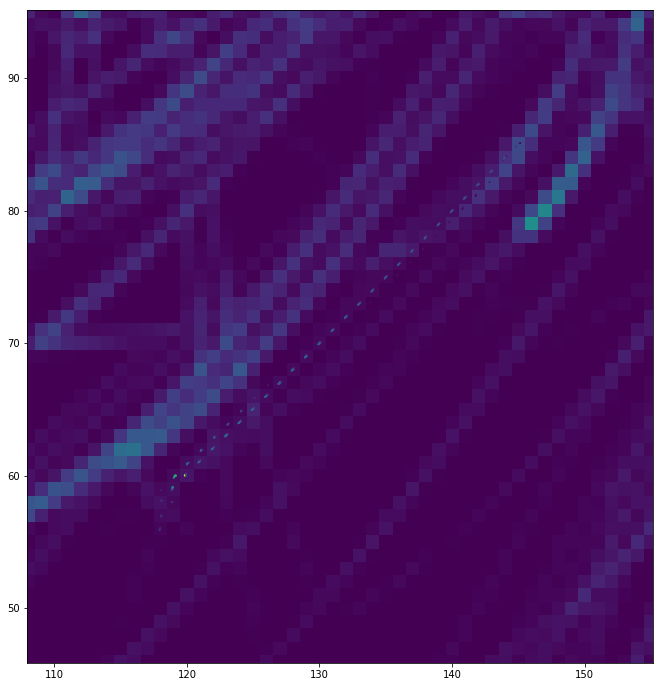

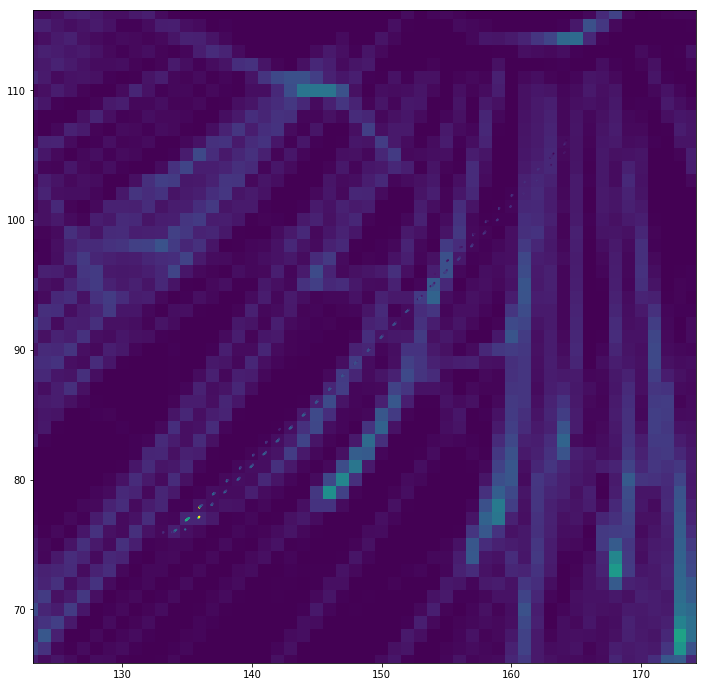

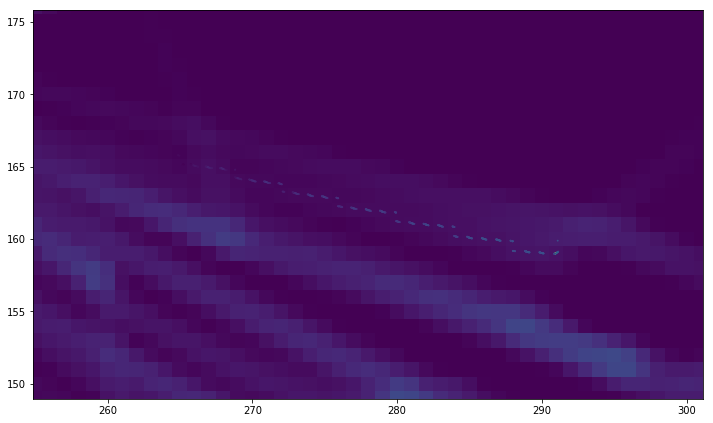

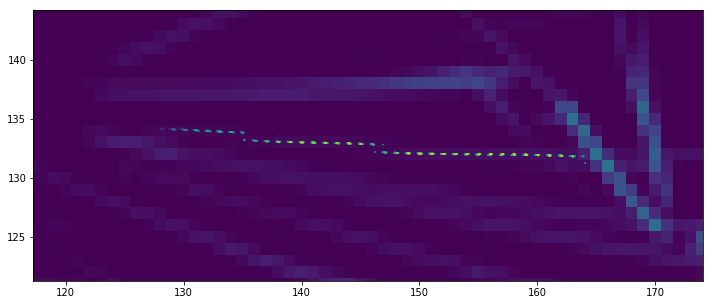

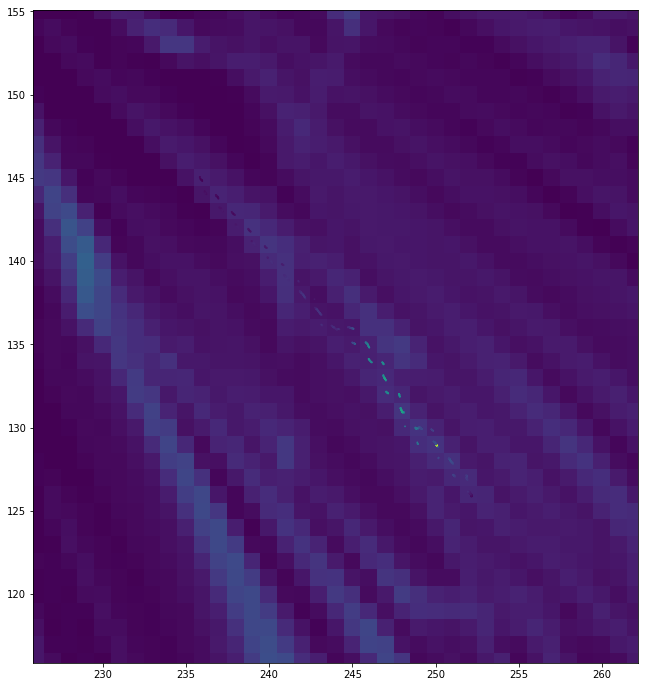

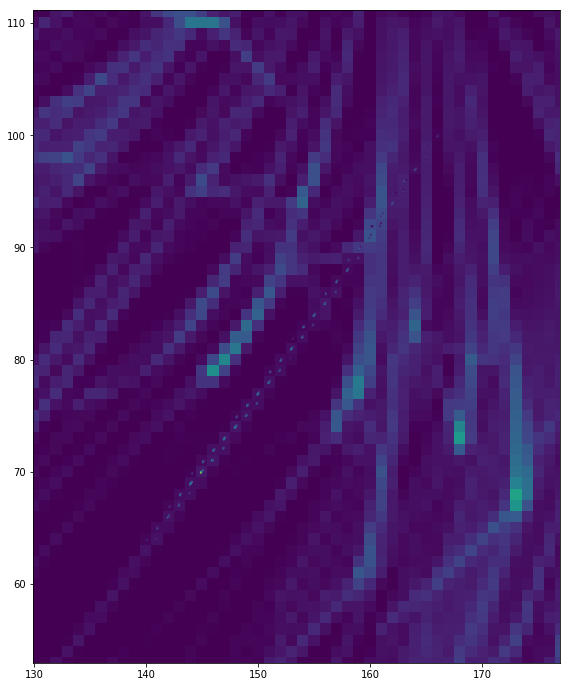

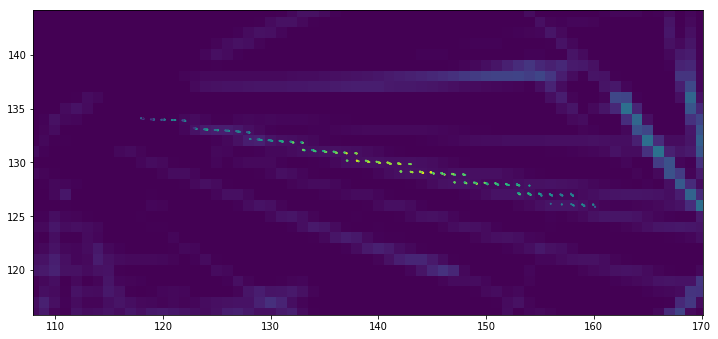

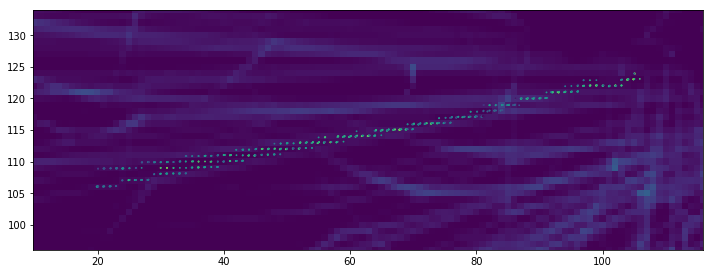

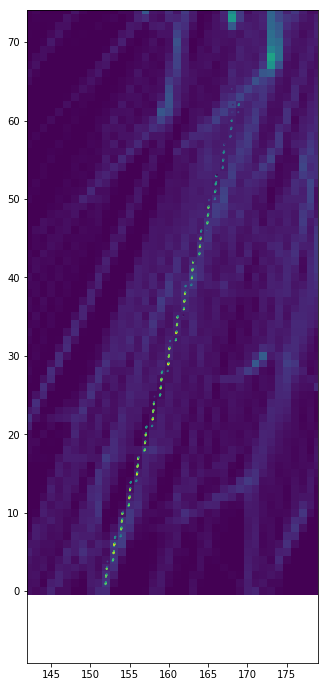

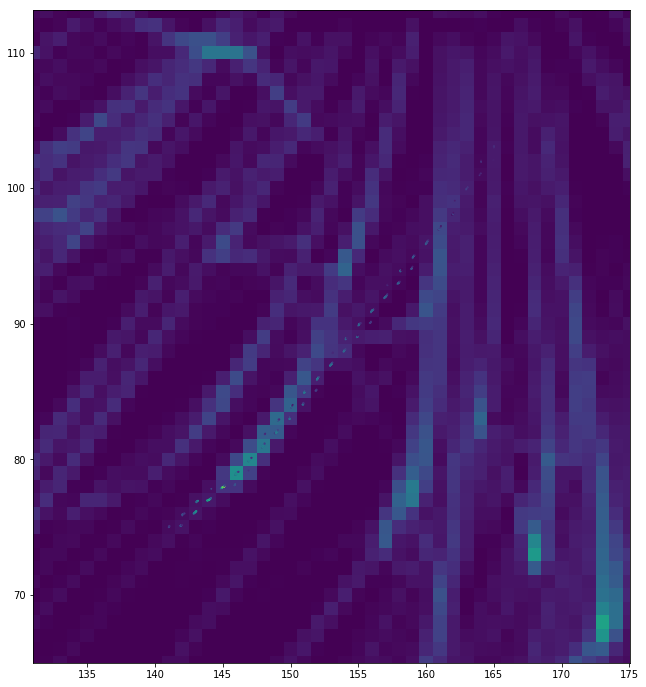

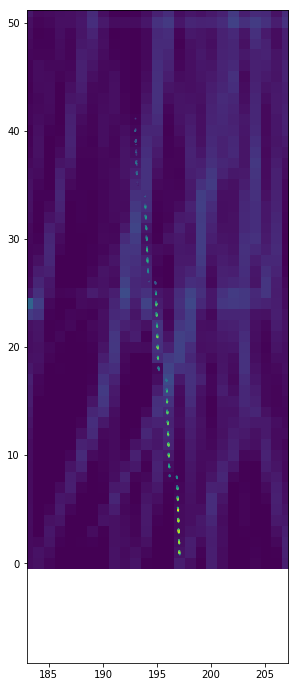

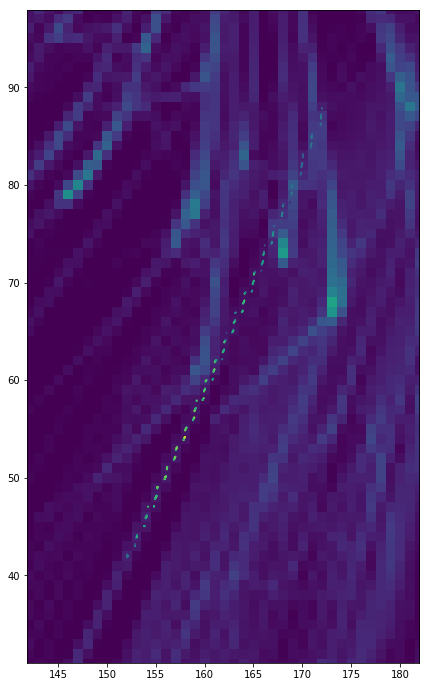

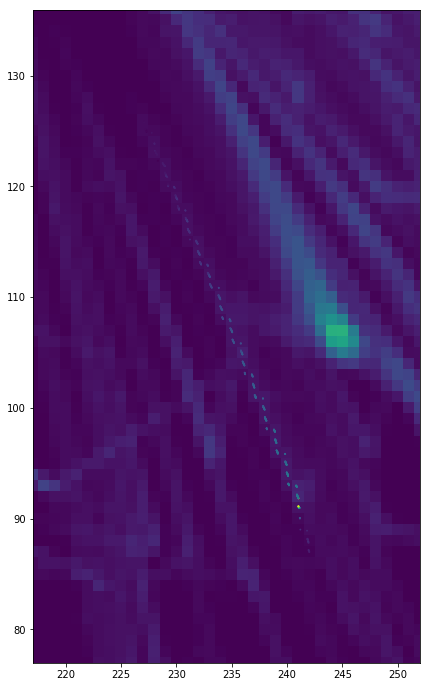

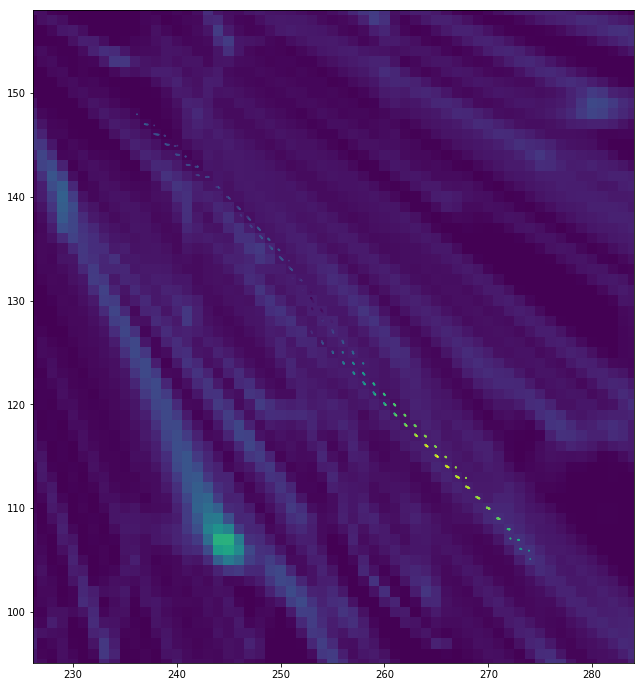

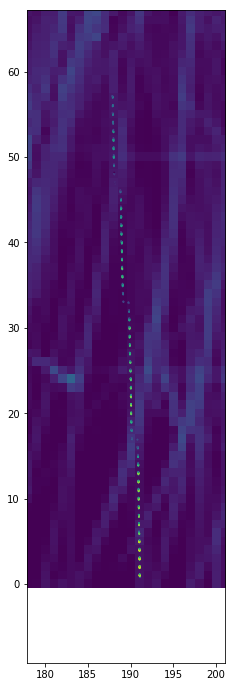

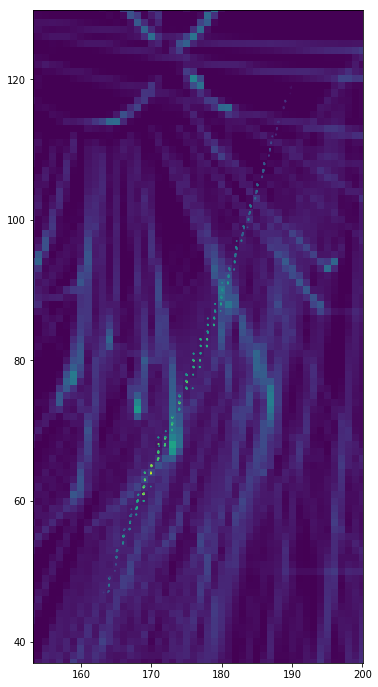

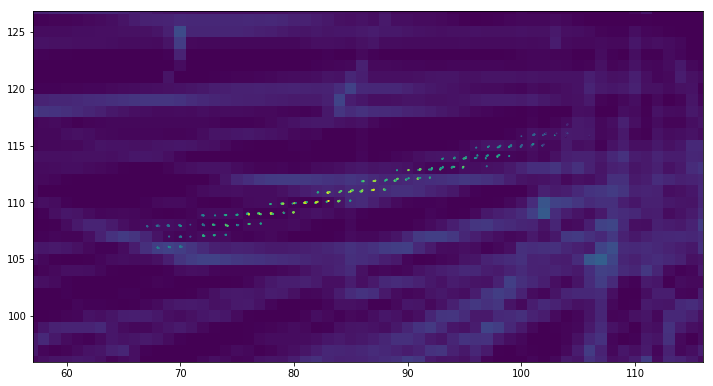

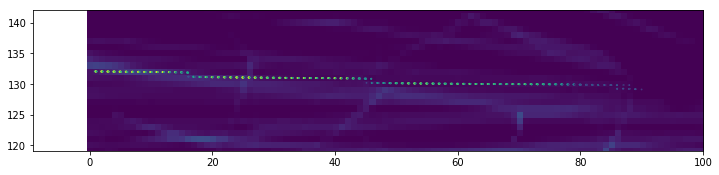

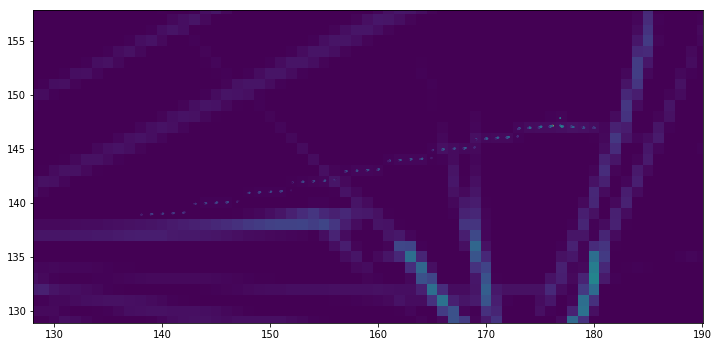

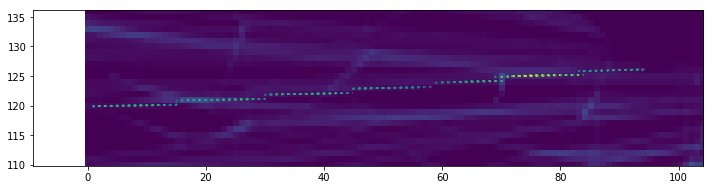

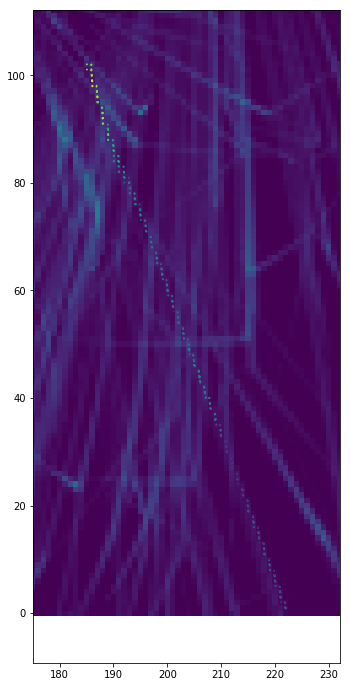

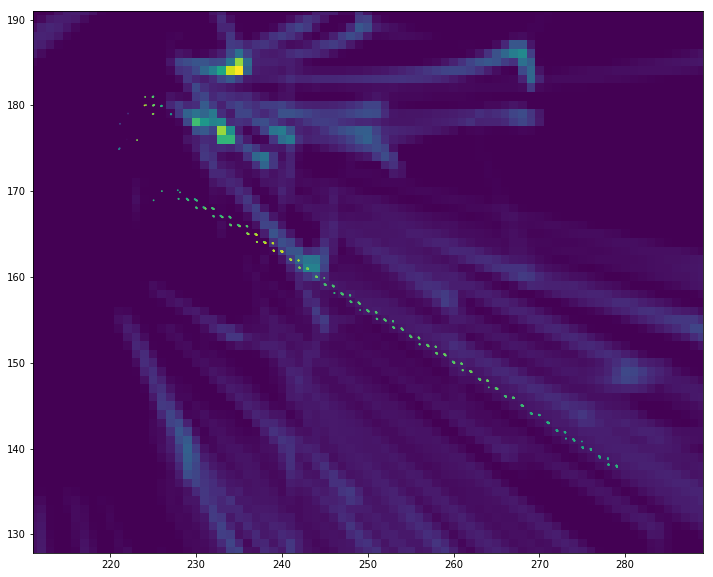

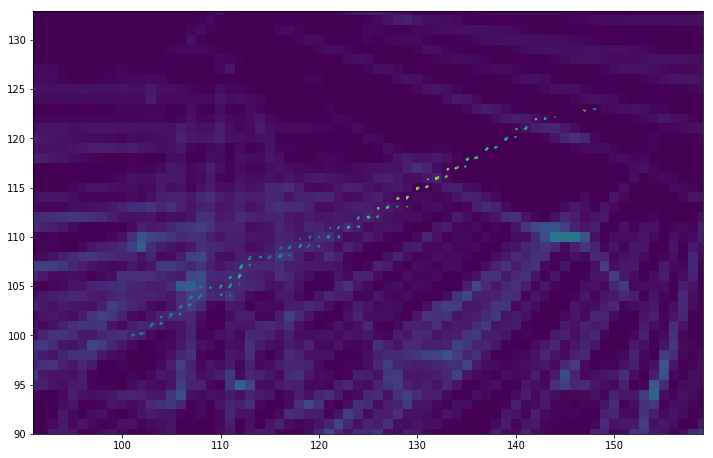

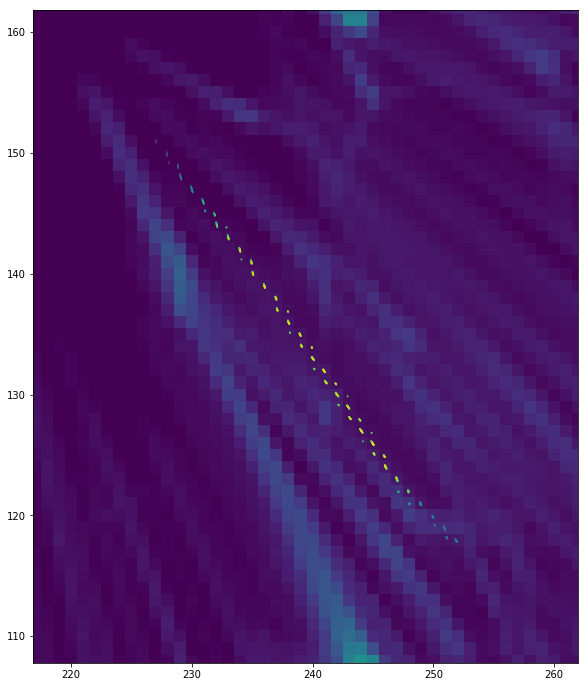

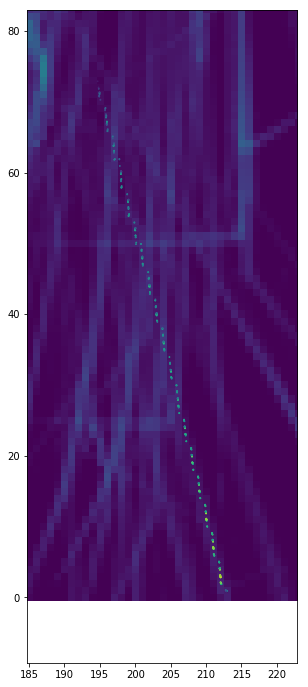

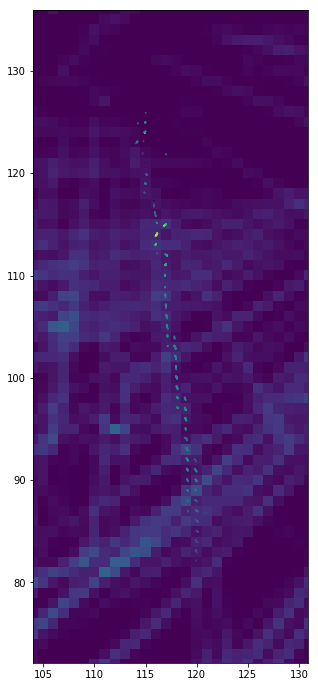

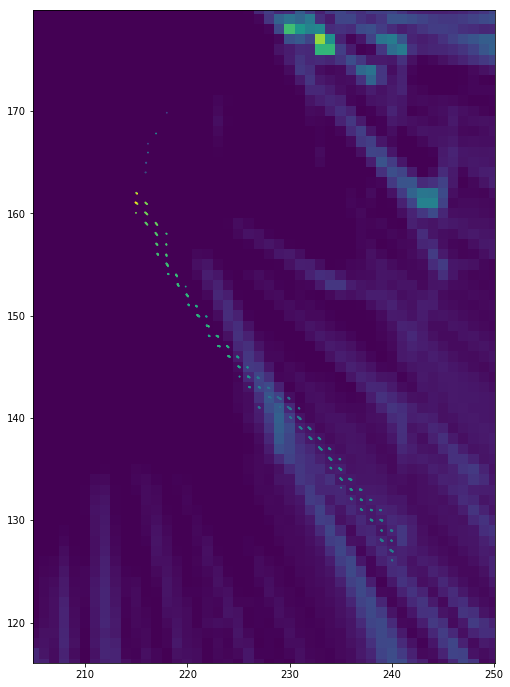

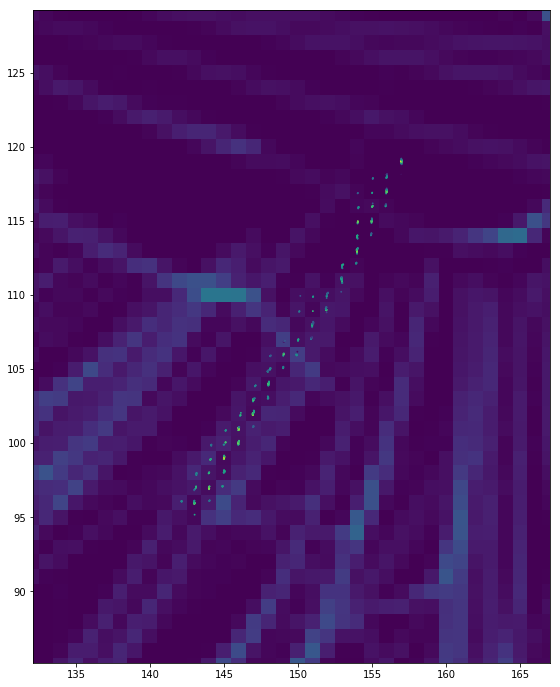

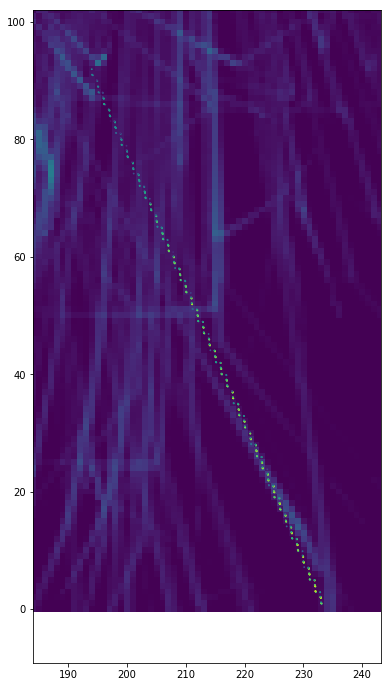

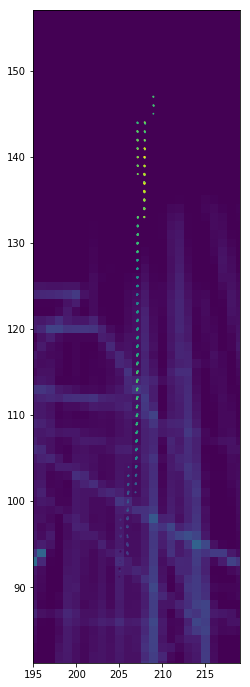

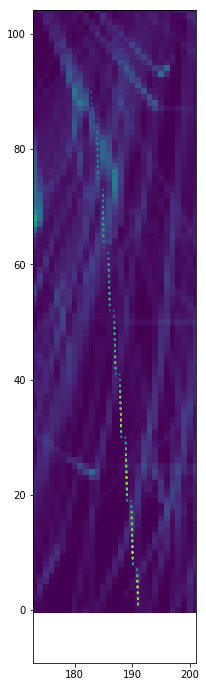

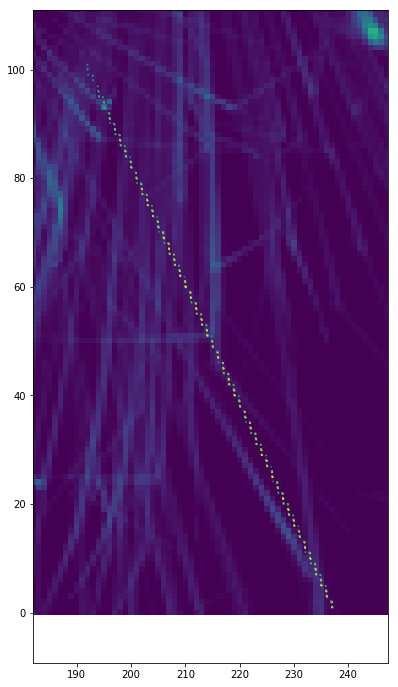

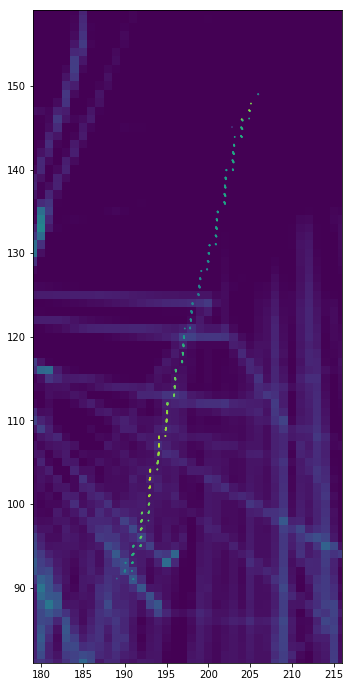

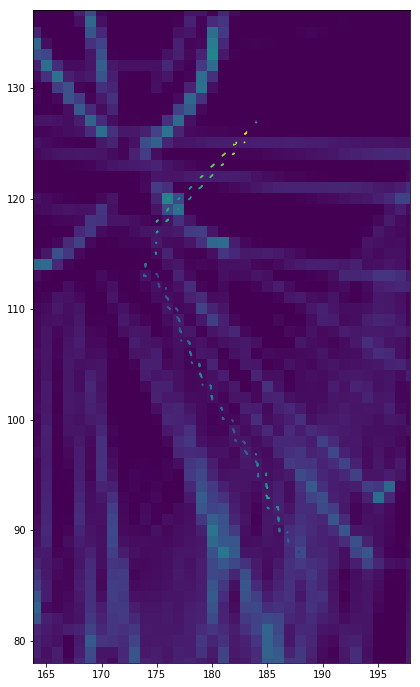

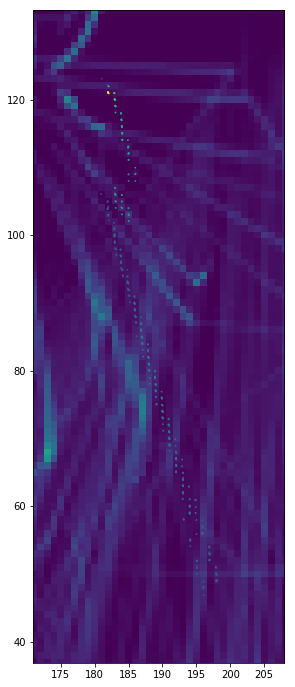

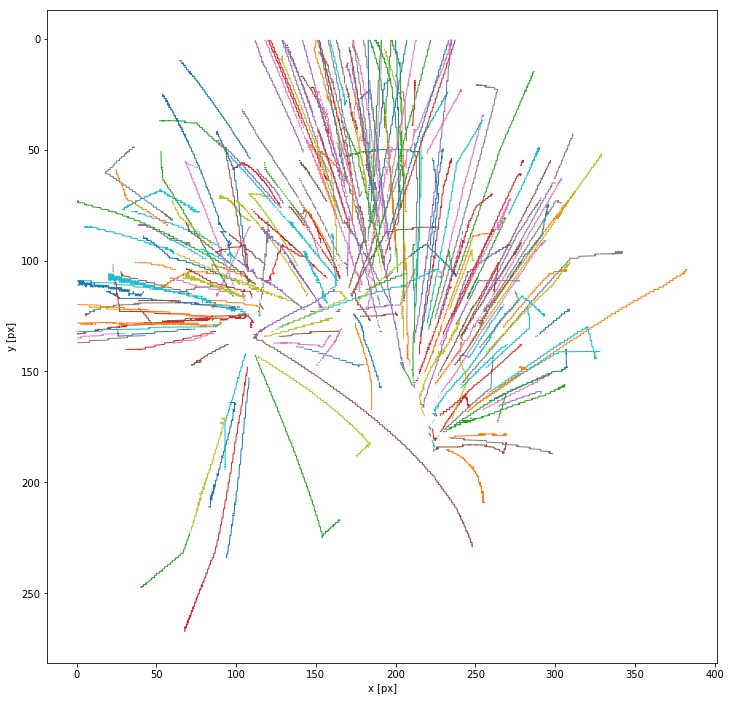

In [17]:
plt.figure(figsize=[12,12])
tp.plot_traj(tR3);

In [18]:
tR3.to_csv("trackR3_frameless.csv")